# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [30]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        #ax.axes.get_xaxis().set_visible(False)
        #ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

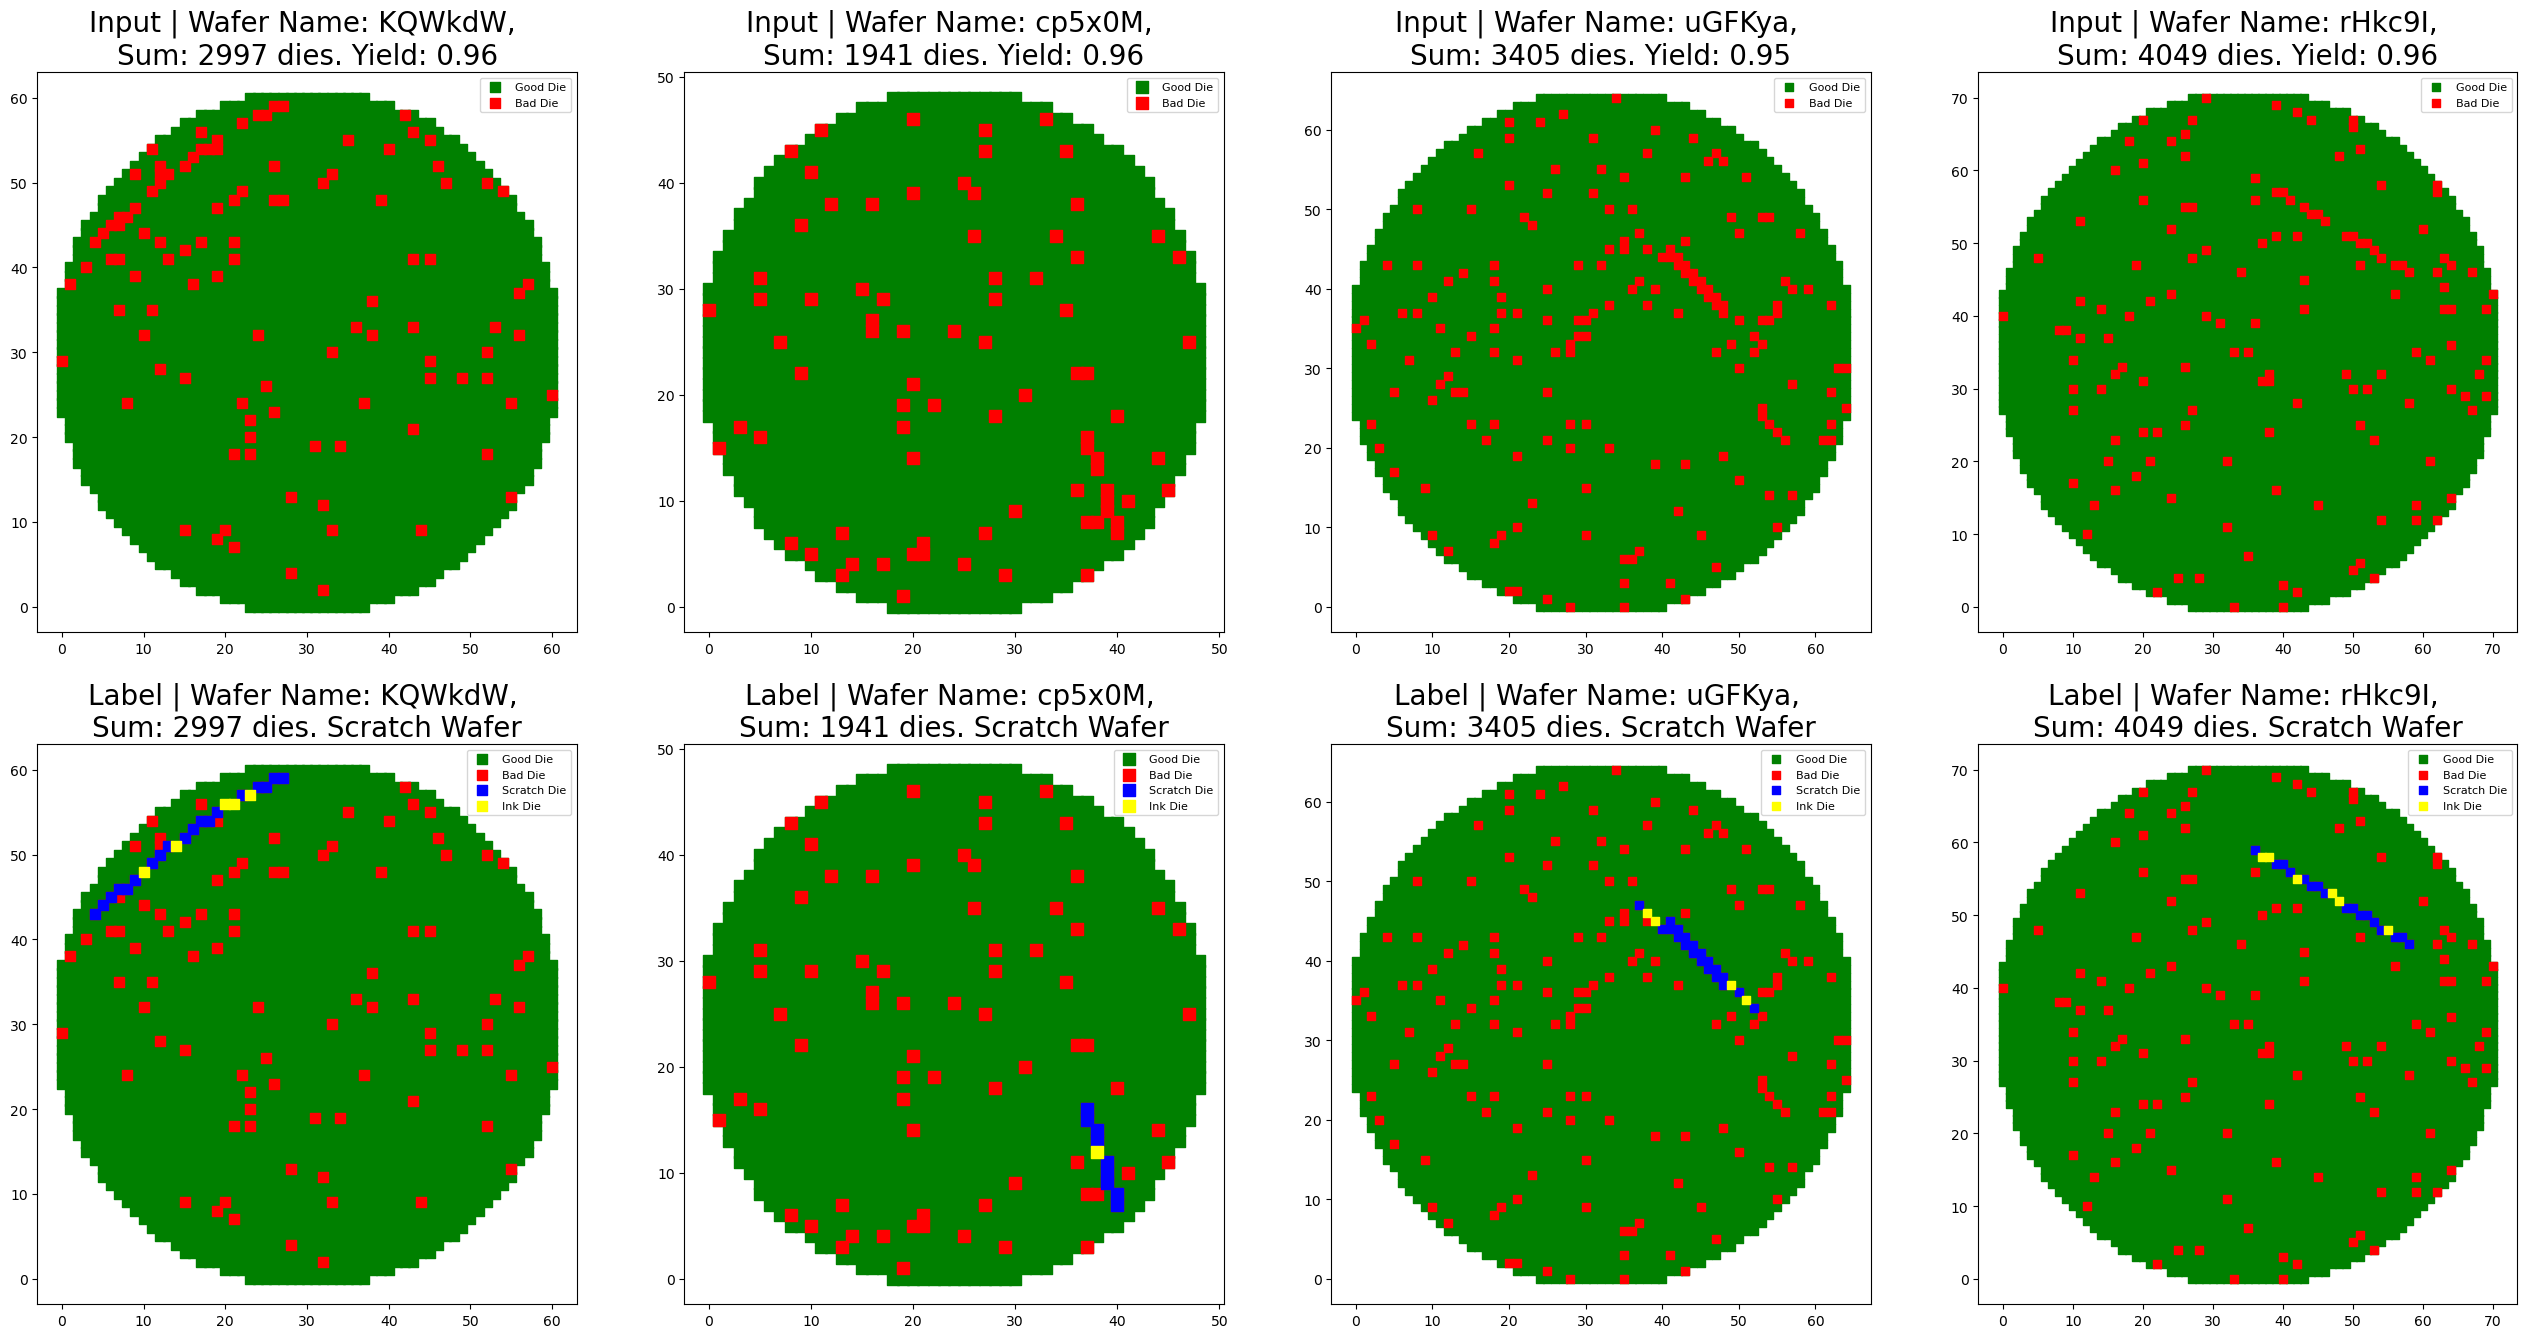

In [31]:
n_samples = 4 
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

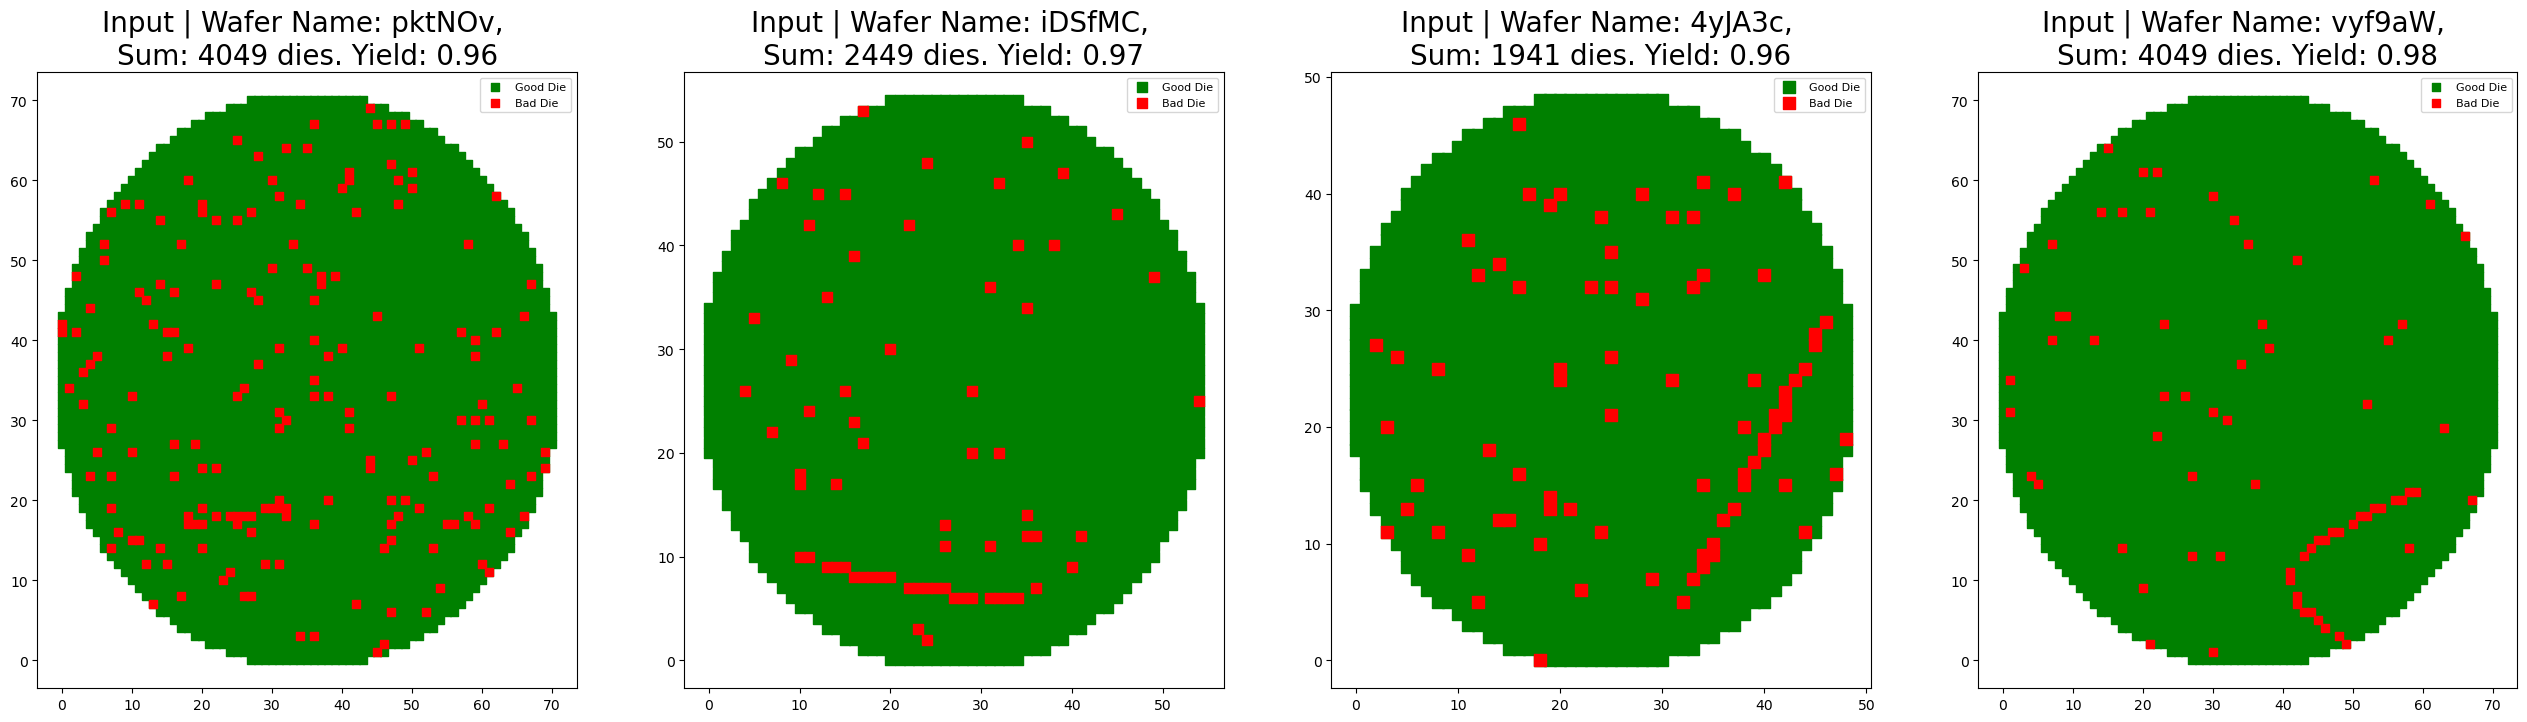

In [32]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

<h1 style="font-size: 50px; color: black;">Play with data</h1>

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion
from scipy.ndimage import convolve
from scipy.ndimage import label, find_objects
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.spatial import cKDTree

In [34]:
# get number of wafers in train set

num_train_wafers = df_wafers['WaferName'].nunique()
print("Number of wafers in training data:", num_train_wafers)


Number of wafers in training data: 4200


In [35]:
# get number of wafers in test set
num_test_wafers = df_wafers_test['WaferName'].nunique()
print("Number of wafers in test data:", num_test_wafers)


Number of wafers in test data: 455


Estimated center of wafer 8PFrAN: (35.00, 35.00)
      DieX  DieY
216      6    52
357      9    55
950     20     5
1212    23    67
1418    26    67
1565    29     2
1777    32     1
1849    33     2
2342    39    69
2764    45    68
2905    48     5
3034    49    67
3527    57    63
3528    58     8
3827    63    57
3870    64    56
3875    65    20
3906    65    51
4003    68    44
4019    69    34
4040    70    35
Estimated radius of wafer 8PFrAN: 35.90
DieX range: 0 to 70
DieY range: 0 to 70
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'distance_from_center'],
      dtype='object')


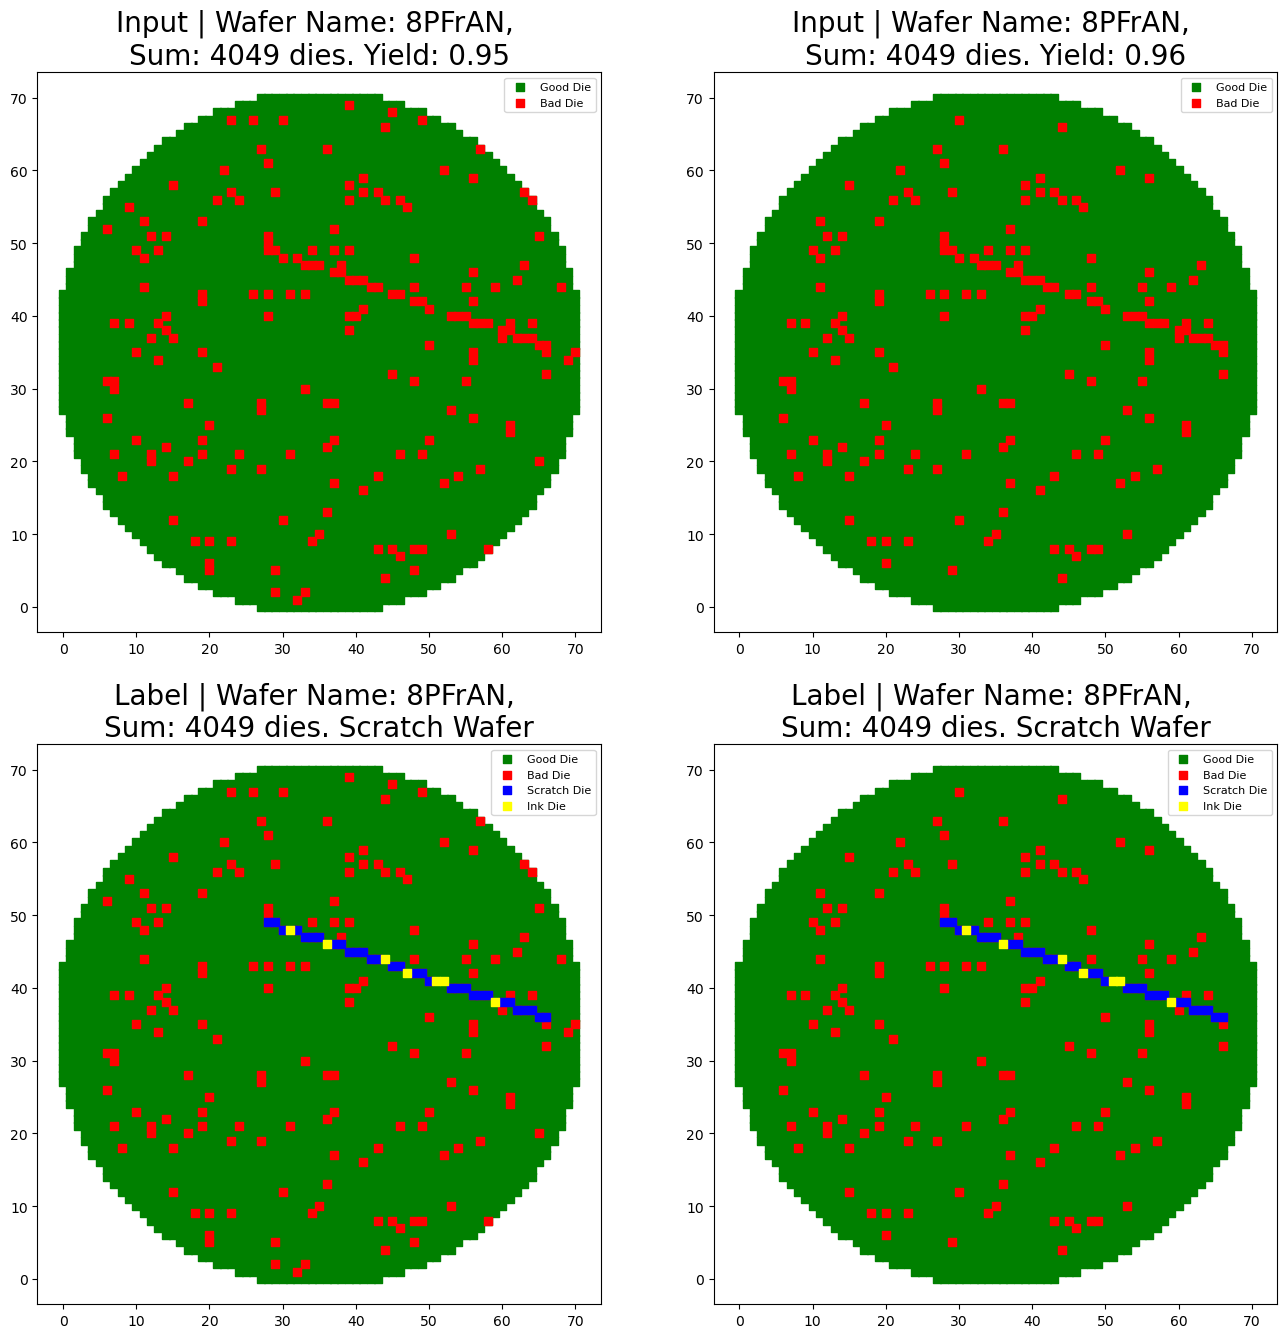

In [18]:
# plot wafer from train set
#{'KQWkdW' , 'cp5x0M' , 'uGFKya', ' rHkc9I'} 8PFrAN
wafer_name = '8PFrAN'#'seScVc'#'sNyWi7'
wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name].copy()
wafer_df_original = df_wafers[df_wafers['WaferName'] == wafer_name].copy()


# Approximate center

center_x = wafer_df['DieX'].mean()
center_y = wafer_df['DieY'].mean()

print(f"Estimated center of wafer {wafer_name}: ({center_x:.2f}, {center_y:.2f})")
wafer_df['distance_from_center'] = np.sqrt(
    (wafer_df['DieX'] - center_x)**2 + (wafer_df['DieY'] - center_y)**2
)

# clean dies near edge

radius_threshold = 0.91
edge_mask = (
    (wafer_df['IsGoodDie'] == False) &
    (wafer_df['distance_from_center'] >= wafer_df['distance_from_center'].max() * radius_threshold)
)

wafer_df.loc[edge_mask, 'IsGoodDie'] = True
edge_dies = wafer_df.loc[edge_mask, ['DieX', 'DieY']]
print(edge_dies)
# Approximate radius

radius_estimate = wafer_df['distance_from_center'].max()
print(f"Estimated radius of wafer {wafer_name}: {radius_estimate:.2f}")

# Approximate x , y -  min , max
min_x = wafer_df['DieX'].min()
max_x = wafer_df['DieX'].max()
min_y = wafer_df['DieY'].min()
max_y = wafer_df['DieY'].max()

print(f"DieX range: {min_x} to {max_x}")
print(f"DieY range: {min_y} to {max_y}")

print(wafer_df.columns)
# plot wafer

plot_wafer_maps([wafer_df_original, wafer_df], figsize=8, labels=True)


In [19]:
wafer_df.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie,distance_from_center
0,8PFrAN,0,27,True,False,35.902646
1,8PFrAN,0,28,True,False,35.693137
2,8PFrAN,0,29,True,False,35.510562
3,8PFrAN,0,30,True,False,35.355339
4,8PFrAN,0,31,True,False,35.227830


In [20]:
wafer_df[wafer_df['IsGoodDie'] == False]

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie,distance_from_center
190,8PFrAN,6,26,False,False,30.364453
195,8PFrAN,6,31,False,False,29.274562
229,8PFrAN,7,21,False,False,31.304952
238,8PFrAN,7,30,False,False,28.442925
239,8PFrAN,7,31,False,False,28.284271
...,...,...,...,...,...,...
3853,8PFrAN,64,39,False,False,29.274562
3891,8PFrAN,65,36,False,True,30.016662
3925,8PFrAN,66,32,False,False,31.144823
3928,8PFrAN,66,35,False,False,31.000000


In [51]:
# Choose a wafer
wafer_name = '8PFrAN'
wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name].copy()

# Create a grid of shape (max_y+1, max_x+1)
max_x = wafer_df['DieX'].max()
max_y = wafer_df['DieY'].max()

# Initialize an empty binary grid for bad dies
bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)

# Fill the grid: True if the die is bad
for _, row in wafer_df.iterrows():
    if not row['IsGoodDie']:
        bad_die_grid[row['DieY'], row['DieX']] = True

# Sanity check
print(f"Original bad dies: {np.sum(bad_die_grid)}")


Original bad dies: 187


In [22]:
# Define the 3x3 kernel to count neighbors (excluding center)
neighbor_kernel = np.array([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]])

# Count red neighbors for each die
neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)

# A die is considered isolated if it is red AND has 0 red neighbors
isolated_red = (bad_die_grid == True) & (neighbor_count == 0)


# Flip isolated red dies to green
cleaned_grid = bad_die_grid.copy()
cleaned_grid[isolated_red] = False

# Sanity check
print(f"Bad dies after removing isolated: {np.sum(cleaned_grid)} (removed {np.sum(isolated_red)})")

Bad dies after removing isolated: 84 (removed 103)


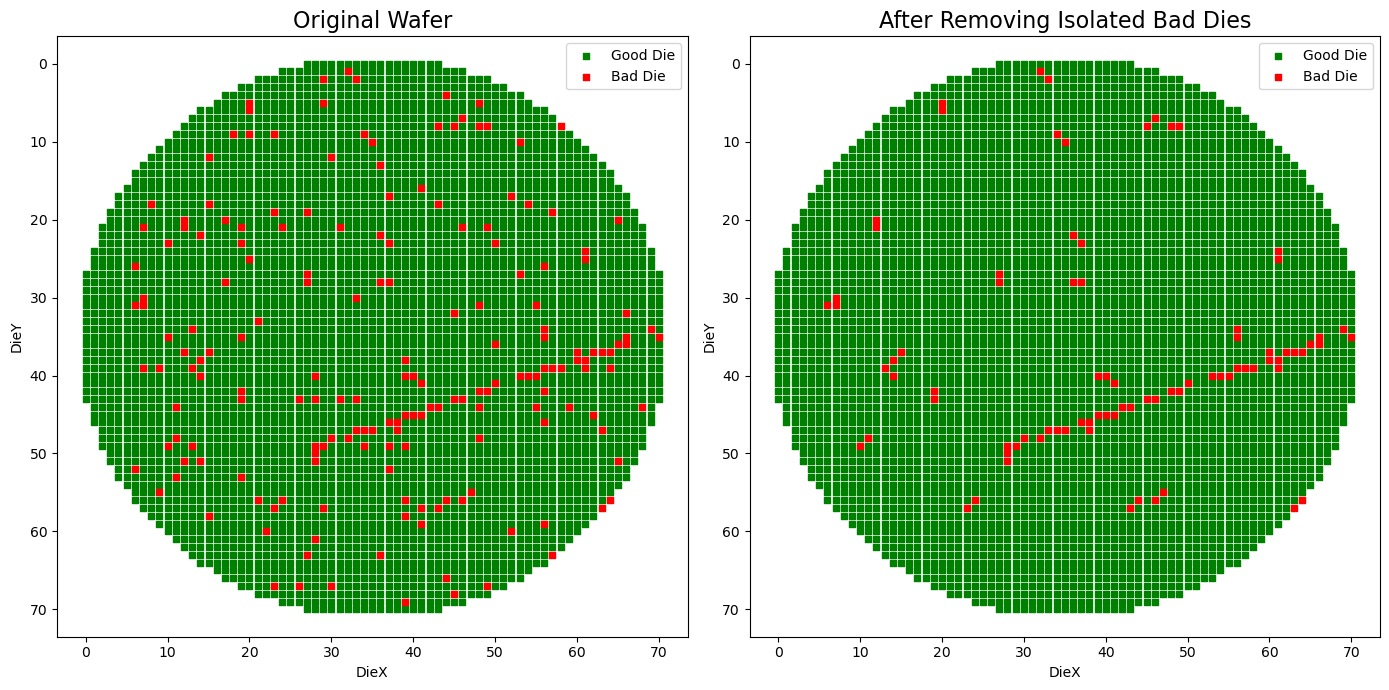

In [23]:
# Add cleaned result to DataFrame
wafer_df['IsGoodDie_Cleaned'] = wafer_df.apply(
    lambda row: False if cleaned_grid[row['DieY'], row['DieX']] else True,
    axis=1
)

# Plot Original vs Cleaned
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
titles = ['Original Wafer', 'After Removing Isolated Bad Dies']
columns = ['IsGoodDie', 'IsGoodDie_Cleaned']

for i in range(2):
    good = wafer_df[wafer_df[columns[i]] == True]
    bad = wafer_df[wafer_df[columns[i]] == False]

    ax[i].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
    ax[i].scatter(bad['DieX'], bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
    ax[i].set_title(titles[i], fontsize=16)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("DieX")
    ax[i].set_ylabel("DieY")
    ax[i].legend()

plt.tight_layout()
plt.show()


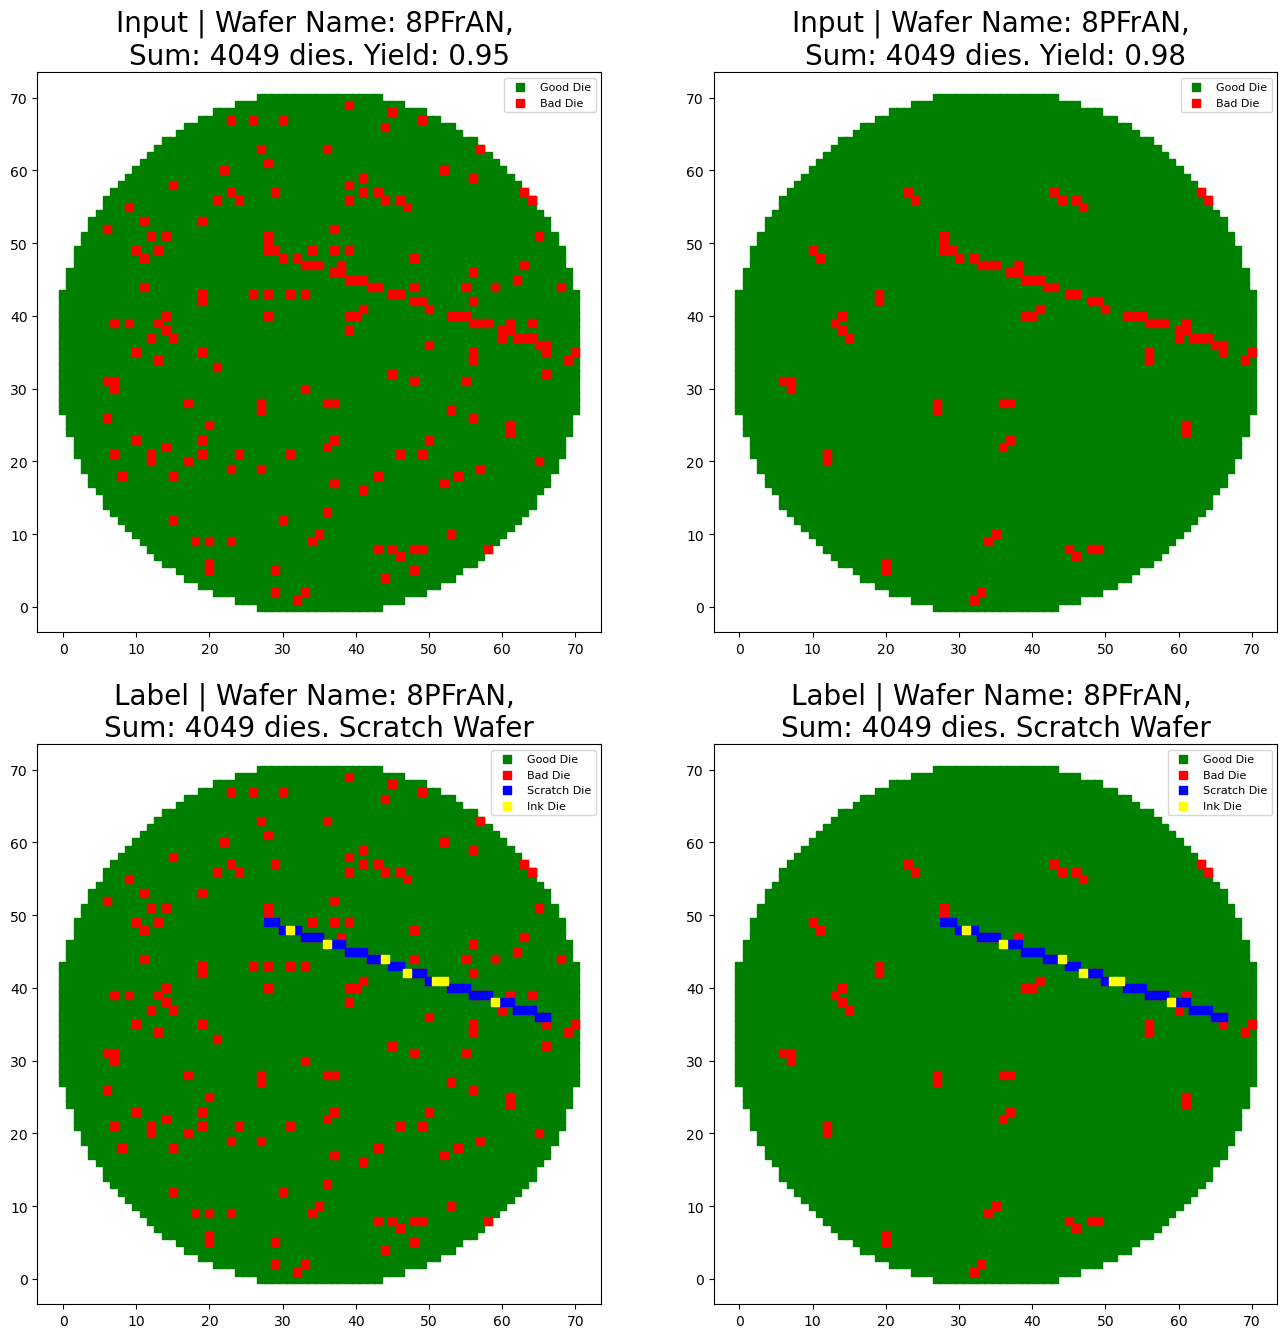

In [24]:
# Original wafer
wafer_original = wafer_df.copy()

# New wafer using cleaned 'IsGoodDie'
wafer_cleaned = wafer_df.copy()
wafer_cleaned['IsGoodDie'] = wafer_cleaned['IsGoodDie_Cleaned']

# Plot them side-by-side using your existing function
plot_wafer_maps([wafer_original, wafer_cleaned], figsize=8, labels=True)


In [25]:
structure = np.ones((3, 3), dtype=bool)

# Perform dilation to expand the bad die clusters
dilated_grid = binary_dilation(cleaned_grid, structure=structure)

# Add dilated result to DataFrame
wafer_df['IsGoodDie_Dilated'] = wafer_df.apply(
    lambda row: False if dilated_grid[row['DieY'], row['DieX']] else True,
    axis=1
)

# Sanity check
print(f"Bad dies after dilation: {np.sum(~wafer_df['IsGoodDie_Dilated'])}")

Bad dies after dilation: 437


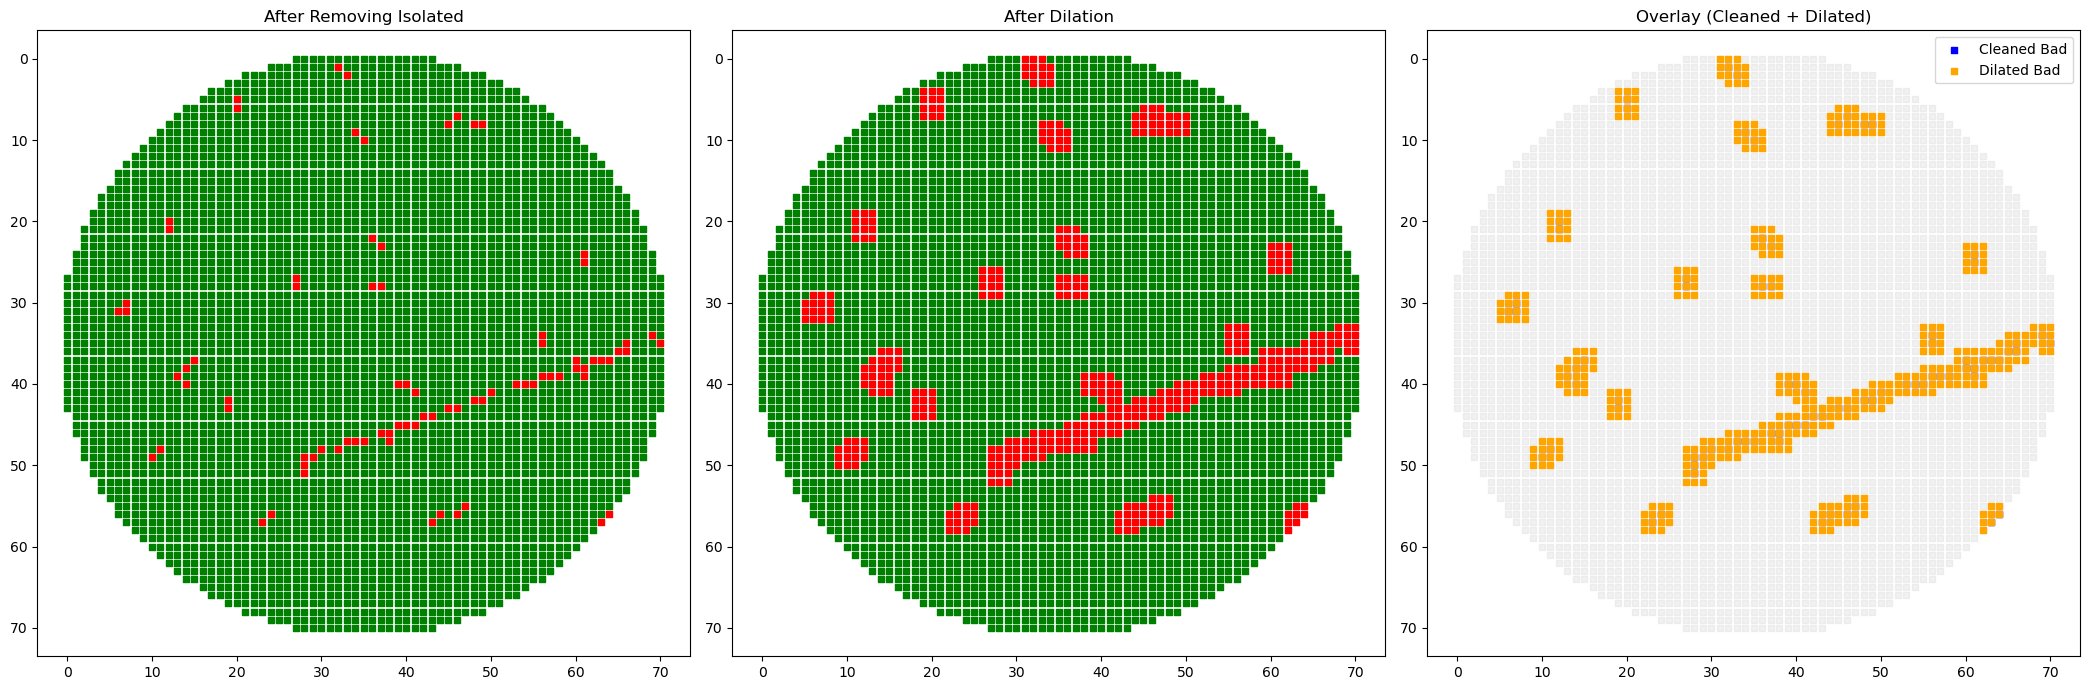

In [26]:
# not using it
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
titles = ['After Removing Isolated', 'After Dilation', 'Overlay (Cleaned + Dilated)']
columns = ['IsGoodDie_Cleaned', 'IsGoodDie_Dilated']

# 1st plot: Cleaned
good = wafer_df[wafer_df['IsGoodDie_Cleaned']]
bad = wafer_df[~wafer_df['IsGoodDie_Cleaned']]
ax[0].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
ax[0].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
ax[0].set_title(titles[0])
ax[0].invert_yaxis()

# 2nd plot: Dilation
good = wafer_df[wafer_df['IsGoodDie_Dilated']]
bad = wafer_df[~wafer_df['IsGoodDie_Dilated']]
ax[1].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
ax[1].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
ax[1].set_title(titles[1])
ax[1].invert_yaxis()

# 3rd plot: Overlay
bad_cleaned = wafer_df[~wafer_df['IsGoodDie_Cleaned']]
bad_dilated = wafer_df[~wafer_df['IsGoodDie_Dilated']]
ax[2].scatter(wafer_df['DieX'], wafer_df['DieY'], color='lightgrey', s=15, marker='s', alpha=0.3)
ax[2].scatter(bad_cleaned['DieX'], bad_cleaned['DieY'], color='blue', s=15, marker='s', label='Cleaned Bad')
ax[2].scatter(bad_dilated['DieX'], bad_dilated['DieY'], color='orange', s=15, marker='s', label='Dilated Bad')
ax[2].set_title(titles[2])
ax[2].invert_yaxis()
ax[2].legend()

plt.tight_layout()
plt.show()


In [27]:
# Define 3x3 structuring element for erosion
structure = np.ones((3, 3), dtype=bool)

# Perform erosion
eroded_grid = binary_erosion(dilated_grid, structure=structure)

# Add eroded result to DataFrame
wafer_df['IsGoodDie_Eroded'] = wafer_df.apply(
    lambda row: False if eroded_grid[row['DieY'], row['DieX']] else True,
    axis=1
)

# Sanity check
print(f"Bad dies after erosion: {np.sum(~wafer_df['IsGoodDie_Eroded'])}")

Bad dies after erosion: 93


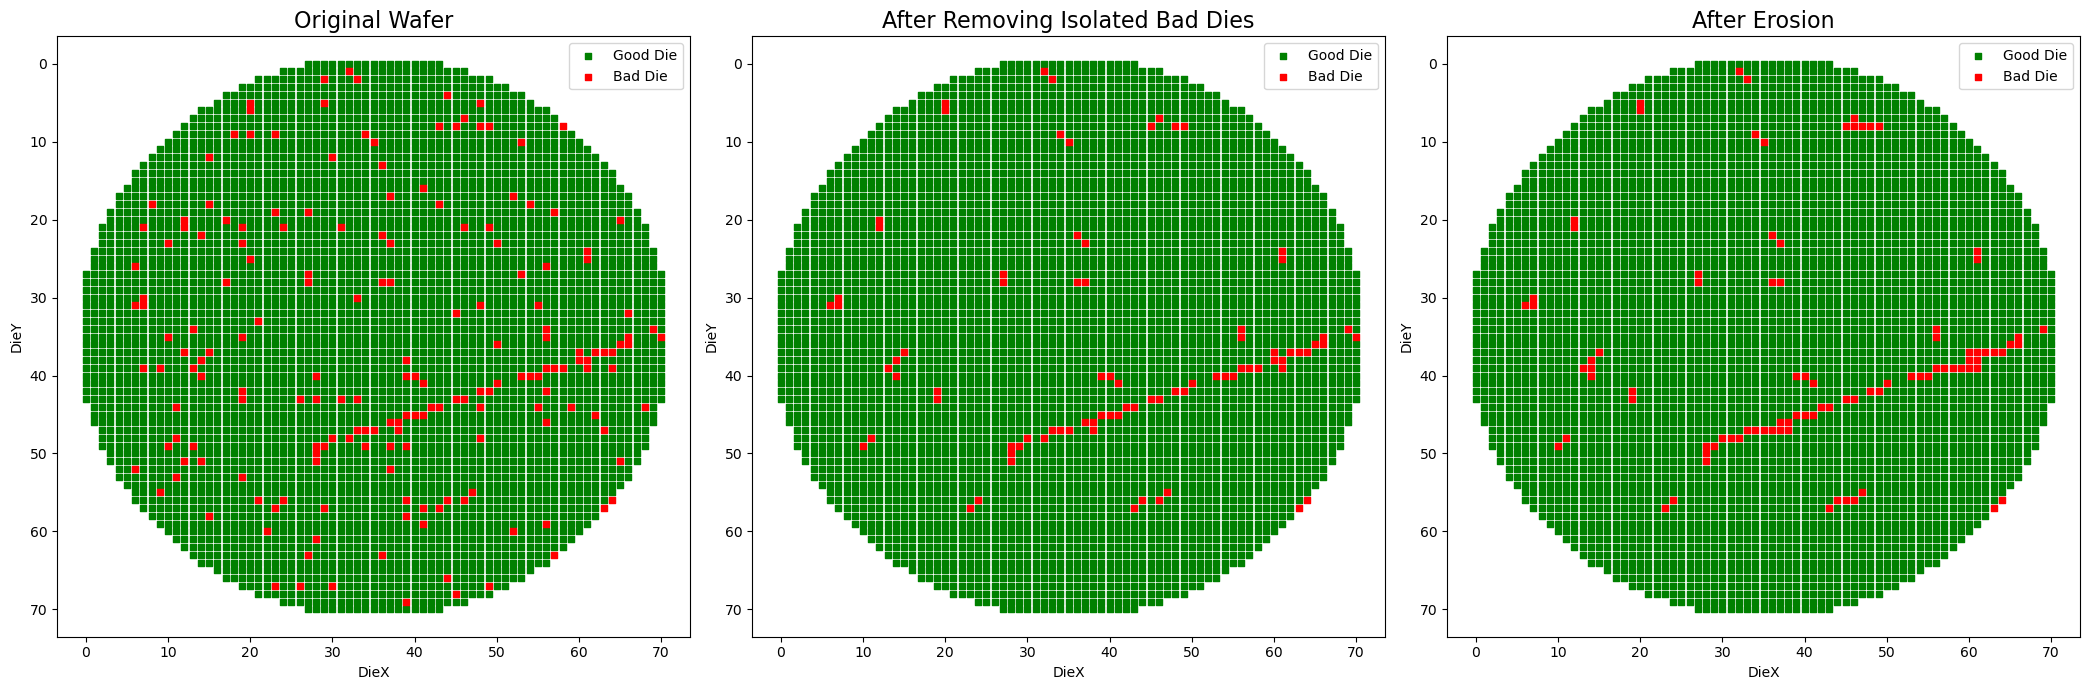

In [28]:
# Plot Original vs Cleaned vs Eroded
fig, ax = plt.subplots(1, 3, figsize=(21, 7))
titles = ['Original Wafer', 'After Removing Isolated Bad Dies', 'After Erosion']
columns = ['IsGoodDie', 'IsGoodDie_Cleaned', 'IsGoodDie_Eroded']

for i in range(3):
    good = wafer_df[wafer_df[columns[i]] == True]
    bad = wafer_df[wafer_df[columns[i]] == False]

    ax[i].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
    ax[i].scatter(bad['DieX'], bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
    ax[i].set_title(titles[i], fontsize=16)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("DieX")
    ax[i].set_ylabel("DieY")
    ax[i].legend()

plt.tight_layout()
plt.show()


In [29]:
print(wafer_df.columns)

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'IsGoodDie_Cleaned', 'IsGoodDie_Dilated', 'IsGoodDie_Eroded'],
      dtype='object')


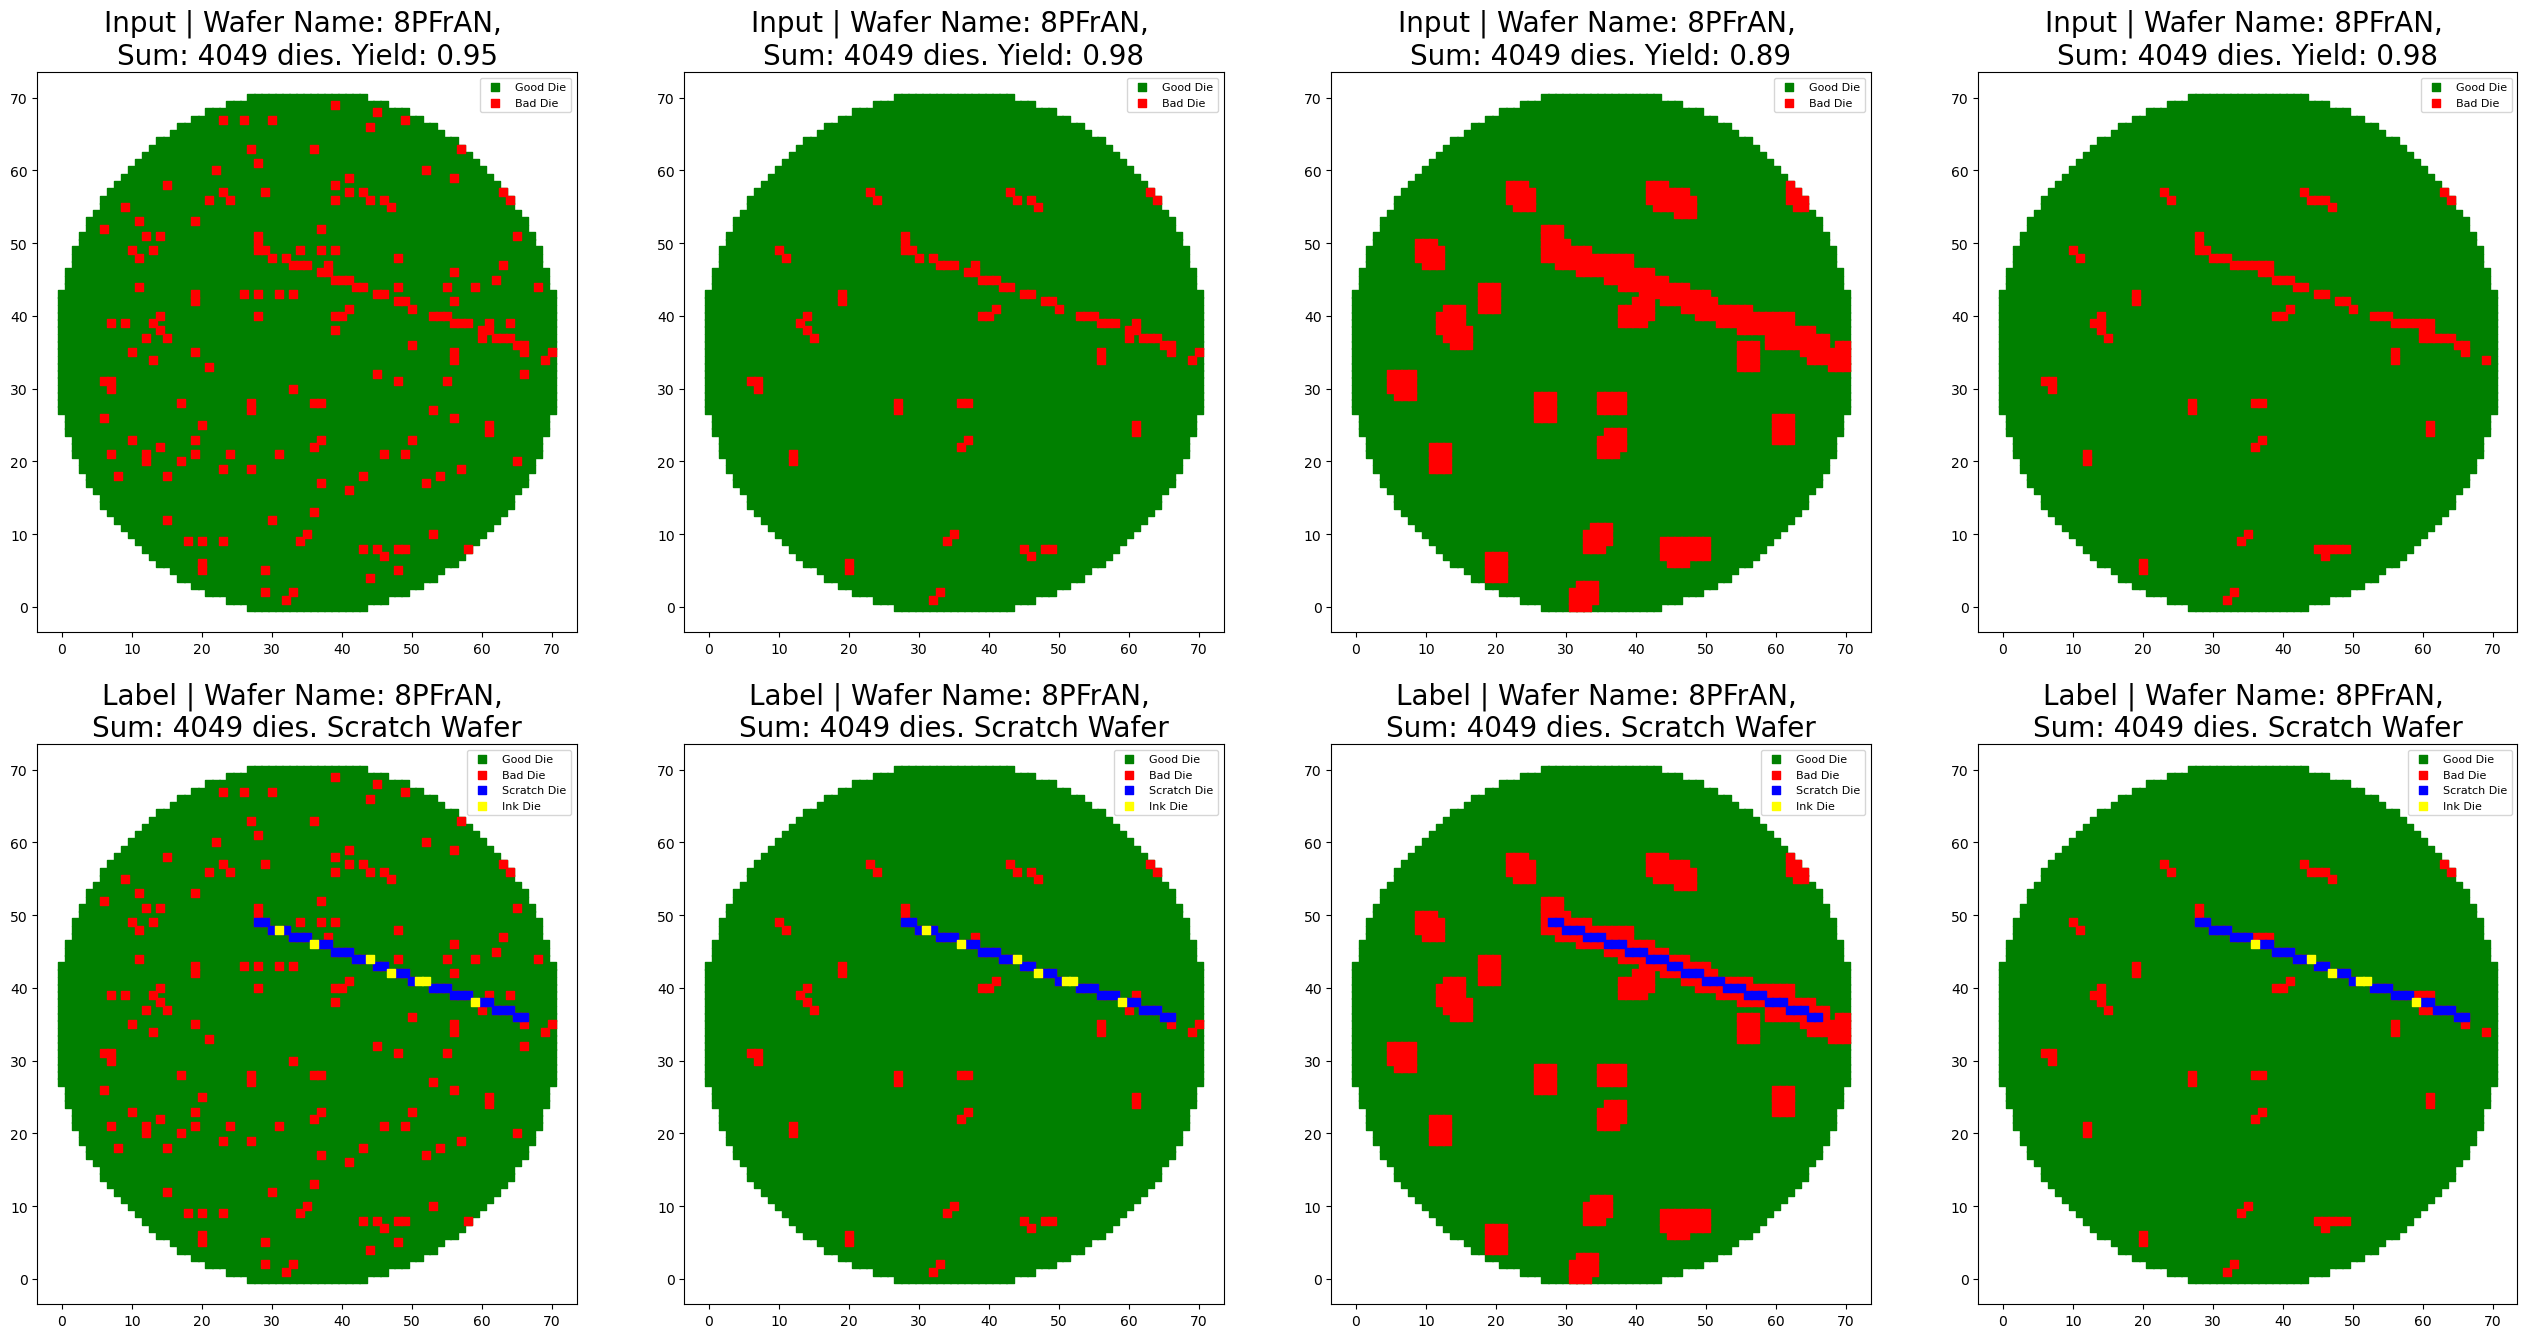

In [30]:
# Original wafer
wafer_original = wafer_df.copy()

# New wafer using cleaned 'IsGoodDie'
wafer_cleaned = wafer_df.copy()
wafer_er = wafer_df.copy()
wafer_dil = wafer_df.copy()
wafer_cleaned['IsGoodDie'] = wafer_cleaned['IsGoodDie_Cleaned']
wafer_er['IsGoodDie'] = wafer_cleaned['IsGoodDie_Eroded']
wafer_dil['IsGoodDie'] = wafer_cleaned['IsGoodDie_Dilated']


# Plot them side-by-side using your existing function
plot_wafer_maps([wafer_original, wafer_cleaned, wafer_dil , wafer_er], figsize=8, labels=True)

In [31]:
# train set yield
yield_per_wafer = df_wafers.groupby('WaferName').agg(
    total_dies=('IsGoodDie', 'count'),
    good_dies=('IsGoodDie', 'sum')
)

yield_per_wafer['yield'] = yield_per_wafer['good_dies'] / yield_per_wafer['total_dies']

# yield for wafer low to high
low_yield_wafers = yield_per_wafer.sort_values(by='yield')
print(low_yield_wafers.tail(10))  # change number as needed

           total_dies  good_dies     yield
WaferName                                 
SdMWhR           1941       1914  0.986090
MXl1z3           1941       1915  0.986605
yTBVIw           2997       2958  0.986987
BbMyid           1005        992  0.987065
Vy1tGn           1005        992  0.987065
5Y6324           1513       1494  0.987442
JKB1uH           1005        993  0.988060
XryiEJ           1005        993  0.988060
7XgncK           1005        994  0.989055
seScVc           1005        994  0.989055


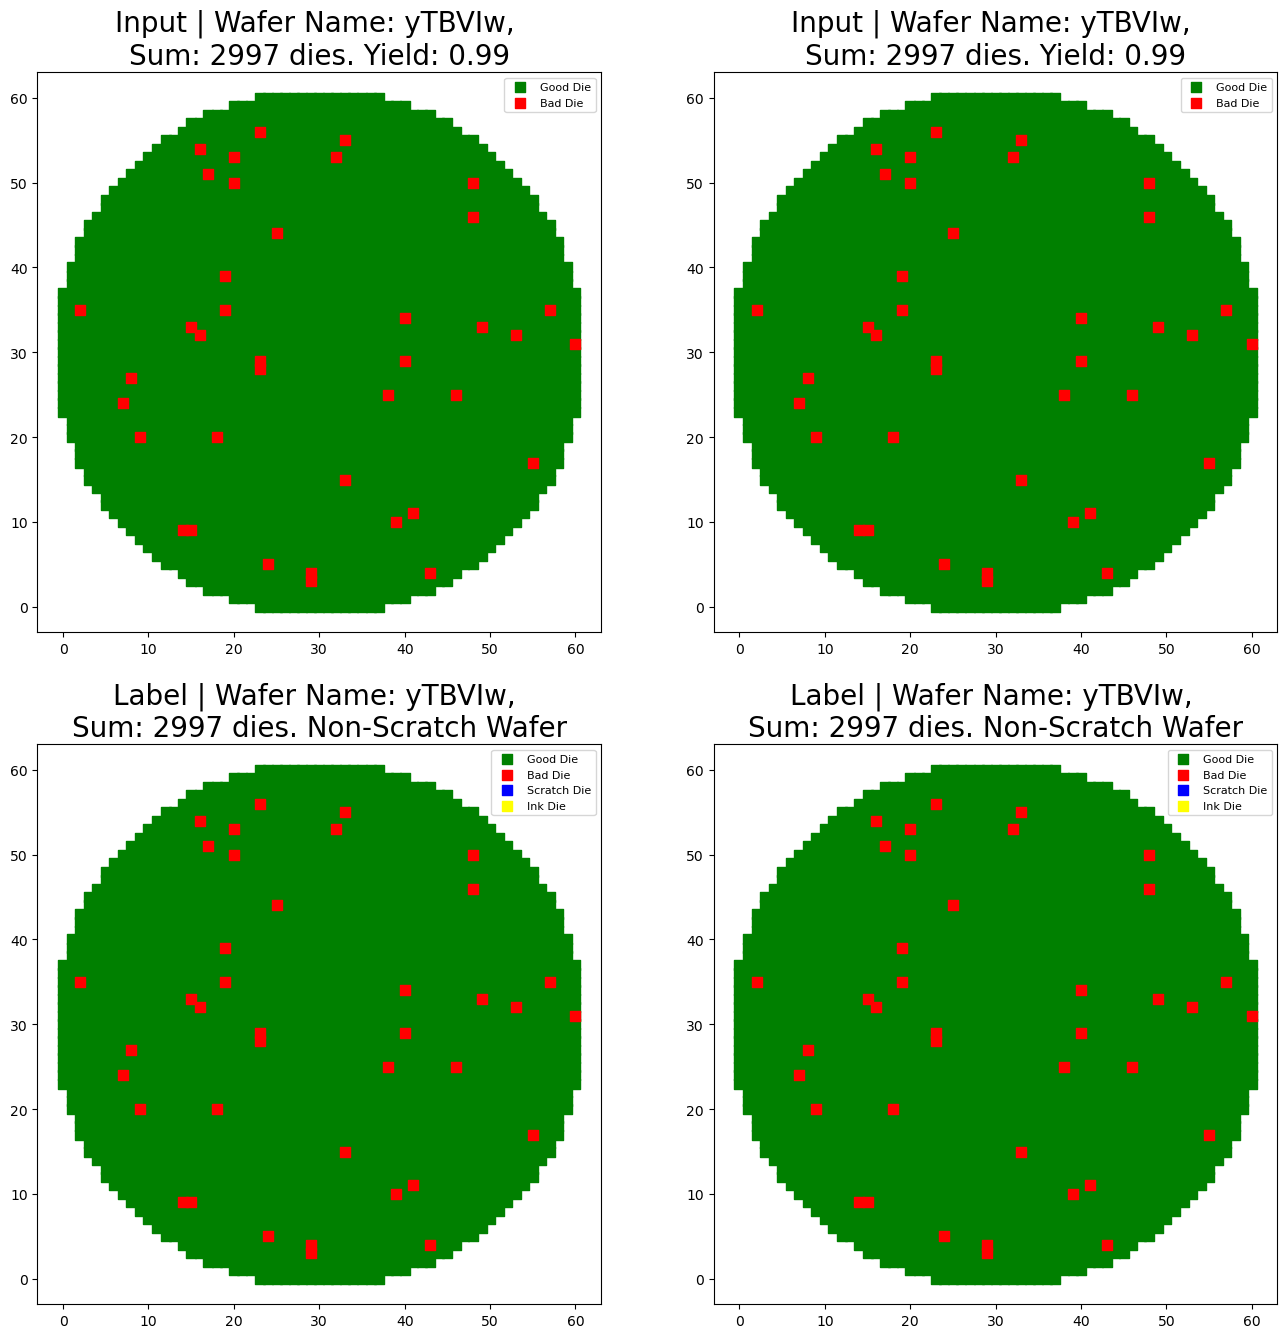

In [32]:
wafer_n = 'yTBVIw'
wafer_e = df_wafers[df_wafers['WaferName'] == wafer_n].copy()
plot_wafer_maps([wafer_e, wafer_e], figsize=8, labels=True)



In [33]:
threshold = 0.9
bad_wafer_names = yield_per_wafer[yield_per_wafer['yield'] < threshold].index.tolist()

print(f"Wafers with yield below {threshold*100}%: {bad_wafer_names}")

Wafers with yield below 90.0%: []


In [34]:
# Label connected components in the cleaned bad die grid
labeled_grid, num_features = label(cleaned_grid)

print(f"Found {num_features} connected components.")

Found 50 connected components.


In [35]:
#Filter for scratch-like shapes
scratch_mask = np.zeros_like(labeled_grid, dtype=bool)
component_slices = find_objects(labeled_grid)

for label_id, slc in enumerate(component_slices, start=1):
    if slc is None:
        continue
    
    component = (labeled_grid[slc] == label_id)
    height, width = component.shape
    area = component.sum()
    
    # Skip small blobs
    if area < 1:
        continue

    # Aspect ratio
    aspect_ratio = max(height / width, width / height)

    if aspect_ratio > 1:  # long and narrow → likely scratch
        scratch_mask[slc][component] = True


In [36]:
#Add scratch prediction to DataFrame
wafer_df['IsPredictedScratch'] = wafer_df.apply(
    lambda row: scratch_mask[row['DieY'], row['DieX']],
    axis=1
)
wafer_df.tail(10)
num_predicted_scratch = wafer_df['IsPredictedScratch'].sum()
print(f"Number of dies predicted as part of a scratch: {num_predicted_scratch}")
print(f"Component {label_id}: Area={area}, Aspect Ratio={aspect_ratio:.2f}")


Number of dies predicted as part of a scratch: 47
Component 50: Area=1, Aspect Ratio=1.00


Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'IsGoodDie_Cleaned', 'IsGoodDie_Dilated', 'IsGoodDie_Eroded',
       'IsPredictedScratch'],
      dtype='object')


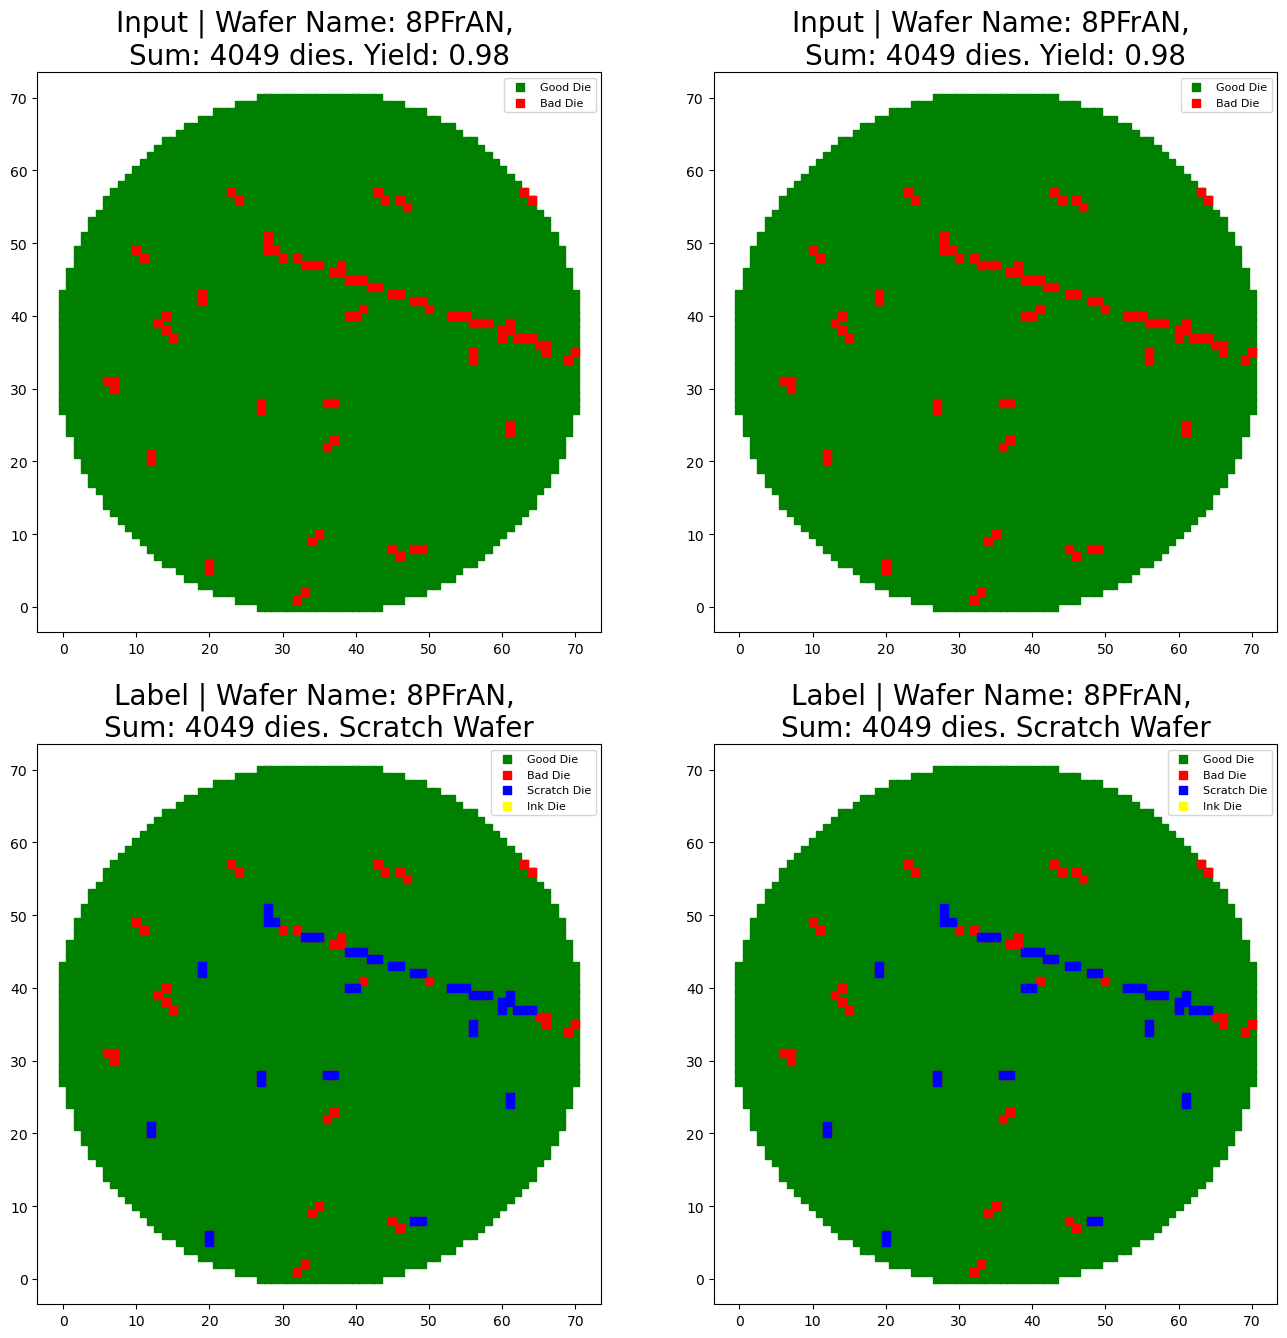

In [37]:

# New wafer using cleaned 
wafer_cleaned = wafer_df.copy()
print(wafer_cleaned.columns)
wafer_cleaned['IsScratchDie'] = wafer_cleaned['IsPredictedScratch']
wafer_cleaned['IsGoodDie'] = wafer_cleaned['IsGoodDie_Cleaned']

# Plot them side-by-side using your existing function
plot_wafer_maps([wafer_cleaned, wafer_cleaned], figsize=8, labels=True)

<h1 style="font-size: 20px; color: black;">scratch with ransac</h1>

In [61]:
bad_dies = np.column_stack(np.where(cleaned_grid))  

In [62]:
# Create RANSAC model with linear regression
##model = make_pipeline(PolynomialFeatures(1), RANSACRegressor())
if bad_dies.shape[0] >= 2:
    # Proceed only if at least 2 bad dies exist (RANSAC needs 2 points minimum)
    model = make_pipeline(PolynomialFeatures(degree=1), RANSACRegressor(max_trials=2000, residual_threshold=2))
    X = bad_dies[:, 1].reshape(-1, 1)  # DieX
    y = bad_dies[:, 0]                # DieY
    model.fit(X, y)
    
    # Continue with inlier mask, prediction, etc.
    inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
    scratch_coords = bad_dies[inlier_mask]
    
    # Your existing logic...
    
else:
    print("No scratch candidates (bad dies) found on wafer. Skipping RANSAC.")

In [63]:
# Create binary mask from the inlier coordinates
scratch_mask_ransac = np.zeros_like(cleaned_grid, dtype=bool)
for y, x in scratch_coords:
    scratch_mask_ransac[y, x] = True

# Add to DataFrame
wafer_df['IsPredictedScratch_RANSAC'] = wafer_df.apply(
    lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
    axis=1
)

# Count detected scratch dies
print(f"Detected {np.sum(wafer_df['IsPredictedScratch_RANSAC'])} scratch dies via RANSAC.")

Detected 26 scratch dies via RANSAC.


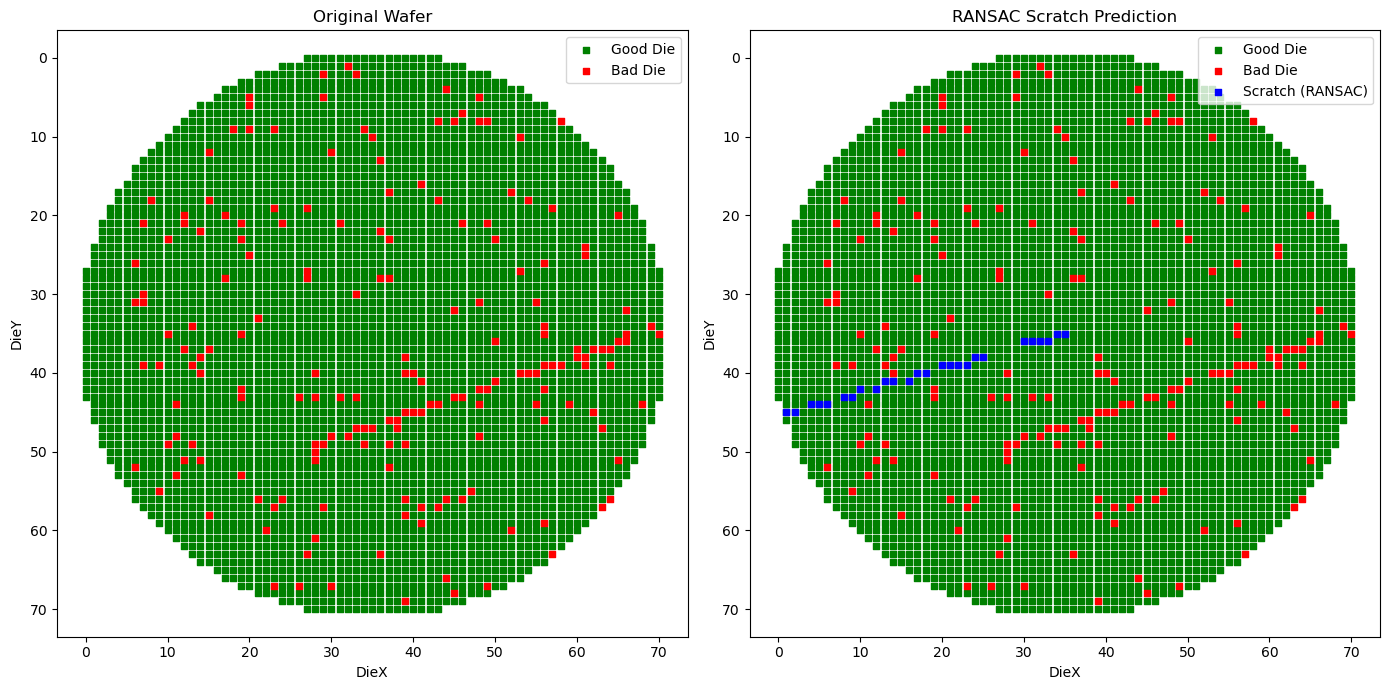

In [64]:


# Split data
original_bad = wafer_df[wafer_df['IsGoodDie'] == False]
ransac_scratch = wafer_df[wafer_df['IsPredictedScratch_RANSAC'] == True]
good = wafer_df[wafer_df['IsGoodDie'] == True]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# --- Original ---
axs[0].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
axs[0].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
axs[0].set_title("Original Wafer")
axs[0].invert_yaxis()
axs[0].set_xlabel("DieX")
axs[0].set_ylabel("DieY")
axs[0].legend()

# --- RANSAC Scratch ---
axs[1].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
axs[1].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
axs[1].scatter(ransac_scratch['DieX'], ransac_scratch['DieY'], color='blue', marker='s', s=15, label='Scratch (RANSAC)')
axs[1].set_title("RANSAC Scratch Prediction")
axs[1].invert_yaxis()
axs[1].set_xlabel("DieX")
axs[1].set_ylabel("DieY")
axs[1].legend()

plt.tight_layout()
plt.show()



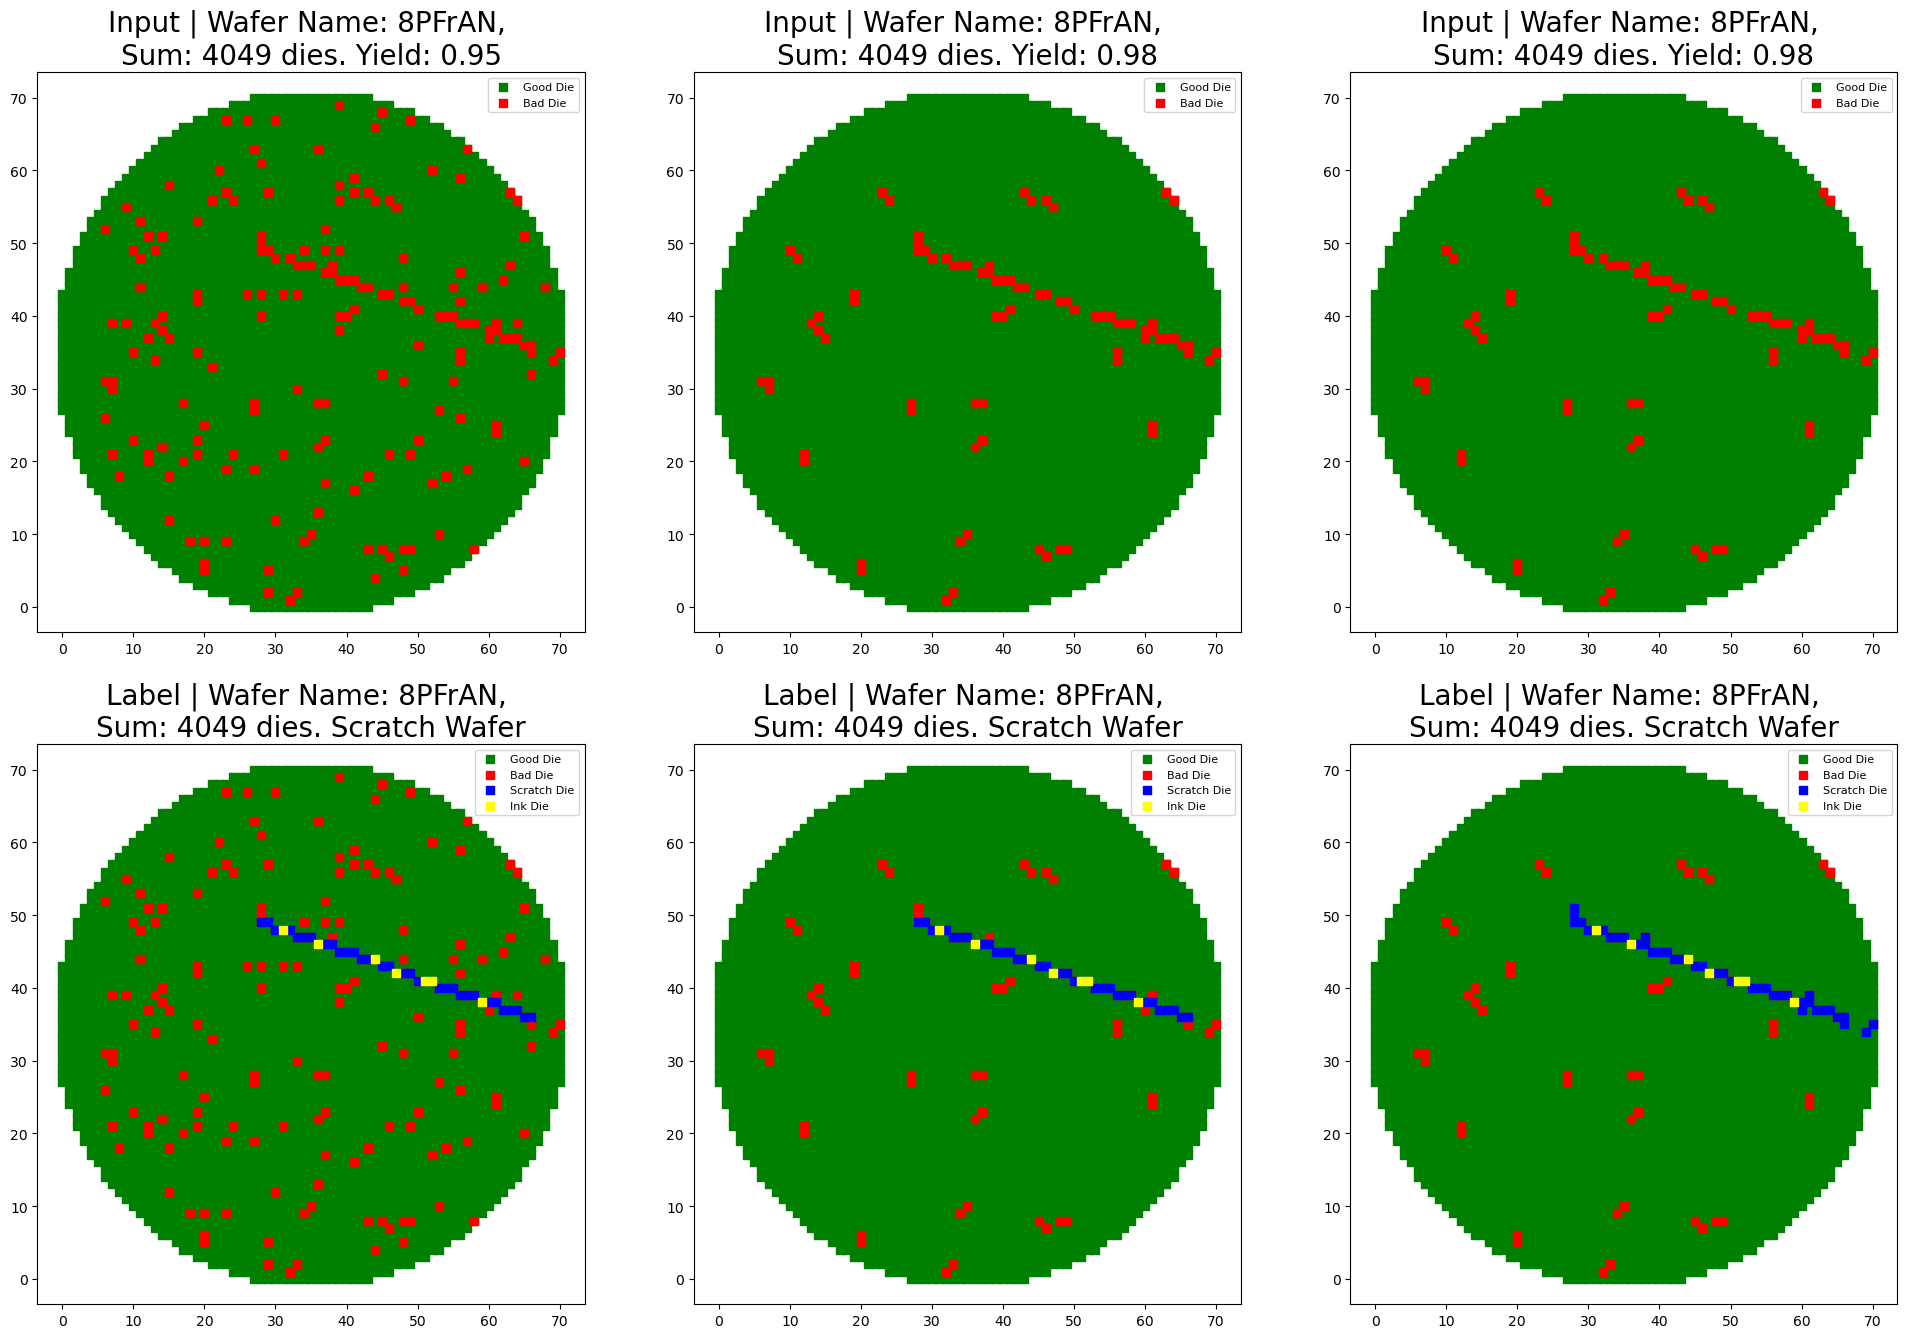

In [42]:
# Original wafer (before isolated dies removal)
wafer_original = wafer_df.copy()


# Cleaned wafer (after removing isolated bad dies)
wafer_cleaned = wafer_df.copy()
wafer_cleaned['IsGoodDie'] = wafer_cleaned['IsGoodDie_Cleaned']


# RANSAC result wafer (scratch detection added)
wafer_ransac = wafer_cleaned.copy()
wafer_ransac['IsScratchDie'] = wafer_df['IsPredictedScratch_RANSAC'] | wafer_df['IsScratchDie']   # use RANSAC result

# Plot all three side by side using your custom function
plot_wafer_maps([wafer_original, wafer_cleaned, wafer_ransac], figsize=8, labels=True)



0.04215531134995132


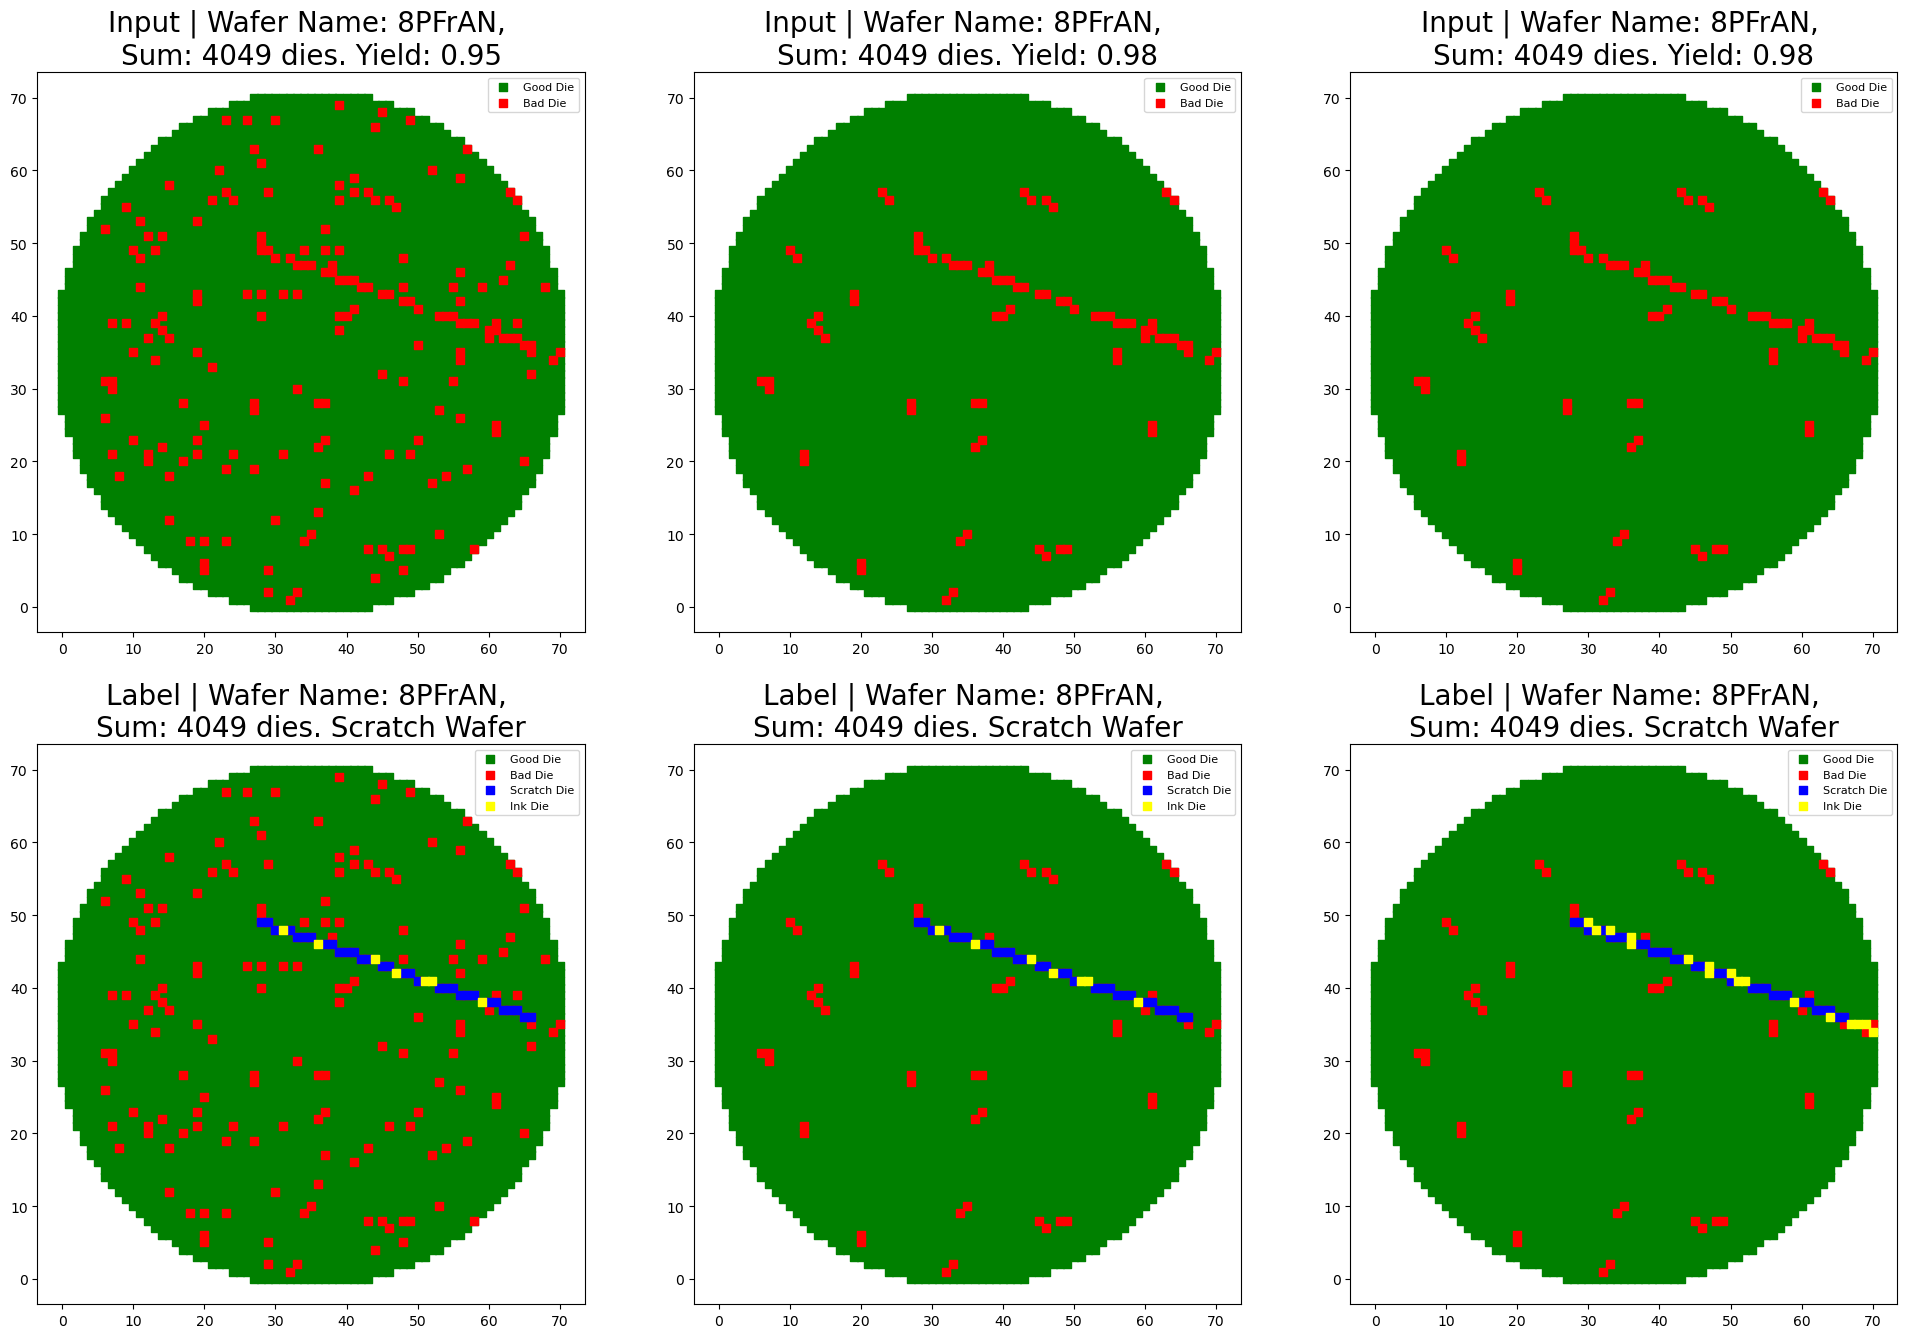

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'IsGoodDie_Cleaned', 'IsGoodDie_Dilated', 'IsGoodDie_Eroded',
       'IsPredictedScratch', 'IsPredictedScratch_RANSAC',
       'IsPredictedScratch_Local'],
      dtype='object')

In [43]:
# Predict all dies along the curve
x_inliers = bad_dies[inlier_mask][:, 1]  # DieX values
min_x_ransac = x_inliers.min()
max_x_ransac = x_inliers.max()

# Get good dies in range of RANSAC
good_dies_in_range = wafer_df[
    (wafer_df['IsGoodDie_Cleaned']) &
    (wafer_df['DieX'] >= min_x_ransac) &
    (wafer_df['DieX'] <= max_x_ransac)
].copy()

# Predict curve y-values for these good dies
X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
y_actual = good_dies_in_range['DieY'].values
y_pred = model.predict(X_good)

# Calculate how close each die is to the predicted curve
residuals = np.abs(y_actual - y_pred)
print(residuals.min())
residual_threshold = 0.5  # Try 0.3 or 0.5 to tighten or loosen
good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold


# Drop existing prediction column if it's already there (from a previous run)
if 'IsPredictedScratch_Local' in wafer_df.columns:
    wafer_df.drop(columns=['IsPredictedScratch_Local'], inplace=True)

# Then proceed with the merge safely
wafer_df = wafer_df.merge(
    good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_df['IsPredictedScratch_Local'].fillna(False, inplace=True)

wafer_local_ransac = wafer_cleaned.copy()
wafer_local_ransac['IsScratchDie'] = wafer_df['IsPredictedScratch_Local'] | wafer_df['IsScratchDie']

plot_wafer_maps([wafer_original, wafer_cleaned, wafer_local_ransac], figsize=8, labels=True)
wafer_df.columns

0.04215531134995132


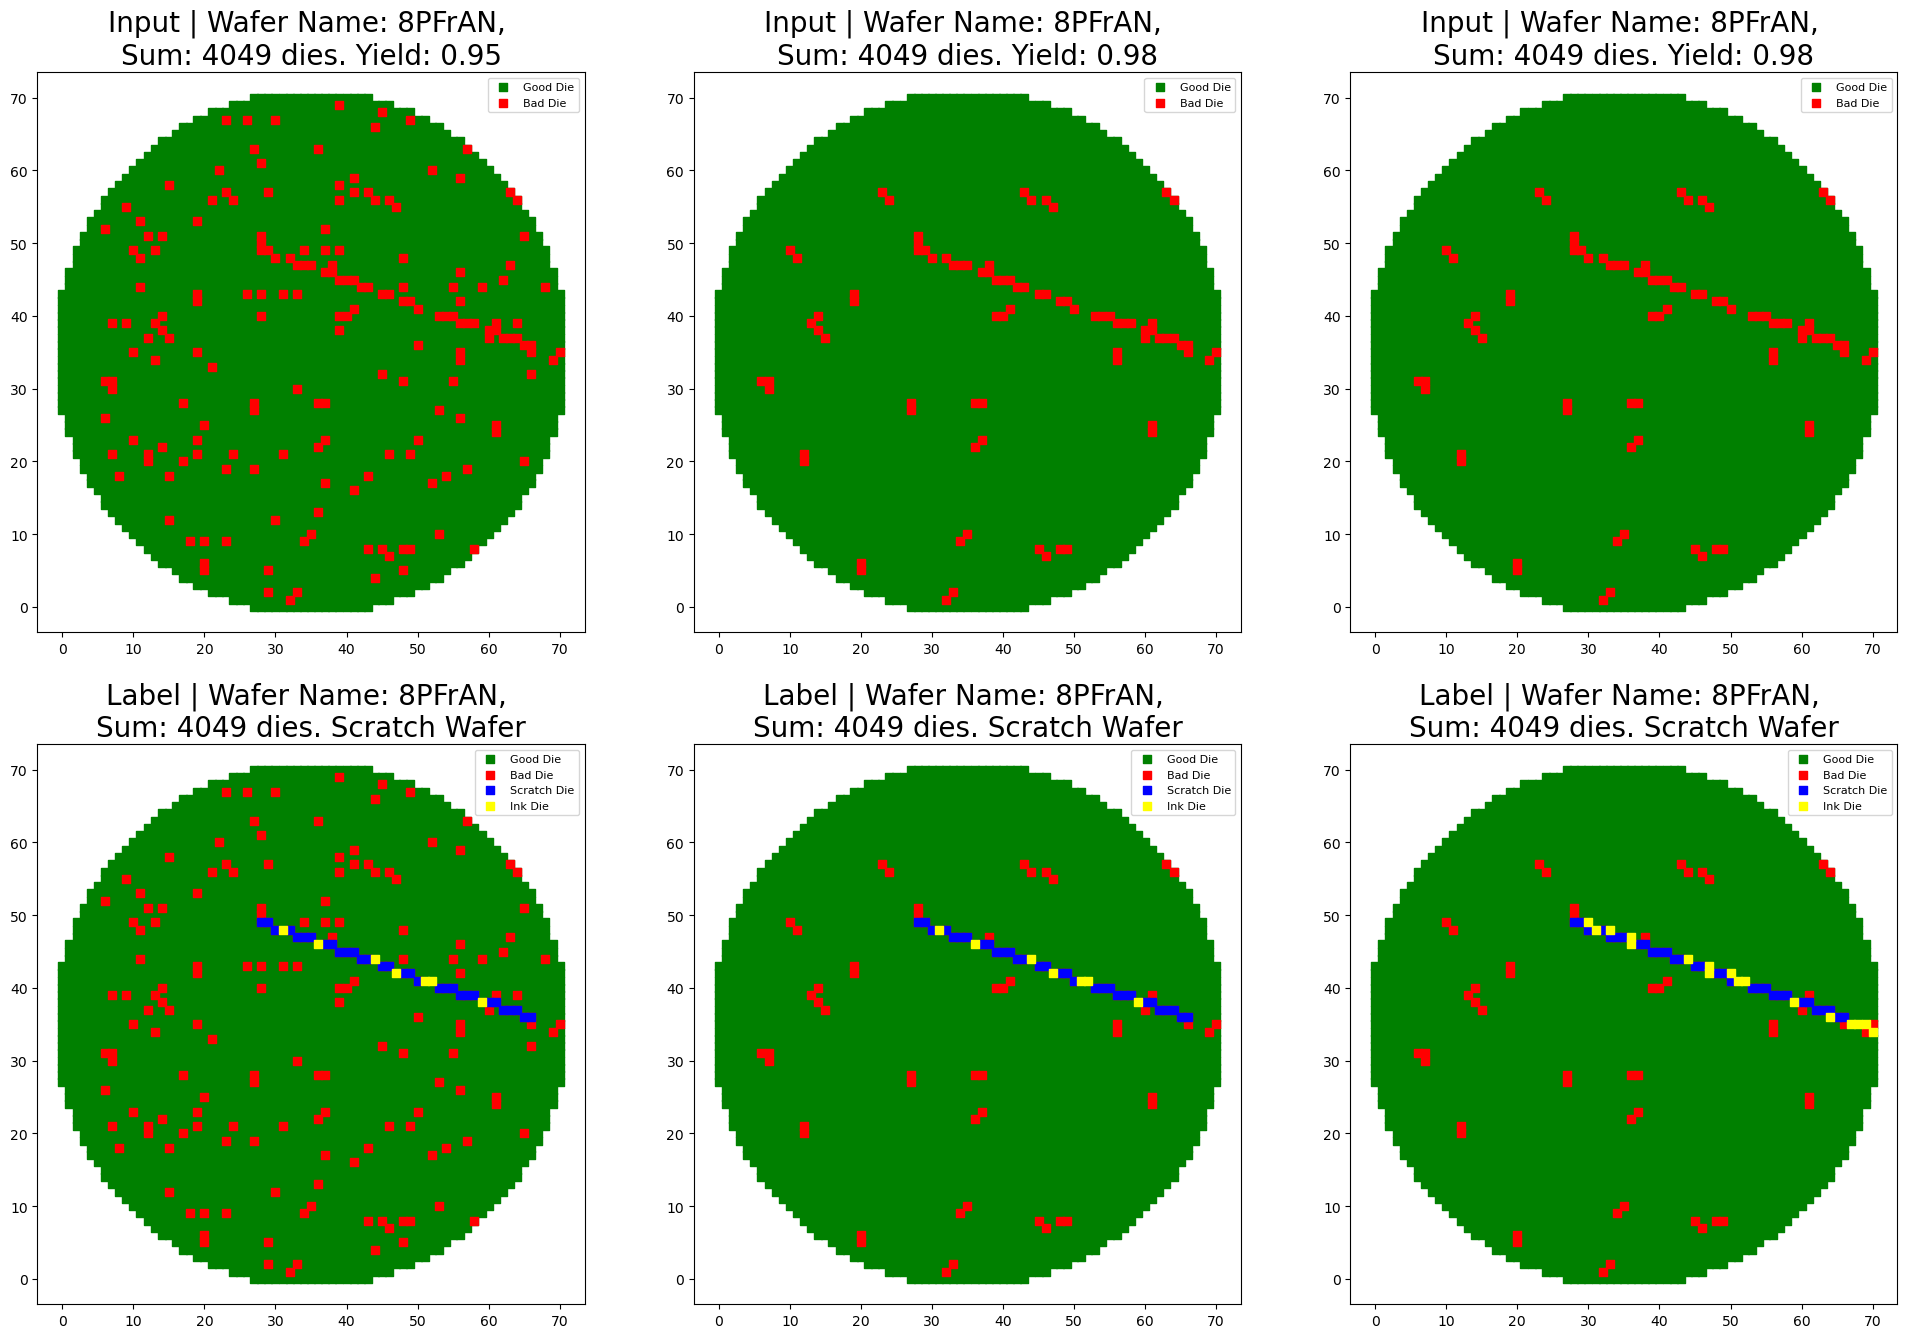

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'IsGoodDie_Cleaned', 'IsGoodDie_Dilated', 'IsGoodDie_Eroded',
       'IsPredictedScratch', 'IsPredictedScratch_RANSAC',
       'IsPredictedScratch_Local'],
      dtype='object')

In [44]:
# Predict all dies along the curve 2
x_inliers = bad_dies[inlier_mask][:, 1]  # DieX values
min_x_ransac = x_inliers.min()
max_x_ransac = x_inliers.max()

# Get good dies in range of RANSAC
good_dies_in_range = wafer_df[
    (wafer_df['IsGoodDie_Cleaned']) &
    (wafer_df['DieX'] >= min_x_ransac) &
    (wafer_df['DieX'] <= max_x_ransac)
].copy()

# Predict curve y-values for these good dies
X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
y_actual = good_dies_in_range['DieY'].values
y_pred = model.predict(X_good)

# Calculate how close each die is to the predicted curve
residuals = np.abs(y_actual - y_pred)
print(residuals.min())
residual_threshold = 0.5  # Try 0.3 or 0.5 to tighten or loosen

# Step 1: Get inlier bad dies (used by RANSAC)
scratch_coords = bad_dies[inlier_mask]  # shape: (n, 2), rows: [DieY, DieX]

# Step 2: Build spatial tree from inliers
scratch_tree = cKDTree(scratch_coords)

# Step 3: Check distance from each good die to closest scratch inlier
query_coords = good_dies_in_range[['DieY', 'DieX']].values  # also (row, col)
distances, _ = scratch_tree.query(query_coords)

# Step 4: Combine residual + proximity
max_residual = 0.5
max_distance = 3.0  # Adjust as needed based on die spacing

good_dies_in_range['IsPredictedScratch_Local'] = (
    (residuals < max_residual) & (distances < max_distance)
)

# Drop existing prediction column if it's already there (from a previous run)
if 'IsPredictedScratch_Local' in wafer_df.columns:
    wafer_df.drop(columns=['IsPredictedScratch_Local'], inplace=True)

# Then proceed with the merge safely
wafer_df = wafer_df.merge(
    good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_df['IsPredictedScratch_Local'].fillna(False, inplace=True)

wafer_local_ransac = wafer_cleaned.copy()
wafer_local_ransac['IsScratchDie'] = wafer_df['IsPredictedScratch_Local'] | wafer_df['IsScratchDie']

plot_wafer_maps([wafer_original, wafer_cleaned, wafer_local_ransac], figsize=8, labels=True)
wafer_df.columns

In [45]:
# test set yield
yield_per_wafer_test = df_wafers_test.groupby('WaferName').agg(
    total_dies=('IsGoodDie', 'count'),
    good_dies=('IsGoodDie', 'sum')
)

yield_per_wafer_test['yield'] = yield_per_wafer_test['good_dies'] / yield_per_wafer_test['total_dies']

# yield for wafer low to high
low_yield_wafers_test = yield_per_wafer_test.sort_values(by='yield')
print(low_yield_wafers_test.tail(10))  # change number as needed

threshold = 0.8
bad_wafer_names_test = low_yield_wafers_test[low_yield_wafers_test['yield'] < threshold].index.tolist()

print(f"\nWafers with yield below {threshold*100}%: {bad_wafer_names_test}")

           total_dies  good_dies     yield
WaferName                                 
wIjNiX           4049       3991  0.985675
bm4wAG           4049       3992  0.985922
mZa9ls           2997       2955  0.985986
dIhMZ4           1005        991  0.986070
fOGkUG           4049       3993  0.986169
VptaVm           4049       3993  0.986169
etkP0h           1513       1494  0.987442
G2K56s           4049       4000  0.987898
ixkZtG           1513       1496  0.988764
gPF1ln           2997       2969  0.990657

Wafers with yield below 50.0%: ['Ar9QwZ', 'IKRzN5', 'WpfSfc', 'ZW3dC7', 'KnR98o', 'Ys4eLt', '5cA62c', 'ayTMJl', 'KN4X6r', 'tezOWv']


<h1 style="font-size: 70px; color: black;">scratch test set</h1>

Estimated center of wafer WpfSfc: (27.00, 27.00)
Estimated radius of wafer WpfSfc: 27.89
DieX range: 0 to 54
DieY range: 0 to 54
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center'], dtype='object')


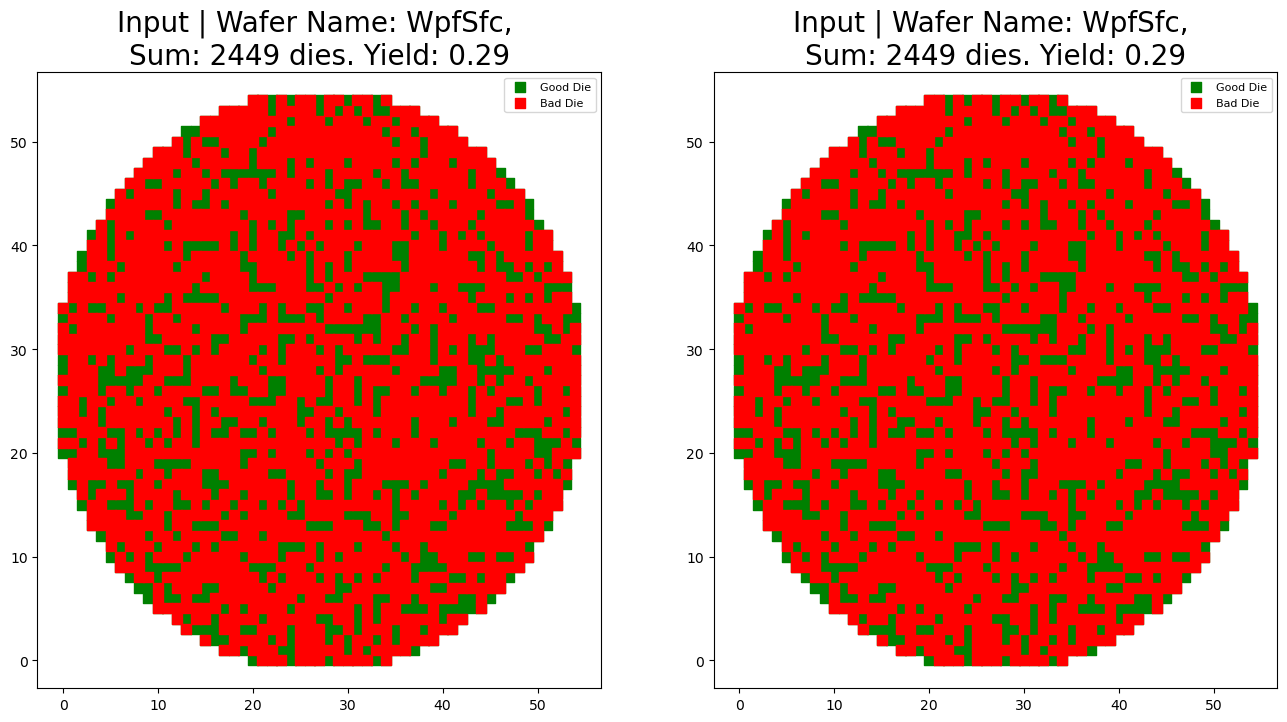

In [532]:
# wafers from test set

wafer_name = 'WpfSfc'#
wafer_df_test = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
# Approximate center

center_x = wafer_df_test['DieX'].mean()
center_y = wafer_df_test['DieY'].mean()

print(f"Estimated center of wafer {wafer_name}: ({center_x:.2f}, {center_y:.2f})")
wafer_df_test['distance_from_center'] = np.sqrt(
    (wafer_df_test['DieX'] - center_x)**2 + (wafer_df_test['DieY'] - center_y)**2
)

# Approximate radius

radius_estimate = wafer_df_test['distance_from_center'].max()
print(f"Estimated radius of wafer {wafer_name}: {radius_estimate:.2f}")

# Approximate x , y -  min , max
min_x = wafer_df_test['DieX'].min()
max_x = wafer_df_test['DieX'].max()
min_y = wafer_df_test['DieY'].min()
max_y = wafer_df_test['DieY'].max()

print(f"DieX range: {min_x} to {max_x}")
print(f"DieY range: {min_y} to {max_y}")

print(wafer_df_test.columns)
# plot wafer

plot_wafer_maps([wafer_df_test, wafer_df_test], figsize=8, labels=False)

In [501]:
# Choose a wafer
wafer_df_test = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()

# Create a grid of shape (max_y+1, max_x+1)
max_x = wafer_df_test['DieX'].max()
max_y = wafer_df_test['DieY'].max()

# Initialize an empty binary grid for bad dies
bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)

# Fill the grid: True if the die is bad
for _, row in wafer_df_test.iterrows():
    if not row['IsGoodDie']:
        bad_die_grid[row['DieY'], row['DieX']] = True

# Sanity check
print(f"Original bad dies: {np.sum(bad_die_grid)}")


Original bad dies: 57


In [502]:
# Define the 3x3 kernel to count neighbors (excluding center)
neighbor_kernel = np.array([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]])

# Count red neighbors for each die
neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)

# A die is considered isolated if it is red AND has 0 red neighbors
isolated_red = (bad_die_grid == True) & (neighbor_count == 0)


# Flip isolated red dies to green
cleaned_grid = bad_die_grid.copy()
cleaned_grid[isolated_red] = False

# Sanity check
print(f"Bad dies after removing isolated: {np.sum(cleaned_grid)} (removed {np.sum(isolated_red)})")

Bad dies after removing isolated: 33 (removed 24)


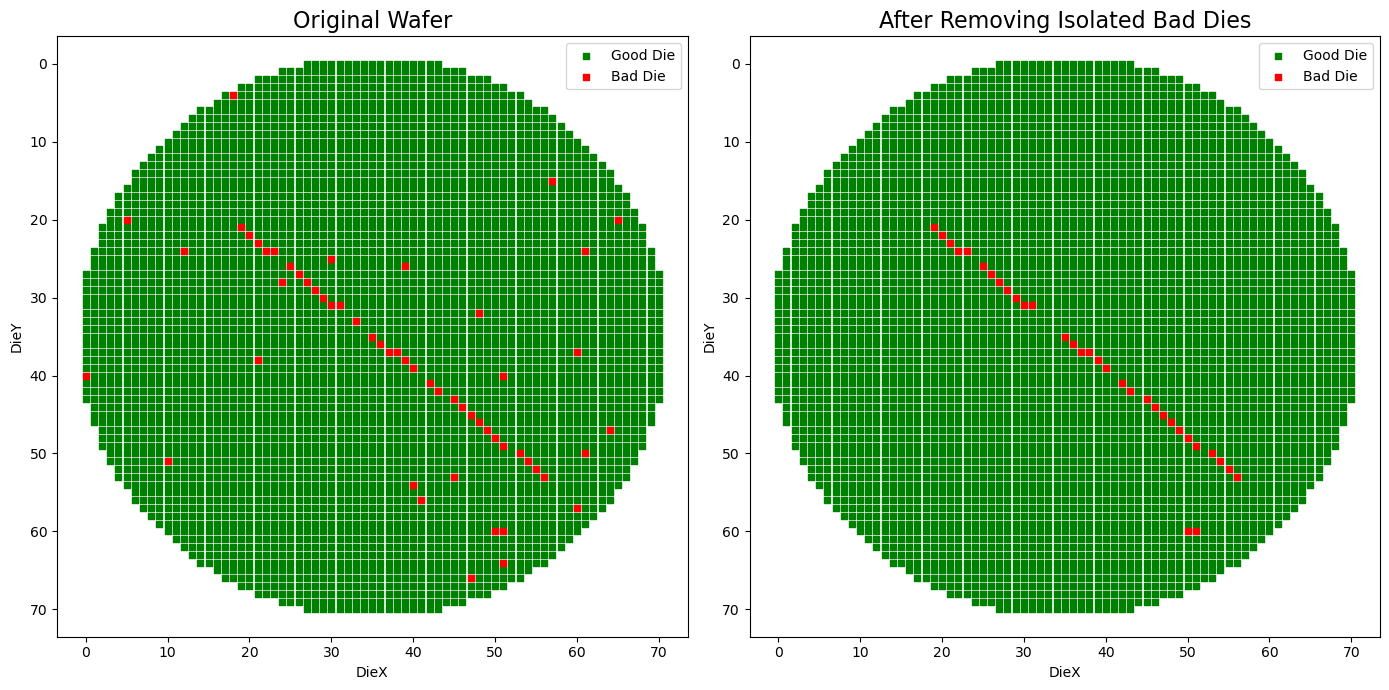

In [503]:
# Add cleaned result to DataFrame
wafer_df_test['IsGoodDie_Cleaned'] = wafer_df_test.apply(
    lambda row: False if cleaned_grid[row['DieY'], row['DieX']] else True,
    axis=1
)

# Plot Original vs Cleaned
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
titles = ['Original Wafer', 'After Removing Isolated Bad Dies']
columns = ['IsGoodDie', 'IsGoodDie_Cleaned']

for i in range(2):
    good = wafer_df_test[wafer_df_test[columns[i]] == True]
    bad = wafer_df_test[wafer_df_test[columns[i]] == False]

    ax[i].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
    ax[i].scatter(bad['DieX'], bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
    ax[i].set_title(titles[i], fontsize=16)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("DieX")
    ax[i].set_ylabel("DieY")
    ax[i].legend()

plt.tight_layout()
plt.show()


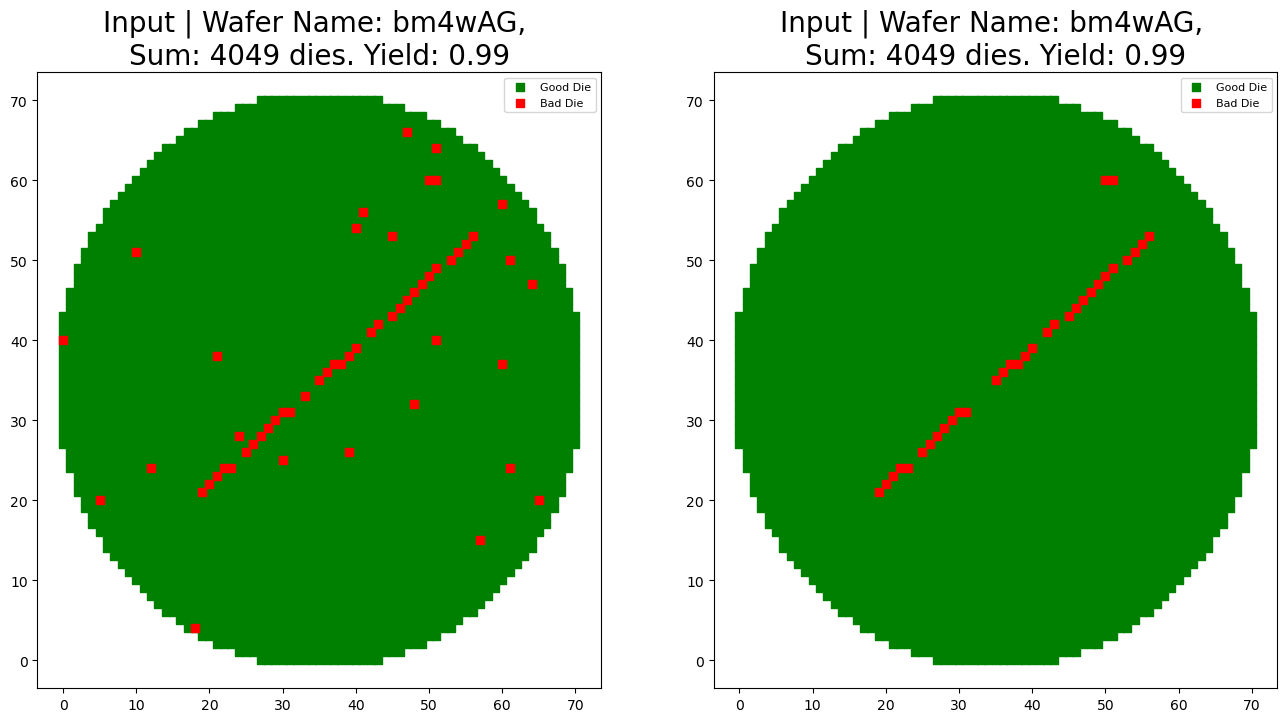

In [504]:
# Original wafer
wafer_original_test = wafer_df_test.copy()

# New wafer using cleaned 'IsGoodDie'
wafer_cleaned_test = wafer_df_test.copy()
wafer_cleaned_test['IsGoodDie'] = wafer_cleaned_test['IsGoodDie_Cleaned']

# Plot them side-by-side using your existing function
plot_wafer_maps([wafer_original_test, wafer_cleaned_test], figsize=8, labels=False)

<h1 style="font-size: 20px; color: black;">scratch with ransac test set</h1>

In [505]:
bad_dies = np.column_stack(np.where(cleaned_grid))  

In [506]:
# Create RANSAC model with linear regression
##model = make_pipeline(PolynomialFeatures(1), RANSACRegressor())
if bad_dies.shape[0] >= 2:
    # Proceed only if at least 2 bad dies exist (RANSAC needs 2 points minimum)
    model = make_pipeline(PolynomialFeatures(degree=1), RANSACRegressor(max_trials=2000, residual_threshold=2))
    X = bad_dies[:, 1].reshape(-1, 1)  # DieX
    y = bad_dies[:, 0]                # DieY
    model.fit(X, y)
    
    # Continue with inlier mask, prediction, etc.
    inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
    scratch_coords = bad_dies[inlier_mask]
    
    # Your existing logic...
    
else:
    print("No scratch candidates (bad dies) found on wafer. Skipping RANSAC.")

In [509]:
# Create binary mask from the inlier coordinates
scratch_mask_ransac = np.zeros_like(cleaned_grid, dtype=bool)
for y, x in scratch_coords:
    scratch_mask_ransac[y, x] = True

# Add to DataFrame
wafer_df_test['IsPredictedScratch_RANSAC'] = wafer_df_test.apply(
    lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
    axis=1
)

# Count detected scratch dies
print(f"Detected {np.sum(wafer_df_test['IsPredictedScratch_RANSAC'])} scratch dies via RANSAC.")

Detected 31 scratch dies via RANSAC.


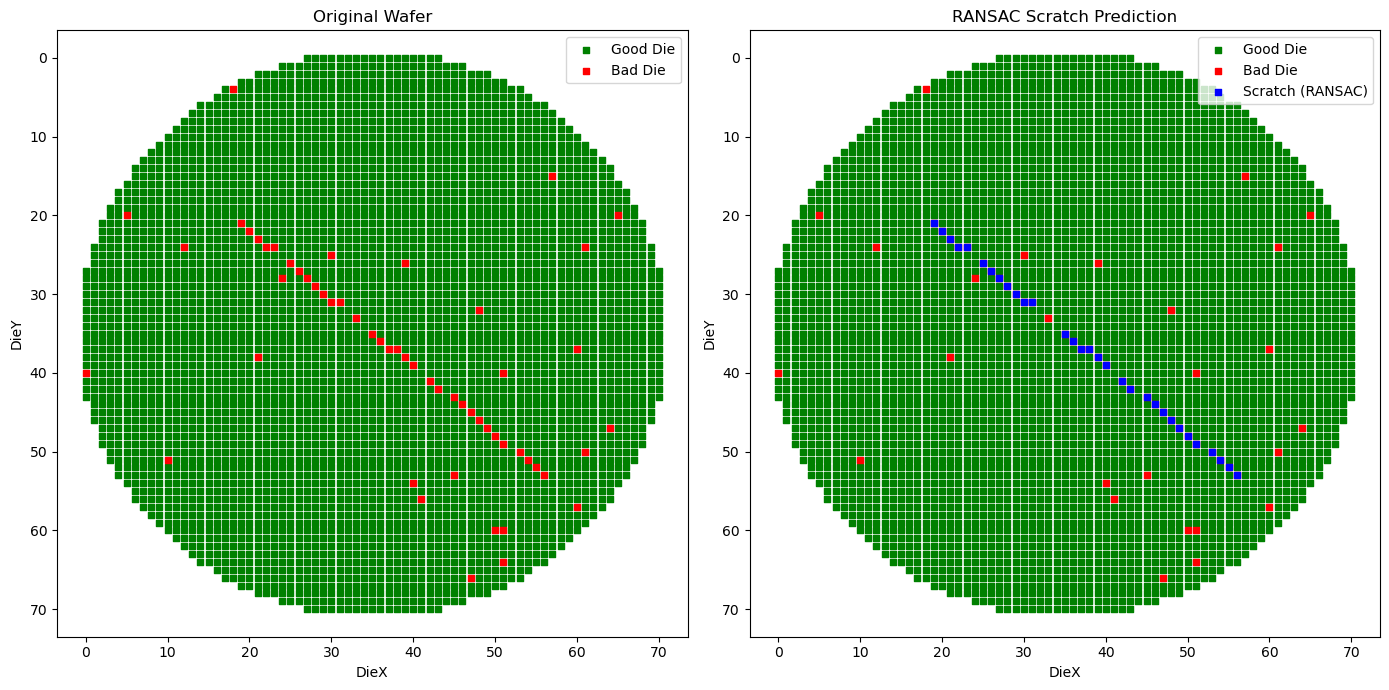

In [510]:
# Split data
original_bad = wafer_df_test[wafer_df_test['IsGoodDie'] == False]
ransac_scratch = wafer_df_test[wafer_df_test['IsPredictedScratch_RANSAC'] == True]
good = wafer_df_test[wafer_df_test['IsGoodDie'] == True]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# --- Original ---
axs[0].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
axs[0].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
axs[0].set_title("Original Wafer")
axs[0].invert_yaxis()
axs[0].set_xlabel("DieX")
axs[0].set_ylabel("DieY")
axs[0].legend()

# --- RANSAC Scratch ---
axs[1].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
axs[1].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
axs[1].scatter(ransac_scratch['DieX'], ransac_scratch['DieY'], color='blue', marker='s', s=15, label='Scratch (RANSAC)')
axs[1].set_title("RANSAC Scratch Prediction")
axs[1].invert_yaxis()
axs[1].set_xlabel("DieX")
axs[1].set_ylabel("DieY")
axs[1].legend()

plt.tight_layout()
plt.show()

0.00020660171956166096
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsGoodDie_Cleaned',
       'IsPredictedScratch_RANSAC'],
      dtype='object')
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsGoodDie_Cleaned'], dtype='object')


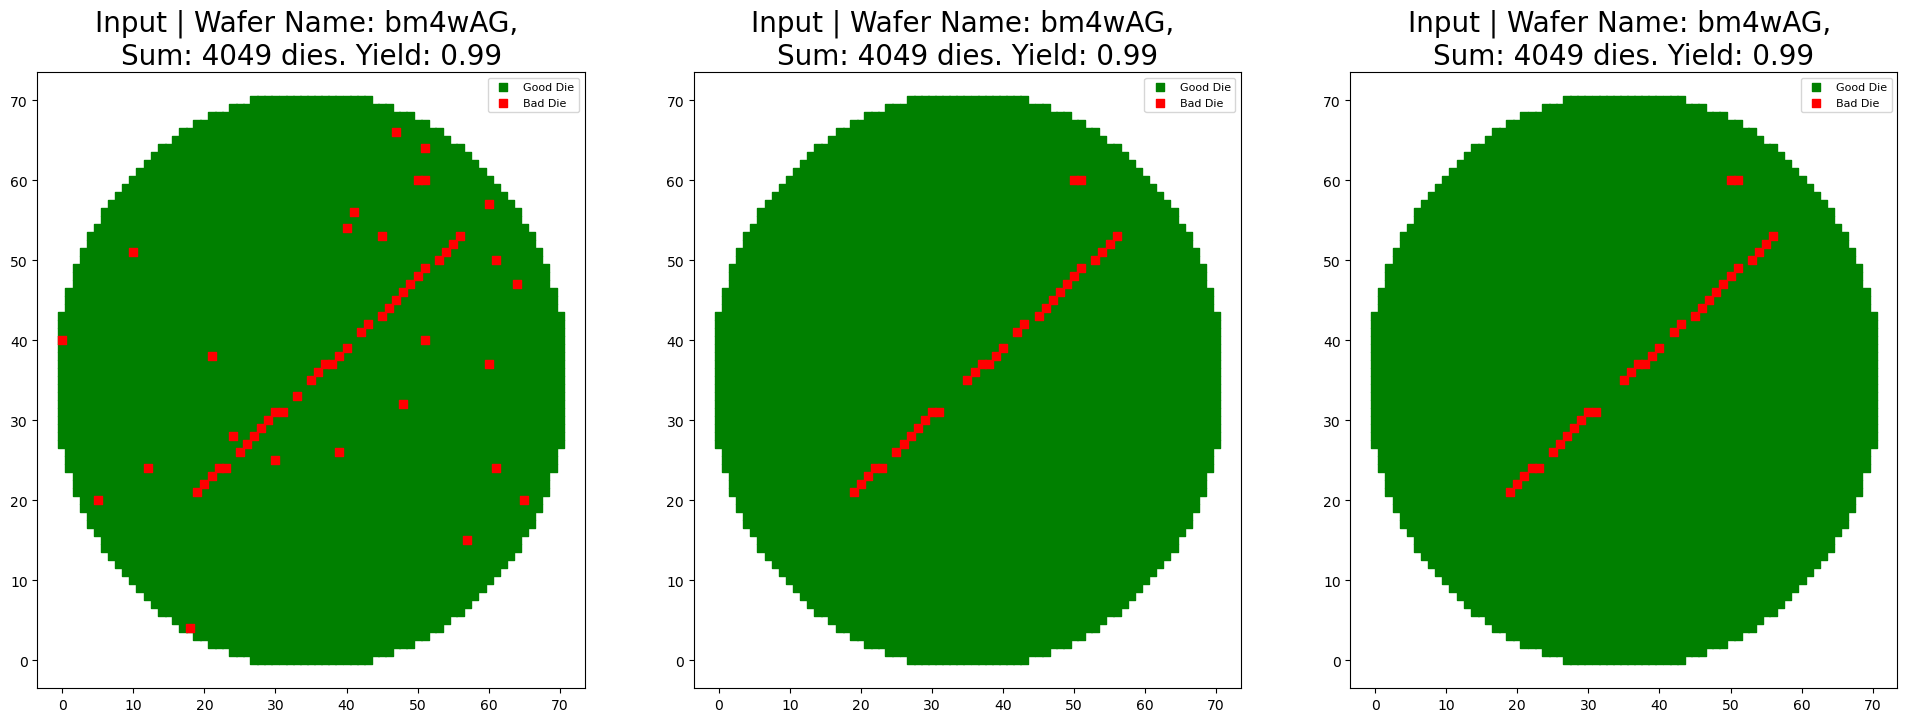

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsGoodDie_Cleaned',
       'IsPredictedScratch_RANSAC', 'IsPredictedScratch_Local'],
      dtype='object')

In [511]:
# Predict all dies along the curve
x_inliers = bad_dies[inlier_mask][:, 1]  # DieX values
min_x_ransac = x_inliers.min()
max_x_ransac = x_inliers.max()

# Get good dies in range of RANSAC
good_dies_in_range = wafer_df_test[
    (wafer_df_test['IsGoodDie_Cleaned']) &
    (wafer_df_test['DieX'] >= min_x_ransac) &
    (wafer_df_test['DieX'] <= max_x_ransac)
].copy()

# Predict curve y-values for these good dies
X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
y_actual = good_dies_in_range['DieY'].values
y_pred = model.predict(X_good)

# Calculate how close each die is to the predicted curve
residuals = np.abs(y_actual - y_pred)
print(residuals.min())
residual_threshold = 0.5  # Try 0.3 or 0.5 to tighten or loosen
good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold

print(wafer_df_test.columns)
print(wafer_cleaned_test.columns)

# Drop existing prediction column if it's already there (from a previous run)
if 'IsPredictedScratch_Local' in wafer_df_test.columns:
    wafer_df_test.drop(columns=['IsPredictedScratch_Local'], inplace=True)

# Then proceed with the merge safely
wafer_df_test = wafer_df_test.merge(
    good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_df_test['IsPredictedScratch_Local'].fillna(False, inplace=True)


# # Ensure 'IsScratchDie' column exists before using it
# if 'IsScratchDie' not in wafer_df_test.columns:
#     wafer_df_test['IsScratchDie'] = False

# # Combine the scratch predictions
wafer_local_ransac_test = wafer_cleaned_test.copy()
# wafer_local_ransac_test['IsScratchDie'] = wafer_df_test['IsPredictedScratch_Local'] | wafer_df_test['IsScratchDie']

# for df in [wafer_original_test, wafer_cleaned_test, wafer_local_ransac_test]:
#     if 'IsScratchDie' not in df.columns:
#         df['IsScratchDie'] = False

# Plot
plot_wafer_maps([wafer_original_test, wafer_cleaned_test, wafer_local_ransac_test], figsize=8, labels=False)

wafer_df_test.columns

In [512]:
all_dies_in_range = wafer_df_test[
    (wafer_df_test['DieX'] >= min_x_ransac) &
    (wafer_df_test['DieX'] <= max_x_ransac)
].copy()

X_all = all_dies_in_range['DieX'].values.reshape(-1, 1)
y_all_actual = all_dies_in_range['DieY'].values
y_all_pred = model.predict(X_all)

# Residual thresholding
residuals_all = np.abs(y_all_actual - y_all_pred)
all_dies_in_range['IsOnScratchLine'] = residuals_all < residual_threshold

In [513]:
def label_die(row):
    if row['IsOnScratchLine'] and not row['IsGoodDie_Cleaned']:
        return 'blue'   # Bad die along scratch
    elif row['IsOnScratchLine'] and row['IsGoodDie_Cleaned']:
        return 'yellow'  # Good die close to scratch
    elif not row['IsGoodDie_Cleaned']:
        return 'red'    # Other bad dies
    else:
        return 'green'  # Regular good dies

# Merge this info back into the full wafer for plotting
wafer_viz_df = wafer_df_test.copy()
wafer_viz_df = wafer_viz_df.merge(
    all_dies_in_range[['DieX', 'DieY', 'IsOnScratchLine']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_viz_df['IsOnScratchLine'].fillna(False, inplace=True)
wafer_viz_df['ScratchLabel'] = wafer_viz_df.apply(label_die, axis=1)

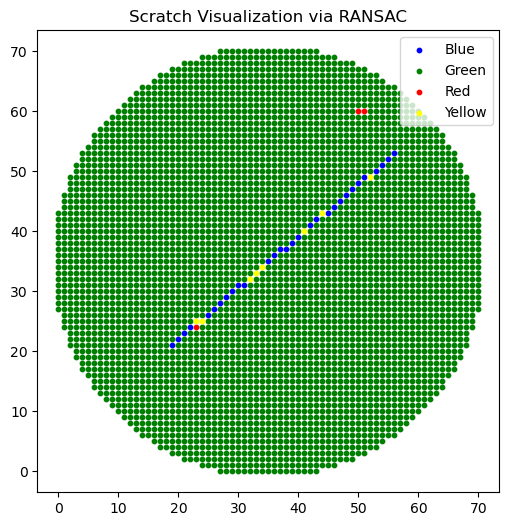

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsGoodDie_Cleaned',
       'IsPredictedScratch_RANSAC', 'IsPredictedScratch_Local'],
      dtype='object')

In [514]:
def plot_custom_scratch_map(df, figsize=6):
    color_map = {
        'green': 'green',
        'red': 'red',
        'yellow': 'yellow',
        'blue': 'blue'
    }

    plt.figure(figsize=(figsize, figsize))
    for label, group in df.groupby('ScratchLabel'):
        plt.scatter(group['DieX'], group['DieY'], 
                    c=color_map[label], 
                    label=label.capitalize(), 
                    s=10)
    
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.title('Scratch Visualization via RANSAC')
    plt.show()

# Call the plot
plot_custom_scratch_map(wafer_viz_df)
wafer_df_test.columns


In [515]:
# Start by copying the wafer_df_test (full test set)
wafer_with_predictions = wafer_df_test.copy()

# Merge IsOnScratchLine info into the full test set
wafer_with_predictions = wafer_with_predictions.merge(
    all_dies_in_range[['DieX', 'DieY', 'IsOnScratchLine']],
    on=['DieX', 'DieY'],
    how='left'
)

# Fill NaN with False for dies not on the scratch line
wafer_with_predictions['IsOnScratchLine'].fillna(False, inplace=True)

# Rename column to something clearer
wafer_with_predictions.rename(columns={'IsOnScratchLine': 'IsScratchDie'}, inplace=True)
#wafer_with_predictions.rename(columns={'IsPredictedScratchDie': 'IsScratchDie'}, inplace=True)

wafer_with_predictions.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsGoodDie_Cleaned',
       'IsPredictedScratch_RANSAC', 'IsPredictedScratch_Local',
       'IsScratchDie'],
      dtype='object')

In [516]:
# Select only the desired columns
wafer_scratch_results = wafer_with_predictions[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'
]]


wafer_scratch_results.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'], dtype='object')

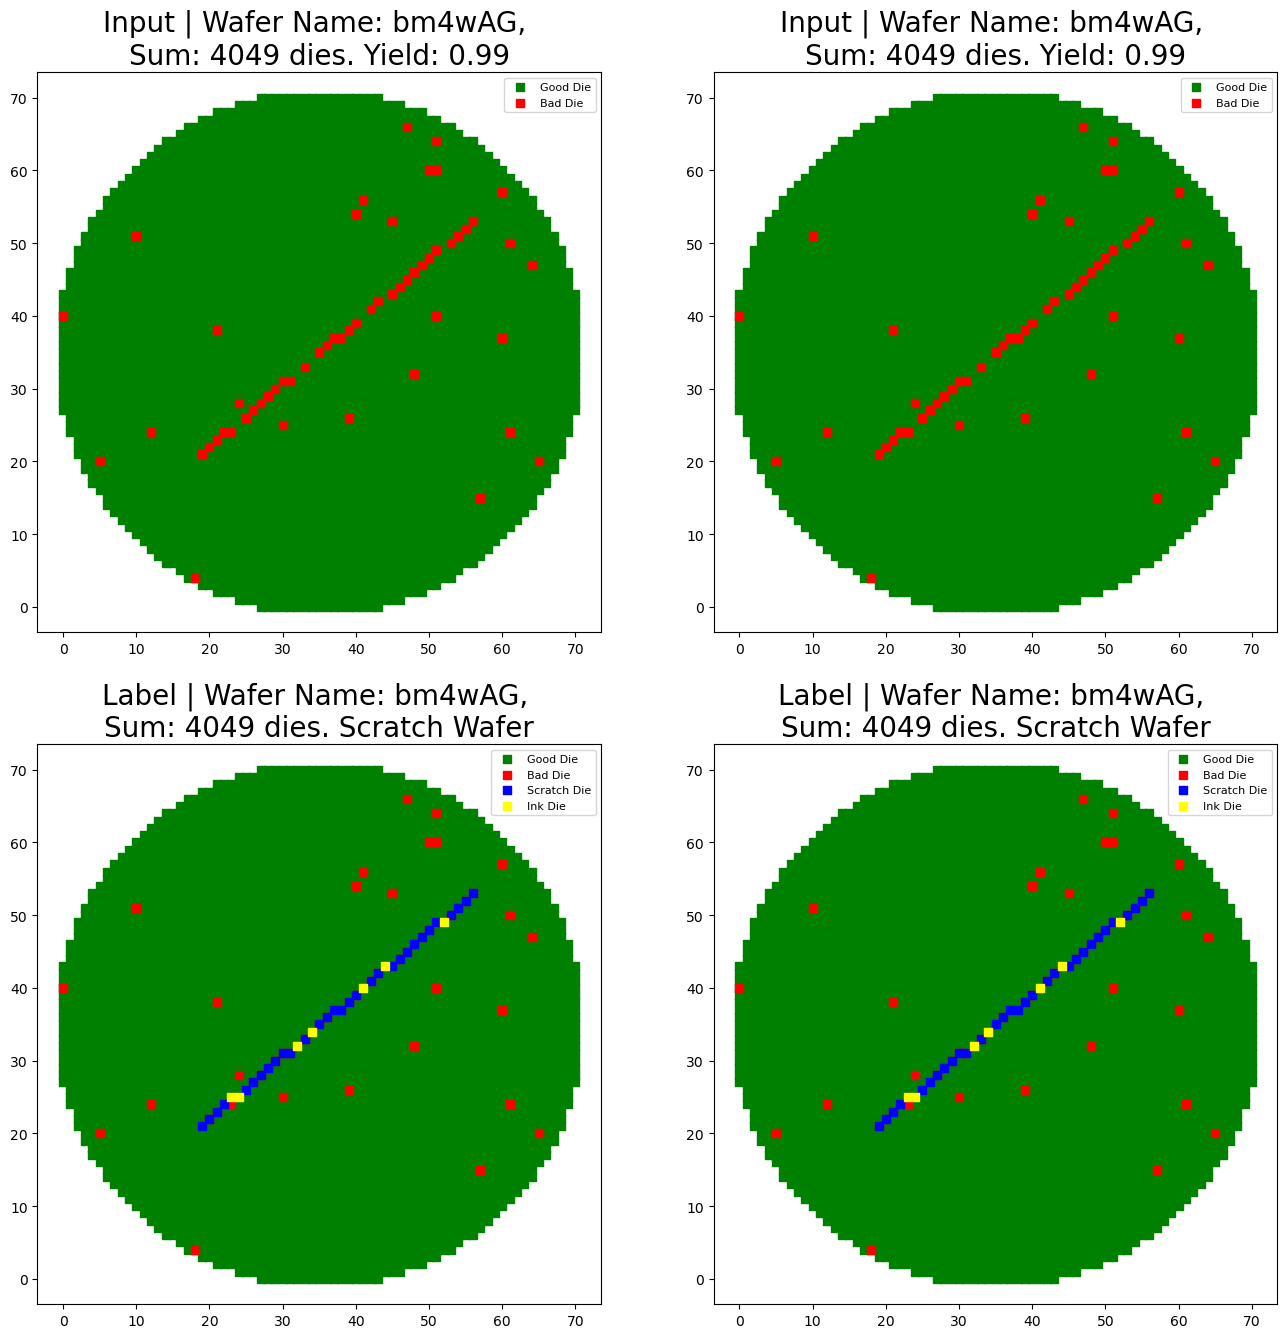

In [517]:
plot_wafer_maps([wafer_scratch_results, wafer_scratch_results], figsize=8, labels=True)

In [518]:
wafer_with_predictions.rename(columns={'IsScratchDie': 'IsPredictedScratchDie'}, inplace=True)
wafer_scratch_results = wafer_with_predictions[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'
]]
wafer_scratch_results.columns


Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'], dtype='object')

In [519]:
# Save to CSV
wafer_scratch_results.to_csv('wafer_scratch_predictions_cleaned.csv', index=False)
wafer_scratch_results.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'], dtype='object')

<h1 style="font-size: 70px; color: black;"> train set valuation</h1>

In [528]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, matthews_corrcoef


In [461]:
#{'KQWkdW' , 'cp5x0M' , 'uGFKya', ' rHkc9I'} 8PFrAN
# 1. Select a single wafer from training set
wafer_name = 'qpvohQ'  # Replace with your actual wafer name
wafer_train =  df_wafers[df_wafers['WaferName'] == wafer_name].copy()

# 2. Save true labels for evaluation later
wafer_true = wafer_train.copy()

# 3. Drop true scratch labels for prediction (simulate test set)
wafer_for_pred = wafer_train.drop(columns=['IsScratchDie'])





In [435]:

# Processing wafer: y9tKHj
# Processing wafer: jNSNSN
# Processing wafer: UpdgZR
# Processing wafer: x5emnH
# Processing wafer: VChyJL
# Processing wafer: QLTgHn
# Processing wafer: fHmbu6
# Processing wafer: NPOXim
# Processing wafer: IhkAx7
# Processing wafer: cXx0Me

In [346]:
df_wafers.head(10)

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False
5,8PFrAN,0,32,True,False
6,8PFrAN,0,33,True,False
7,8PFrAN,0,34,True,False
8,8PFrAN,0,35,True,False
9,8PFrAN,0,36,True,False


Estimated center of wafer qpvohQ: (32.00, 32.00)
Estimated radius of wafer qpvohQ: 32.98
DieX range: 0 to 64
DieY range: 0 to 64
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center'], dtype='object')


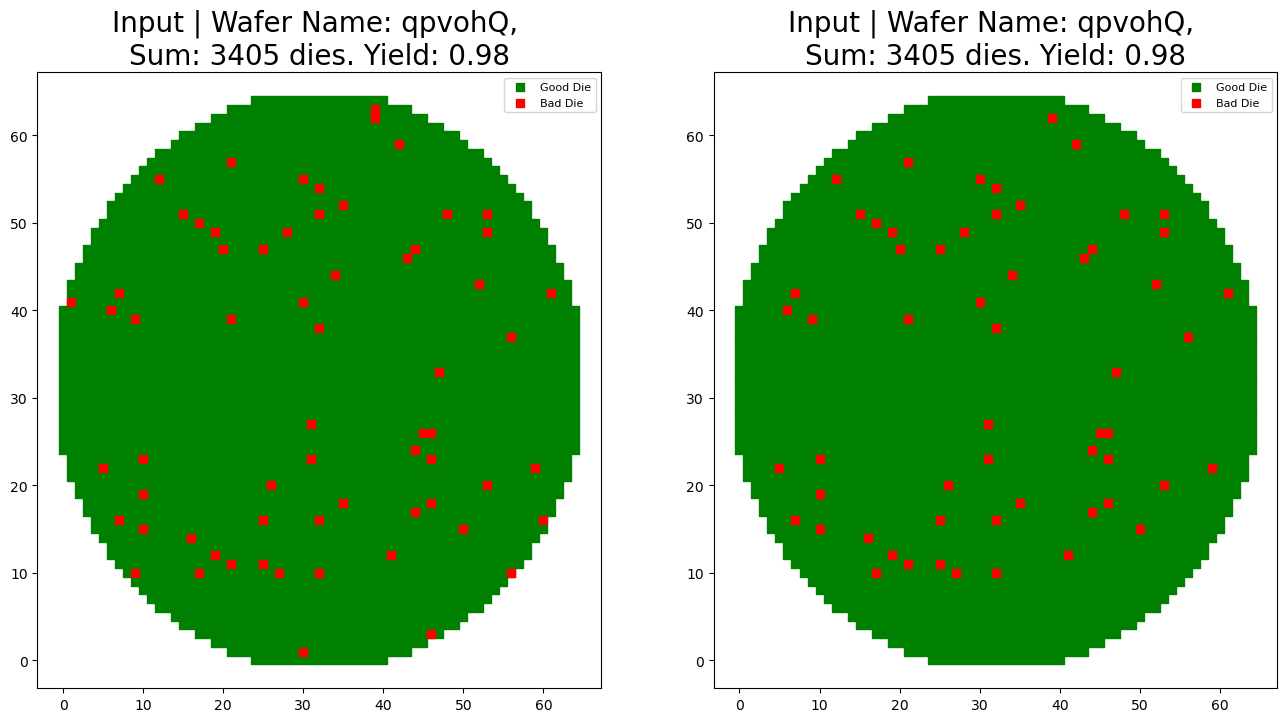

In [462]:
# 4. Run your prediction logic on wafer_for_pred

center_x = wafer_for_pred['DieX'].mean()
center_y = wafer_for_pred['DieY'].mean()

print(f"Estimated center of wafer {wafer_name}: ({center_x:.2f}, {center_y:.2f})")
wafer_for_pred['distance_from_center'] = np.sqrt(
    (wafer_for_pred['DieX'] - center_x)**2 + (wafer_for_pred['DieY'] - center_y)**2
)

radius_threshold = 0.94
edge_mask_pred = (
    (wafer_for_pred['IsGoodDie'] == False) &
    (wafer_for_pred['distance_from_center'] >= wafer_for_pred['distance_from_center'].max() * radius_threshold)
)

wafer_for_pred.loc[edge_mask_pred, 'IsGoodDie'] = True
# Approximate radius

radius_estimate = wafer_for_pred['distance_from_center'].max()
print(f"Estimated radius of wafer {wafer_name}: {radius_estimate:.2f}")

# Approximate x , y -  min , max
min_x = wafer_for_pred['DieX'].min()
max_x = wafer_for_pred['DieX'].max()
min_y = wafer_for_pred['DieY'].min()
max_y = wafer_for_pred['DieY'].max()

print(f"DieX range: {min_x} to {max_x}")
print(f"DieY range: {min_y} to {max_y}")

print(wafer_for_pred.columns)
# plot wafer

plot_wafer_maps([wafer_true, wafer_for_pred], figsize=8, labels=False)

In [463]:
# Choose a wafer
wafer_df_pred = wafer_for_pred.copy()

# Create a grid of shape (max_y+1, max_x+1)
max_x = wafer_df_pred['DieX'].max()
max_y = wafer_df_pred['DieY'].max()

# Initialize an empty binary grid for bad dies
bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)

# Fill the grid: True if the die is bad
for _, row in wafer_df_pred.iterrows():
    if not row['IsGoodDie']:
        bad_die_grid[row['DieY'], row['DieX']] = True

# Sanity check
print(f"Original bad dies: {np.sum(bad_die_grid)}")

Original bad dies: 58


In [464]:
# Define the 3x3 kernel to count neighbors (excluding center)
neighbor_kernel = np.array([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]])

# Count red neighbors for each die
neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)

# A die is considered isolated if it is red AND has 0 red neighbors
isolated_red = (bad_die_grid == True) & (neighbor_count == 0)


# Flip isolated red dies to green
cleaned_grid_pred = bad_die_grid.copy()
cleaned_grid_pred[isolated_red] = False
# Sanity check
print(f"Bad dies after removing isolated: {np.sum(cleaned_grid_pred)} (removed {np.sum(isolated_red)})")

Bad dies after removing isolated: 4 (removed 54)


In [465]:
# Add cleaned result to DataFrame
wafer_df_pred['IsGoodDie_Cleaned'] = wafer_df_pred.apply(
    lambda row: False if cleaned_grid_pred[row['DieY'], row['DieX']] else True,
    axis=1
)

# #Plot Original vs Cleaned
# fig, ax = plt.subplots(1, 2, figsize=(14, 7))
# titles = ['Original Wafer', 'After Removing Isolated Bad Dies']
# columns = ['IsGoodDie', 'IsGoodDie_Cleaned']

# for i in range(2):
    
#     good = wafer_df_pred[wafer_df_pred[columns[i]] == True]
#     bad = wafer_df_pred[wafer_df_pred[columns[i]] == False]

#     ax[i].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
#     ax[i].scatter(bad['DieX'], bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
#     ax[i].set_title(titles[i], fontsize=16)
#     ax[i].invert_yaxis()
#     ax[i].set_xlabel("DieX")
#     ax[i].set_ylabel("DieY")
#     ax[i].legend()

# plt.tight_layout()
# plt.show()


In [468]:
# Original wafer
wafer_original_pred = wafer_df_pred.copy()

# New wafer using cleaned 'IsGoodDie'
wafer_cleaned_pred = wafer_df_pred.copy()
wafer_cleaned_pred['IsGoodDie'] = wafer_cleaned_pred['IsGoodDie_Cleaned']
print(wafer_original_pred.columns)
print(wafer_cleaned_pred.columns)

# # Plot them side-by-side using your existing function
#plot_wafer_maps([wafer_original_pred, wafer_cleaned_pred], figsize=8, labels=False)

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center',
       'IsGoodDie_Cleaned'],
      dtype='object')
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center',
       'IsGoodDie_Cleaned'],
      dtype='object')


In [471]:
# Dilation: grow bad dies a little
dilated_bad_dies = binary_dilation(cleaned_grid_pred, structure=np.ones((3,3)))
#dilated_bad_dies = binary_dilation(dilated_bad_dies, structure=np.ones((3,3)))
# (5,5) kernel => you can tune how much to grow

# Sanity check
print(f"After dilation, dies in scratch zone: {np.sum(dilated_bad_dies)}")

# First, make sure you assign the dilation result to the dataframe:
wafer_df_pred['IsGoodDie_Dilated'] = wafer_df_pred.apply(
    lambda row: False if dilated_bad_dies[row['DieY'], row['DieX']] else True,
    axis=1
)

# # Plot
# fig, ax = plt.subplots(1, 3, figsize=(21, 7))
# titles = ['After Removing Isolated', 'After Dilation', 'Overlay (Cleaned + Dilated)']

# # 1st plot: Cleaned wafer
# good = wafer_df_pred[wafer_df_pred['IsGoodDie_Cleaned']]
# bad = wafer_df_pred[~wafer_df_pred['IsGoodDie_Cleaned']]
# ax[0].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
# ax[0].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
# ax[0].set_title(titles[0])
# ax[0].invert_yaxis()

# # 2nd plot: After Dilation
# good = wafer_df_pred[wafer_df_pred['IsGoodDie_Dilated']]
# bad = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
# ax[1].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
# ax[1].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
# ax[1].set_title(titles[1])
# ax[1].invert_yaxis()

# # 3rd plot: Overlay Cleaned vs Dilated
# bad_cleaned = wafer_df_pred[~wafer_df_pred['IsGoodDie_Cleaned']]
# bad_dilated = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
# ax[2].scatter(wafer_df_pred['DieX'], wafer_df_pred['DieY'], color='lightgrey', s=15, marker='s', alpha=0.3)
# ax[2].scatter(bad_cleaned['DieX'], bad_cleaned['DieY'], color='blue', s=15, marker='s', label='Cleaned Bad')
# ax[2].scatter(bad_dilated['DieX'], bad_dilated['DieY'], color='orange', s=15, marker='s', label='Dilated Bad')
# ax[2].set_title(titles[2])
# ax[2].invert_yaxis()
# ax[2].legend()

# plt.tight_layout()
# plt.show()


After dilation, dies in scratch zone: 26


In [472]:
# Step 1: Create dilated_bad_dies grid
wafer_width = wafer_df_pred['DieX'].max() + 1
wafer_height = wafer_df_pred['DieY'].max() + 1

dilated_bad_dies = np.zeros((wafer_height, wafer_width), dtype=bool)
bad_dies = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
dilated_bad_dies[bad_dies['DieY'], bad_dies['DieX']] = True

# Step 2: Label clusters
structure = np.ones((3, 3), dtype=bool)  # 8-connectivity
labeled_array, num_features = label(dilated_bad_dies, structure=structure)

print(f"Found {num_features} clusters.")

# Step 3: Find largest cluster
sizes = np.bincount(labeled_array.ravel())
sizes[0] = 0  # Background
largest_label = sizes.argmax()

print(f"Largest cluster label: {largest_label} with size {sizes[largest_label]}")

# Step 4: Create masks for plotting
largest_cluster_mask = (labeled_array == largest_label)
good_dies_mask = ~dilated_bad_dies

# # Step 5: Plotting in your requested 3-column style
# fig, ax = plt.subplots(1, 3, figsize=(21, 7))
# titles = ['After Cleaning', 'After Dilation', 'Largest Bad Cluster Only']

# # 1st plot: After Cleaning
# good = wafer_df_pred[wafer_df_pred['IsGoodDie_Cleaned']]
# bad = wafer_df_pred[~wafer_df_pred['IsGoodDie_Cleaned']]
# ax[0].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
# ax[0].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
# ax[0].set_title(titles[0])
# ax[0].invert_yaxis()
# ax[0].set_aspect('equal')

# # 2nd plot: After Dilation
# good = wafer_df_pred[wafer_df_pred['IsGoodDie_Dilated']]
# bad = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
# ax[1].scatter(good['DieX'], good['DieY'], color='green', s=15, marker='s')
# ax[1].scatter(bad['DieX'], bad['DieY'], color='red', s=15, marker='s')
# ax[1].set_title(titles[1])
# ax[1].invert_yaxis()
# ax[1].set_aspect('equal')

# # 3rd plot: Only largest cluster (red) vs good dies (green)
# good_y, good_x = np.where(good_dies_mask)
# cluster_y, cluster_x = np.where(largest_cluster_mask)
# ax[2].scatter(good_x, good_y, color='green', s=15, marker='s', label='Good Dies')
# ax[2].scatter(cluster_x, cluster_y, color='red', s=15, marker='s', label='Largest Bad Cluster')
# ax[2].set_title(titles[2])
# ax[2].invert_yaxis()
# ax[2].legend()
# ax[2].set_aspect('equal')

# plt.tight_layout()
# plt.show()

Found 2 clusters.
Largest cluster label: 2 with size 14


<h1 style="font-size: 40px; color: black;">scratch with ransac valuation</h1>

In [473]:
bad_dies_pred = np.column_stack(np.where(cleaned_grid_pred)) 

In [476]:
if bad_dies_pred.shape[0] >= 5:
    # Proceed only if at least 2 bad dies exist (RANSAC needs 2 points minimum)
    model = make_pipeline(PolynomialFeatures(degree=1), RANSACRegressor(max_trials=3000, residual_threshold=2))
    X = bad_dies_pred[:, 1].reshape(-1, 1)  # DieX
    y = bad_dies_pred[:, 0]                # DieY
    model.fit(X, y)
    
    # Continue with inlier mask, prediction, etc.
    inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
    scratch_coords = bad_dies_pred[inlier_mask]
    
    # Your existing logic...
    
else:
    print("No scratch candidates (bad dies) found on wafer. Skipping RANSAC.")

No scratch candidates (bad dies) found on wafer. Skipping RANSAC.


In [477]:
scratch_mask_ransac = np.zeros_like(cleaned_grid_pred, dtype=bool)
for y, x in scratch_coords:
    scratch_mask_ransac[y, x] = True

wafer_df_pred = wafer_cleaned_pred.copy()
# Add to DataFrame
wafer_df_pred['IsPredictedScratch_RANSAC'] = wafer_df_pred.apply(
    lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
    axis=1
)
# wafer_df_pred['InDilatedZone'] = wafer_df_pred.apply(
#     lambda row: dilated_bad_dies[row['DieY'], row['DieX']],
#     axis=1
# )

# Ensure that only the largest red cluster is considered
wafer_df_pred['InDilatedZone'] = wafer_df_pred.apply(
    lambda row: largest_cluster_mask[row['DieY'], row['DieX']],
    axis=1
)

# Count detected scratch dies
print(f"Detected {np.sum(wafer_df_pred['IsPredictedScratch_RANSAC'])} scratch dies via RANSAC.")

Detected 1 scratch dies via RANSAC.


In [478]:
# Split data
original_bad = wafer_df_pred[wafer_df_pred['IsGoodDie'] == False]
ransac_scratch = wafer_df_pred[wafer_df_pred['IsPredictedScratch_RANSAC'] == True]
good = wafer_df_pred[wafer_df_pred['IsGoodDie'] == True]

# # Plot
# fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# # --- Original ---
# axs[0].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
# axs[0].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
# axs[0].set_title("Original Wafer")
# axs[0].invert_yaxis()
# axs[0].set_xlabel("DieX")
# axs[0].set_ylabel("DieY")
# axs[0].legend()

# # --- RANSAC Scratch ---
# axs[1].scatter(good['DieX'], good['DieY'], color='green', marker='s', s=15, label='Good Die')
# axs[1].scatter(original_bad['DieX'], original_bad['DieY'], color='red', marker='s', s=15, label='Bad Die')
# axs[1].scatter(ransac_scratch['DieX'], ransac_scratch['DieY'], color='blue', marker='s', s=15, label='Scratch (RANSAC)')
# axs[1].set_title("RANSAC Scratch Prediction")
# axs[1].invert_yaxis()
# axs[1].set_xlabel("DieX")
# axs[1].set_ylabel("DieY")
# axs[1].legend()

# plt.tight_layout()
# plt.show()

In [479]:
# Predict all dies along the curve
x_inliers = bad_dies_pred[inlier_mask][:, 1]  # DieX values
min_x_ransac = x_inliers.min()
max_x_ransac = x_inliers.max()

# Get good dies in range of RANSAC + add k dies to the scratch at the edges [ min_x_ransac-k ,max_x_ransac+k]
good_dies_in_range = wafer_df_pred[
    (wafer_df_pred['IsGoodDie_Cleaned']) &
    (wafer_df_pred['DieX'] >= min_x_ransac-5) &
    (wafer_df_pred['DieX'] <= max_x_ransac+5)
].copy()

# Predict curve y-values for these good dies
X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
y_actual = good_dies_in_range['DieY'].values
y_pred = model.predict(X_good)

# Calculate how close each die is to the predicted curve
residuals = np.abs(y_actual - y_pred)
print(residuals.min())
residual_threshold = 1.5  # Try 0.3 or 0.5 to tighten or loosen
good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold

print(wafer_df_pred.columns)
print(wafer_cleaned_pred.columns)

# Drop existing prediction column if it's already there (from a previous run)
if 'IsPredictedScratch_Local' in wafer_df_pred.columns:
    wafer_df_pred.drop(columns=['IsPredictedScratch_Local'], inplace=True)

# Then proceed with the merge safely
wafer_df_pred = wafer_df_pred.merge(
    good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_df_pred['IsPredictedScratch_Local'].fillna(False, inplace=True)


# # Ensure 'IsScratchDie' column exists before using it
# if 'IsScratchDie' not in wafer_df_test.columns:
#     wafer_df_test['IsScratchDie'] = False

# # Combine the scratch predictions
wafer_local_ransac_pred = wafer_cleaned_pred.copy()
# wafer_local_ransac_test['IsScratchDie'] = wafer_df_test['IsPredictedScratch_Local'] | wafer_df_test['IsScratchDie']

# for df in [wafer_original_test, wafer_cleaned_test, wafer_local_ransac_test]:
#     if 'IsScratchDie' not in df.columns:
#         df['IsScratchDie'] = False

# Plot
#plot_wafer_maps([wafer_original_pred, wafer_cleaned_pred, wafer_local_ransac_pred], figsize=8, labels=False)

# wafer_df_pred.columns

0.0
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center',
       'IsGoodDie_Cleaned', 'IsPredictedScratch_RANSAC', 'InDilatedZone'],
      dtype='object')
Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center',
       'IsGoodDie_Cleaned'],
      dtype='object')


In [480]:
all_dies_in_range_pred = wafer_df_pred[
    (wafer_df_pred['DieX'] >= min_x_ransac-5) &
    (wafer_df_pred['DieX'] <= max_x_ransac +5)
].copy()

X_all = all_dies_in_range_pred['DieX'].values.reshape(-1, 1)
y_all_actual = all_dies_in_range_pred['DieY'].values
y_all_pred = model.predict(X_all)

# Residual thresholding
residuals_all = np.abs(y_all_actual - y_all_pred)
#all_dies_in_range_pred['IsOnScratchLine'] = residuals_all < residual_threshold

# create mask to expend biggest bad cluser so we dont miss dies in the edges of scratch
cluster_mask = np.zeros((wafer_df_pred['DieY'].max()+2, wafer_df_pred['DieX'].max()+2), dtype=bool)
cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']] = wafer_df_pred['InDilatedZone']

# 2. Dilate it (grow 1 die around)
structure = np.ones((3, 3), dtype=bool)  # 3x3 = expand one step
expanded_cluster_mask = binary_dilation(cluster_mask, structure=structure)
expanded_cluster_mask = binary_dilation(expanded_cluster_mask, structure=structure)
#expanded_cluster_mask = binary_dilation(expanded_cluster_mask, structure=structure)


# 3. Check if each die is inside expanded cluster
is_near_big_cluster = expanded_cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']]

all_dies_in_range_pred['IsOnScratchLine'] = (
    (residuals_all < residual_threshold) &
    (is_near_big_cluster[all_dies_in_range_pred.index])
)

# all_dies_in_range_pred['IsOnScratchLine'] = (
#     (residuals_all < residual_threshold) &
#     (wafer_df_pred.loc[all_dies_in_range_pred.index, 'InDilatedZone'])
# )


In [481]:
def label_die_pred(row):
    if row['IsOnScratchLine'] and not row['IsGoodDie_Cleaned']:
        return 'blue'   # Bad die along scratch
    elif row['IsOnScratchLine'] and row['IsGoodDie_Cleaned']:
        return 'yellow'  # Good die close to scratch
    elif not row['IsGoodDie_Cleaned']:
        return 'red'    # Other bad dies
    else:
        return 'green'  # Regular good dies

# Merge this info back into the full wafer for plotting
wafer_viz_df_pred = wafer_df_pred.copy()
wafer_viz_df_pred = wafer_viz_df_pred.merge(
    all_dies_in_range_pred[['DieX', 'DieY', 'IsOnScratchLine']],
    on=['DieX', 'DieY'],
    how='left'
)
wafer_viz_df_pred['IsOnScratchLine'].fillna(False, inplace=True)
wafer_viz_df_pred['ScratchLabel'] = wafer_viz_df_pred.apply(label_die_pred, axis=1)

In [482]:
def plot_custom_scratch_map_pred(df, figsize=6):
    color_map = {
        'green': 'green',
        'red': 'red',
        'yellow': 'yellow',
        'blue': 'blue'
    }

    plt.figure(figsize=(figsize, figsize))
    for label, group in df.groupby('ScratchLabel'):
        plt.scatter(group['DieX'], group['DieY'], 
                    c=color_map[label], 
                    label=label.capitalize(), 
                    s=10)
    
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.title('Scratch Visualization via RANSAC')
    plt.show()

# Call the plot
#plot_custom_scratch_map_pred(wafer_viz_df_pred)
# print(wafer_df_pred.columns)
# print(wafer_viz_df_pred.columns)

In [483]:
wafer_with_pred = wafer_df_pred.copy()

# Merge IsOnScratchLine info into the full test set
wafer_with_pred = wafer_with_pred.merge(
    all_dies_in_range_pred[['DieX', 'DieY', 'IsOnScratchLine']],
    on=['DieX', 'DieY'],
    how='left'
)

# Fill NaN with False for dies not on the scratch line
wafer_with_pred['IsOnScratchLine'].fillna(False, inplace=True)

# Rename column to something clearer
wafer_with_pred.rename(columns={'IsOnScratchLine': 'IsScratchDie'}, inplace=True)
#wafer_with_predictions.rename(columns={'IsPredictedScratchDie': 'IsScratchDie'}, inplace=True)

wafer_with_pred.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'distance_from_center',
       'IsGoodDie_Cleaned', 'IsPredictedScratch_RANSAC', 'InDilatedZone',
       'IsPredictedScratch_Local', 'IsScratchDie'],
      dtype='object')

In [484]:
wafer_scratch_results_pred = wafer_with_pred[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'
]]


wafer_scratch_results_pred.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'], dtype='object')

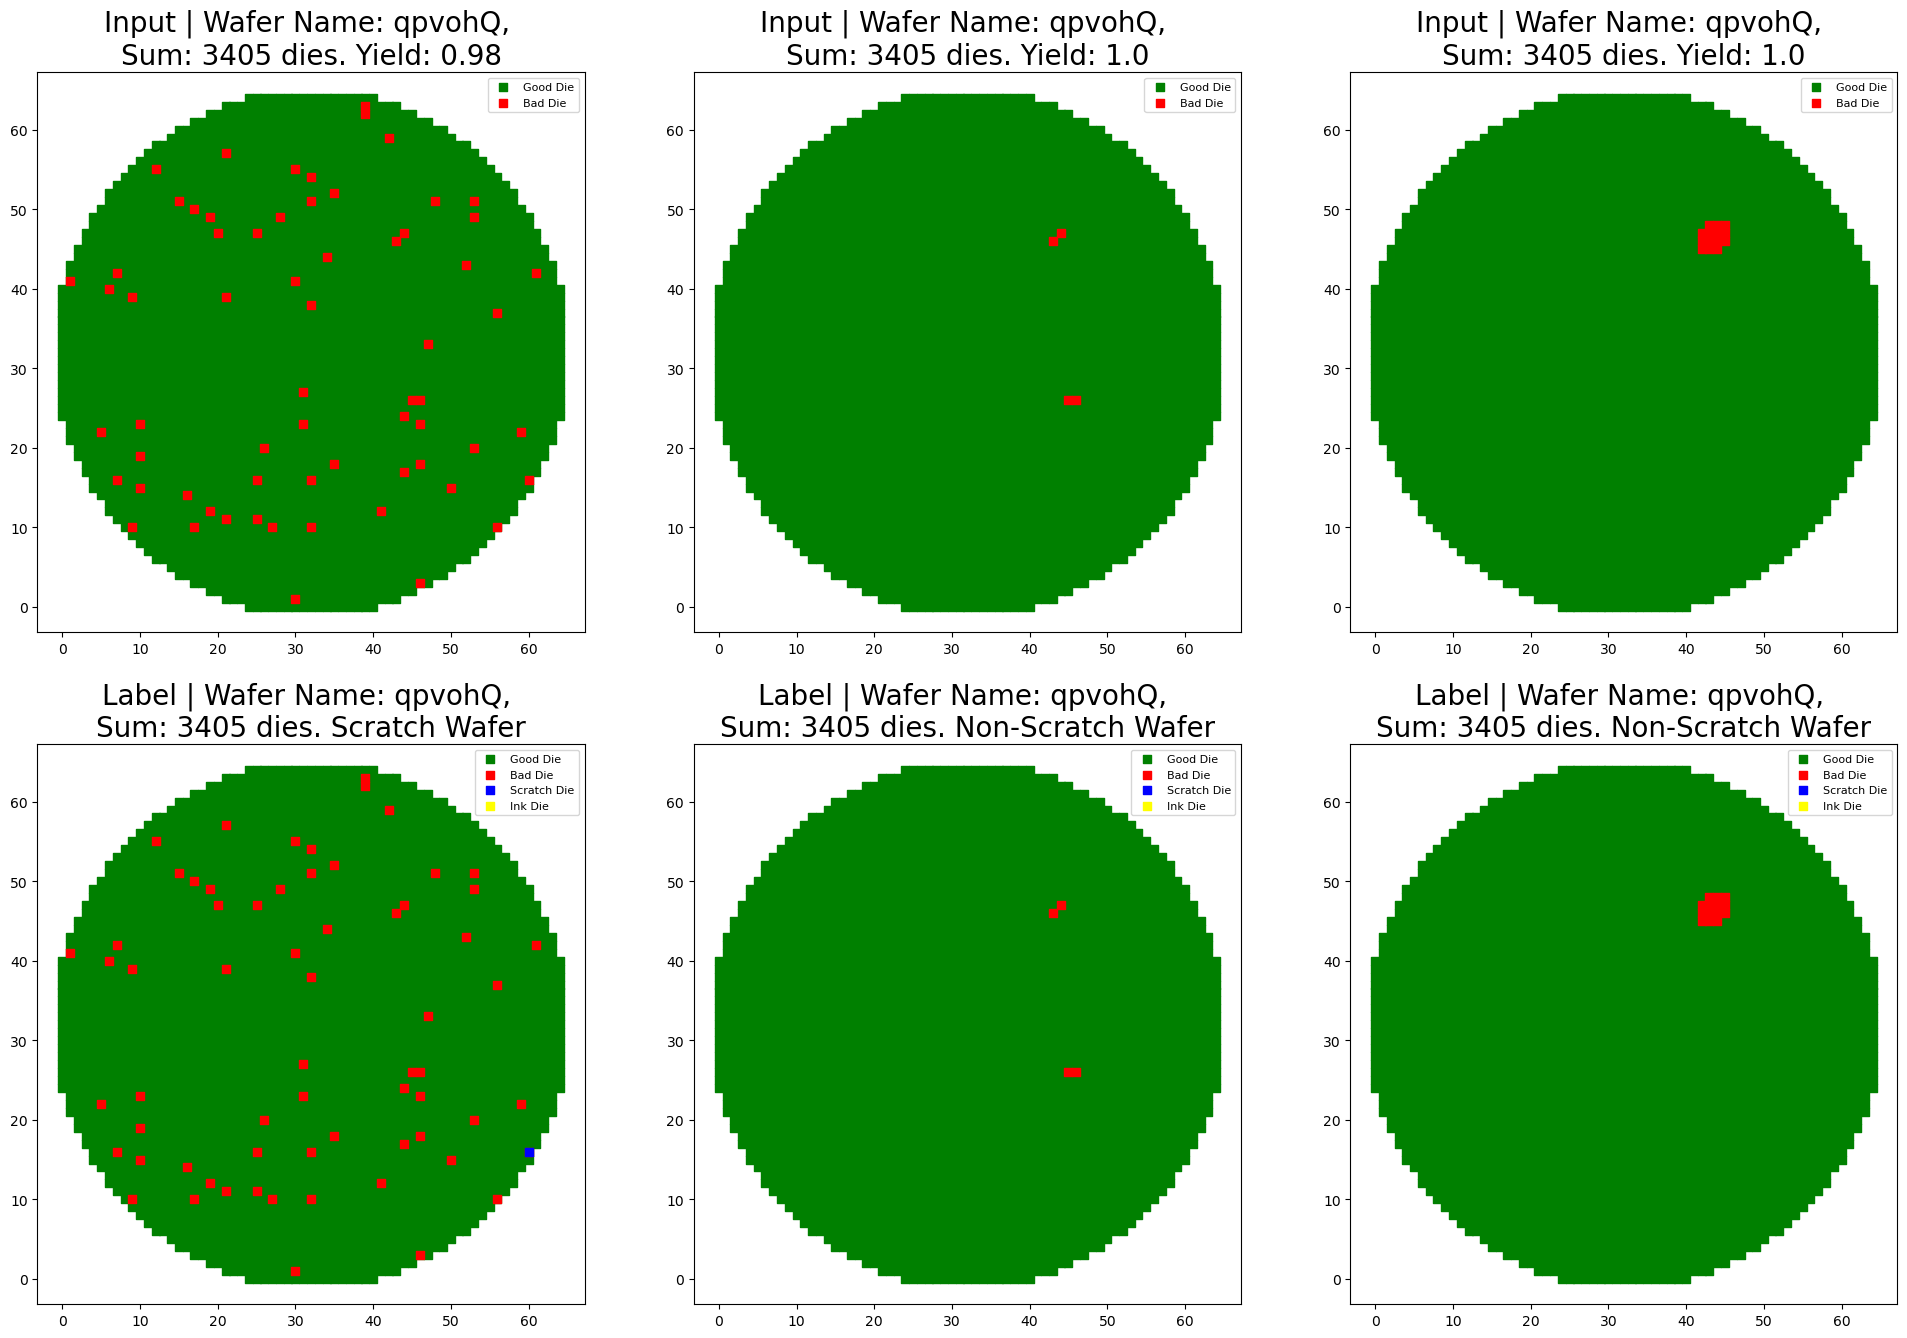

In [485]:
wafer_dil = wafer_with_pred.copy()
wafer_dil['IsGoodDie'] = ~wafer_with_pred['InDilatedZone']
plot_wafer_maps([wafer_true, wafer_scratch_results_pred, wafer_dil], figsize=8, labels=True)

In [486]:
wafer_with_pred.rename(columns={'IsScratchDie': 'IsPredictedScratchDie'}, inplace=True)
wafer_scratch_results_pred = wafer_with_pred[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'
]]
wafer_scratch_results_pred.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'], dtype='object')

[[3404    0]
 [   1    0]]
Accuracy: 0.9997063142437592
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


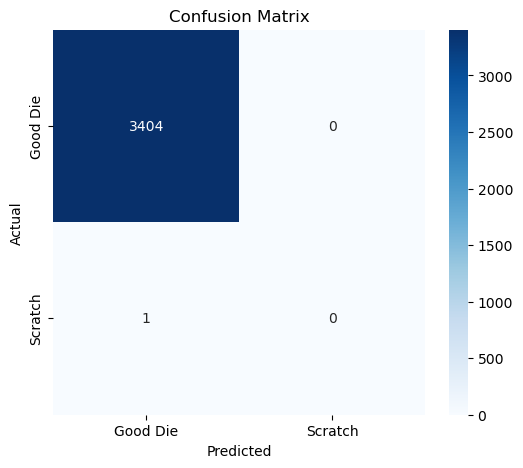

In [487]:
y_true = wafer_true['IsScratchDie'].values  # Actual ground truth labels
y_pred = wafer_scratch_results_pred['IsPredictedScratchDie'].values  # Predicted labels

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

cm = confusion_matrix(y_true, y_pred)
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good Die", "Scratch"], yticklabels=["Good Die", "Scratch"])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [421]:
# Save to CSV
wafer_scratch_results_pred.to_csv('wafer_scratch_predictions_cleaned_pred.csv', index=False)
wafer_scratch_results_pred.columns

Index(['WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'], dtype='object')

<h1 style="font-size: 20px; color: black;"> finish valuation</h1>

In [29]:
# count number of dies each wafer 
die_counts = df_wafers.groupby('WaferName').size().sort_values()
die_counts_df = die_counts.reset_index(name='DieCount')
print(die_counts_df)
#print(die_counts_df[die_counts_df['DieCount'] > 2000])



     WaferName  DieCount
0       UaUbeB      1005
1       fuA75q      1005
2       C3cqov      1005
3       C6HV2N      1005
4       fZmU4t      1005
...        ...       ...
4195    rHkc9I      4049
4196    aeHoh7      4049
4197    rMBvYZ      4049
4198    auMX4n      4049
4199    G35U7t      4049

[4200 rows x 2 columns]


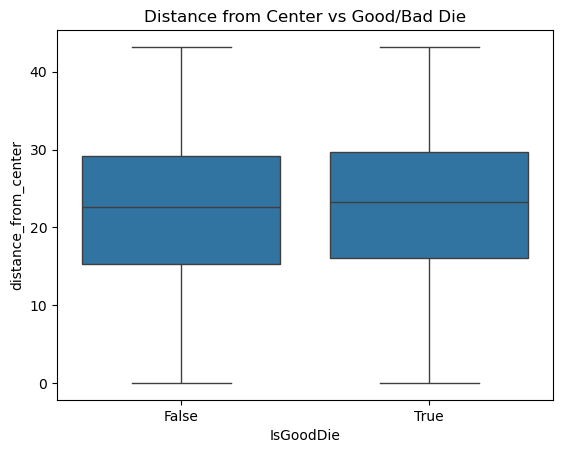

In [30]:
#Correlation Between Location & Defects


df_wafers['distance_from_center'] = np.sqrt(
    (df_wafers['DieX'] - center_x)**2 + (df_wafers['DieY'] - center_y)**2
)

sns.boxplot(x='IsGoodDie', y='distance_from_center', data=df_wafers)
plt.title("Distance from Center vs Good/Bad Die")
plt.show()


In [36]:
# Scratch Pattern
scratch_counts = df_wafers[df_wafers['IsScratchDie'] == True]['WaferName'].value_counts()
scratch_counts_df = scratch_counts.reset_index(name='DiesWithinScartches')

print(scratch_counts_df.tail(10))


     WaferName  DiesWithinScartches
4063    BqUG6w                    1
4064    YXKhnY                    1
4065    6XXse5                    1
4066    1e4FsC                    1
4067    dq1syW                    1
4068    zD1NbX                    1
4069    qWW4FR                    1
4070    ZQe3UU                    1
4071    7TwpOo                    1
4072    gKjjYW                    1


# Build your solution

<h1 style="font-size: 50px; color: black;"> Image Processing and RANSAC-Based Pattern Approach</h1>

<h1 style="font-size: 50px; color: black;"> train set pipline</h1>

<h1 style="font-size: 30px; color: black;"> run this to get metrics of prediction based on train set</h1>

In [1]:
#TODO build your solution
import os
import json
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy.ndimage import convolve, binary_dilation, label
from sklearn.linear_model import RANSACRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
def my_plot_wafer_maps(wafer_df_list, figsize, labels=True, save_path=None):
    """
    Plot wafer maps for list of wafer dataframes.

    :param wafer_df_list: list of pd.DataFrame, each representing a wafer.
    :param figsize: int, size for figure scaling.
    :param labels: bool, whether to show labels like scratches/inks.
    :param save_path: str or None, path to save the figure if provided.
    """
    def my_plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17 / wafer_size
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum() > 0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum() / (wafer_df['IsGoodDie']).count(), 2))
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color='green', marker='s', s=s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color='red', marker='s', s=s)

        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color='blue', marker='s', s=s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color='yellow', marker='s', s=s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

    import numpy as np
    import matplotlib.pyplot as plt

    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                my_plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            my_plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()


In [3]:
zf = zipfile.ZipFile('data.zip') 
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))


In [ ]:


# Get list of wafers
wafer_list = df_wafers['WaferName'].unique()[:]  # Pick first 10 wafers
print(f"Processing wafers: {wafer_list}")
print(f"Processing {len(wafer_list)} wafers")

# filter wafers with low yield
yield_per_wafer_pred = df_wafers.groupby('WaferName').agg(
    total_dies=('IsGoodDie', 'count'),
    good_dies=('IsGoodDie', 'sum')
)

yield_per_wafer_pred['yield'] = yield_per_wafer_pred['good_dies'] / yield_per_wafer_pred['total_dies']

# Identify bad yield wafers
threshold = 0.7  # or whatever threshold you want
bad_wafer_names_pred = yield_per_wafer_pred[yield_per_wafer_pred['yield'] < threshold].index.tolist()

print(f"\nWafers with yield below {threshold*100}%: {bad_wafer_names_pred}")

i = 1
# Create output directory
os.makedirs('wafer_outputs_train_set', exist_ok=True)

# Store all metrics
all_metrics = {}

# ---------- Main Pipeline ----------
for wafer_name in wafer_list:
    print(f"Processing wafer {i}: {wafer_name}")
    i+= 1
    if wafer_name in bad_wafer_names_pred:
        print(f"Skipping wafer {wafer_name} due to low yield")
        continue  # Skip this wafer
        
    # Make wafer folder
    wafer_folder = f'wafer_outputs_train_set/{wafer_name}'
    os.makedirs(wafer_folder, exist_ok=True)

    # 1. Prepare Data
    wafer_train = df_wafers[df_wafers['WaferName'] == wafer_name].copy()
    wafer_true = wafer_train.copy()
    wafer_for_pred = wafer_train.drop(columns=['IsScratchDie'])
    
    # 2. Basic prediction setup
    center_x = wafer_for_pred['DieX'].mean()
    center_y = wafer_for_pred['DieY'].mean()
    wafer_for_pred['distance_from_center'] = np.sqrt((wafer_for_pred['DieX'] - center_x)**2 + (wafer_for_pred['DieY'] - center_y)**2)
    radius_threshold = 0.94
    edge_mask_pred = (
        (wafer_for_pred['IsGoodDie'] == False) &
        (wafer_for_pred['distance_from_center'] >= wafer_for_pred['distance_from_center'].max() * radius_threshold)
    )
    wafer_for_pred.loc[edge_mask_pred, 'IsGoodDie'] = True

    wafer_df_pred = wafer_for_pred.copy()


    # 3. Clean isolated bad dies
    max_x = wafer_df_pred['DieX'].max()
    max_y = wafer_df_pred['DieY'].max()
    bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)
    

    
    for _, row in wafer_df_pred.iterrows():
        if not row['IsGoodDie']:
            bad_die_grid[row['DieY'], row['DieX']] = True


    neighbor_kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)
    isolated_red = (bad_die_grid == True) & (neighbor_count == 0)
    cleaned_grid_pred = bad_die_grid.copy()
    cleaned_grid_pred[isolated_red] = False


    wafer_df_pred['IsGoodDie_Cleaned'] = wafer_df_pred.apply(
    lambda row: False if cleaned_grid_pred[row['DieY'], row['DieX']] else True,
    axis=1
    )
    
    
    wafer_original_pred = wafer_df_pred.copy()

    # New wafer using cleaned 'IsGoodDie'
    wafer_cleaned_pred = wafer_df_pred.copy()
    wafer_cleaned_pred['IsGoodDie'] = wafer_cleaned_pred['IsGoodDie_Cleaned']

    
    # 4. Dilation and biggest cluster
    dilated_bad_dies = binary_dilation(cleaned_grid_pred, structure=np.ones((3,3)))  

    # First, make sure you assign the dilation result to the dataframe:
    wafer_df_pred['IsGoodDie_Dilated'] = wafer_df_pred.apply(
        lambda row: False if dilated_bad_dies[row['DieY'], row['DieX']] else True,
        axis=1
    )

    # Create dilated_bad_dies grid
    wafer_width = wafer_df_pred['DieX'].max() + 1
    wafer_height = wafer_df_pred['DieY'].max() + 1

    dilated_bad_dies = np.zeros((wafer_height, wafer_width), dtype=bool)
    bad_dies = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
    dilated_bad_dies[bad_dies['DieY'], bad_dies['DieX']] = True

    # Label clusters
    structure = np.ones((3, 3), dtype=bool)  # 8-connectivity
    labeled_array, num_features = label(dilated_bad_dies, structure=structure)

    # Find largest cluster
    sizes = np.bincount(labeled_array.ravel())
    sizes[0] = 0  # Background
    largest_label = sizes.argmax()

    # Create masks for plotting
    largest_cluster_mask = (labeled_array == largest_label)
    good_dies_mask = ~dilated_bad_dies


    # 5. RANSAC scratch line fitting
    bad_dies_pred = np.column_stack(np.where(cleaned_grid_pred))
    
    if bad_dies_pred.shape[0] >= 5:
        # Proceed only if at least 3 bad dies exist (RANSAC needs 2 points minimum)
        model = make_pipeline(PolynomialFeatures(degree=1), RANSACRegressor(max_trials=3000, residual_threshold=2))
        X = bad_dies_pred[:, 1].reshape(-1, 1)  # DieX
        y = bad_dies_pred[:, 0]                # DieY
        model.fit(X, y)
    
        # Continue with inlier mask, prediction, etc.
        inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
        scratch_coords = bad_dies_pred[inlier_mask]
    
    else:
        print(f"No scratch candidates (bad dies) found on wafer {wafer_name}. Skipping.")
        continue
    
    scratch_mask_ransac = np.zeros_like(cleaned_grid_pred, dtype=bool)
    for y, x in scratch_coords:
        scratch_mask_ransac[y, x] = True

    wafer_df_pred = wafer_cleaned_pred.copy()
    # Add to DataFrame
    wafer_df_pred['IsPredictedScratch_RANSAC'] = wafer_df_pred.apply(
        lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
        axis=1
    )

    # Ensure that only the largest red cluster is considered
    wafer_df_pred['InDilatedZone'] = wafer_df_pred.apply(
        lambda row: largest_cluster_mask[row['DieY'], row['DieX']],
        axis=1
    )
     # 6. Residual thresholding for local dies
    # Predict all dies along the curve
    x_inliers = bad_dies_pred[inlier_mask][:, 1]  # DieX values
    min_x_ransac = x_inliers.min()
    max_x_ransac = x_inliers.max()

    # Get good dies in range of RANSAC + add k dies to the scratch at the edges [ min_x_ransac-k ,max_x_ransac+k]
    good_dies_in_range = wafer_df_pred[
        (wafer_df_pred['IsGoodDie_Cleaned']) &
        (wafer_df_pred['DieX'] >= min_x_ransac-5) &
        (wafer_df_pred['DieX'] <= max_x_ransac+5)
    ].copy()

    # Predict curve y-values for these good dies
    X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
    y_actual = good_dies_in_range['DieY'].values
    y_pred = model.predict(X_good)

    # Calculate how close each die is to the predicted curve
    residuals = np.abs(y_actual - y_pred)
    residual_threshold = 1.5  # Try 0.3 or 0.5 to tighten or loosen
    good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold

    # Drop existing prediction column if it's already there (from a previous run)
    if 'IsPredictedScratch_Local' in wafer_df_pred.columns:
        wafer_df_pred.drop(columns=['IsPredictedScratch_Local'], inplace=True)

    # Then proceed with the merge safely
    wafer_df_pred = wafer_df_pred.merge(
        good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
        on=['DieX', 'DieY'],
        how='left'
    )
    wafer_df_pred['IsPredictedScratch_Local'].fillna(False, inplace=True)

    wafer_local_ransac_pred = wafer_cleaned_pred.copy()

    all_dies_in_range_pred = wafer_df_pred[
        (wafer_df_pred['DieX'] >= min_x_ransac-5) &
        (wafer_df_pred['DieX'] <= max_x_ransac +5)
    ].copy()

    X_all = all_dies_in_range_pred['DieX'].values.reshape(-1, 1)
    y_all_actual = all_dies_in_range_pred['DieY'].values
    y_all_pred = model.predict(X_all)

    # Residual thresholding
    residuals_all = np.abs(y_all_actual - y_all_pred)

    # create mask to expend biggest bad cluser so we dont miss dies in the edges of scratch
    cluster_mask = np.zeros((wafer_df_pred['DieY'].max()+2, wafer_df_pred['DieX'].max()+2), dtype=bool)
    cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']] = wafer_df_pred['InDilatedZone']

    # Dilate it (grow 1 die around)
    structure = np.ones((3, 3), dtype=bool)  # 3x3 = expand one step
    expanded_cluster_mask = binary_dilation(cluster_mask, structure=structure)
    expanded_cluster_mask = binary_dilation(expanded_cluster_mask, structure=structure)

    # Check if each die is inside expanded cluster
    is_near_big_cluster = expanded_cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']]

    all_dies_in_range_pred['IsOnScratchLine'] = (
        (residuals_all < residual_threshold) &
        (is_near_big_cluster[all_dies_in_range_pred.index])
    )

    
    
    wafer_with_pred = wafer_df_pred.copy()

    # Merge IsOnScratchLine info into the full test set
    wafer_with_pred = wafer_with_pred.merge(
        all_dies_in_range_pred[['DieX', 'DieY', 'IsOnScratchLine']],
        on=['DieX', 'DieY'],
        how='left'
    )

    # Fill NaN with False for dies not on the scratch line
    wafer_with_pred['IsOnScratchLine'].fillna(False, inplace=True)

    # Rename column to something clearer
    wafer_with_pred.rename(columns={'IsOnScratchLine': 'IsScratchDie'}, inplace=True)

   

    wafer_scratch_results_pred = wafer_with_pred[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'
    ]]
    
    wafer_dil = wafer_with_pred.copy()
    wafer_dil['IsGoodDie'] = ~wafer_with_pred['InDilatedZone']
    
    # save images
    my_plot_wafer_maps(
        [wafer_true, wafer_scratch_results_pred, wafer_dil],
        figsize=6,
        labels=True,
        save_path=f'{wafer_folder}/wafer_map.png'
    )
    
    
    # 7. Evaluation
    wafer_with_pred.rename(columns={'IsScratchDie': 'IsPredictedScratchDie'}, inplace=True)
    
    wafer_scratch_results_pred = wafer_with_pred[[
        'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'
    ]]
    
    y_true = wafer_true['IsScratchDie'].values  # Actual ground truth labels
    y_pred = wafer_scratch_results_pred['IsPredictedScratchDie'].values  # Predicted labels

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    cm = confusion_matrix(y_true, y_pred)
    # Save metrics
    all_metrics[wafer_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # 8. Save wafer plots
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good Die", "Scratch"], yticklabels=["Good Die", "Scratch"])
    plt.title(f'Confusion Matrix - {wafer_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'{wafer_folder}/confusion_matrix.png')
    plt.close()

    # You could also call plot_wafer_maps() or plot_custom_scratch_map_pred()
    # Save wafer map if needed
    # plot_custom_scratch_map_pred(wafer_with_pred) + save figure
    # (You already have plot_custom_scratch_map_pred)

    # Save predictions to CSV
    wafer_scratch_results_pred.to_csv(f'{wafer_folder}/predictions.csv', index=False)
    plt.close('all')   # Closes all figures
    gc.collect()       # Forces garbage collection

# ---------- Save all metrics ----------
with open('wafer_outputs_train_set/wafer_metrics.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

# Initialize variables to calculate averages
total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1 = 0
num_wafer_files = 0

# Iterate through the collected metrics (stored in all_metrics)
for wafer_name, metrics in all_metrics.items():
    # Check if wafer has low yield or no scratches
    # Skip wafers with low yield or no scratches
    if wafer_name in bad_wafer_names_pred or metrics['recall'] == 0 or metrics['precision'] == 0:
        continue  # Skip this wafer as it's not useful for averaging

    total_accuracy += metrics['accuracy']
    total_precision += metrics['precision']
    total_recall += metrics['recall']
    total_f1 += metrics['f1_score']
    num_wafer_files += 1

# Calculate the averages
if num_wafer_files > 0:
    avg_accuracy = total_accuracy / num_wafer_files
    avg_precision = total_precision / num_wafer_files
    avg_recall = total_recall / num_wafer_files
    avg_f1 = total_f1 / num_wafer_files
    
    print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")
    
    # Prepare dictionary with averages
    averages = {
        'average_accuracy': avg_accuracy,
        'average_precision': avg_precision,
        'average_recall': avg_recall,
        'average_f1_score': avg_f1
    }
    
    # Save the averages to a JSON file
    with open('wafer_outputs_train_set/average_metrics.json', 'w') as f:
        json.dump(averages, f, indent=4)

else:
    print("No wafers processed or no results found.")
    
print("Pipeline completed. Outputs saved in 'wafer_outputs_train_set/' folder.")

Processing wafers: ['8PFrAN' 'X35KWx' 'hpKllm' ... 'FU3iOz' 'UPIDKa' 'CofPVD']
Processing 4200 wafers

Wafers with yield below 70.0%: []
Processing wafer 1: 8PFrAN
Processing wafer 2: X35KWx
Processing wafer 3: hpKllm
Processing wafer 4: gwjgvf
No scratch candidates (bad dies) found on wafer gwjgvf. Skipping.
Processing wafer 5: EAmFHC
Processing wafer 6: xHMg06
Processing wafer 7: U6YFFh
Processing wafer 8: ih2CbI
Processing wafer 9: GHlqOp
Processing wafer 10: oF6oN1
Processing wafer 11: dXjYqm
Processing wafer 12: vuYAxE
Processing wafer 13: JXy6ur
Processing wafer 14: oJJWk4
Processing wafer 15: 27jJvL
Processing wafer 16: l7n46l


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 17: LtGS0N
Processing wafer 18: EaC79F
Processing wafer 19: SiPPbo
Processing wafer 20: anpwRT
No scratch candidates (bad dies) found on wafer anpwRT. Skipping.
Processing wafer 21: y9tKHj
Processing wafer 22: jNSNSN
No scratch candidates (bad dies) found on wafer jNSNSN. Skipping.
Processing wafer 23: UpdgZR
Processing wafer 24: x5emnH


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 25: VChyJL
Processing wafer 26: QLTgHn
Processing wafer 27: fHmbu6
Processing wafer 28: NPOXim
Processing wafer 29: IhkAx7
Processing wafer 30: cXx0Me
Processing wafer 31: opKvR2


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 32: SYrUp2
Processing wafer 33: lFL7CI
Processing wafer 34: rHkc9I
Processing wafer 35: wvu5VK
Processing wafer 36: JlxwjD
Processing wafer 37: aqPB5H
Processing wafer 38: 0lsAYQ
Processing wafer 39: Hc40fa
Processing wafer 40: 5ANCVA
Processing wafer 41: b9DG7u


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 42: yrg3GH
No scratch candidates (bad dies) found on wafer yrg3GH. Skipping.
Processing wafer 43: 7sACE9
Processing wafer 44: 44pjTk
Processing wafer 45: eVj5rp
Processing wafer 46: 1XHrDt
Processing wafer 47: TjVK98
Processing wafer 48: ef1Ztr
Processing wafer 49: 0TdiMn
Processing wafer 50: gpbHWT
Processing wafer 51: xNWmgg


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 52: PBA5ly
Processing wafer 53: XO66oU
Processing wafer 54: i07aqx
Processing wafer 55: 5q7vd3
Processing wafer 56: eCicvZ
Processing wafer 57: 6biFn6
Processing wafer 58: YwACva
Processing wafer 59: 0wsJGL
Processing wafer 60: vR2QRJ
Processing wafer 61: SHgE1K
Processing wafer 62: w4ycA3
Processing wafer 63: W1ke1K
Processing wafer 64: 9eGsim
Processing wafer 65: y8UGyX


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 66: oQP2EU
Processing wafer 67: EjexY7
Processing wafer 68: hUDhi9
Processing wafer 69: Y0ddoS
Processing wafer 70: DxOr5p
Processing wafer 71: CCwmDW
Processing wafer 72: RUyueV
Processing wafer 73: YUCjjp
Processing wafer 74: 8lDKGR
Processing wafer 75: PbhcX1
Processing wafer 76: MVJ1Qa
Processing wafer 77: 7b7WQi
Processing wafer 78: bWWURv
Processing wafer 79: czTTKN
No scratch candidates (bad dies) found on wafer czTTKN. Skipping.
Processing wafer 80: UO7nHy
Processing wafer 81: 4RLb7I
Processing wafer 82: Ro6Cjk
Processing wafer 83: fzsAar
Processing wafer 84: P9eNXG
Processing wafer 85: 4Qc3He


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 86: YGaW4d
Processing wafer 87: 6qbiCk
Processing wafer 88: qpvohQ
No scratch candidates (bad dies) found on wafer qpvohQ. Skipping.
Processing wafer 89: recgUW
Processing wafer 90: sQl8iS
Processing wafer 91: CAo8Pp
Processing wafer 92: KycfUv
Processing wafer 93: gJ8UIB
Processing wafer 94: f2zPFL
Processing wafer 95: BP8fAa
Processing wafer 96: s2UBXR
Processing wafer 97: 1h3QPx
Processing wafer 98: 9F30qx
Processing wafer 99: l8qyNe
Processing wafer 100: oNTCjr
Processing wafer 101: iVTWyn
Processing wafer 102: LOFcUj
Processing wafer 103: 1bOH0d
Processing wafer 104: QWox05
Processing wafer 105: OHtRmv
Processing wafer 106: RJqjsr
Processing wafer 107: zRb51O
Processing wafer 108: R0zezd
Processing wafer 109: c5QMUs
Processing wafer 110: 5SZC37
Processing wafer 111: zNXbo3
Processing wafer 112: RWdqMG
Processing wafer 113: dczEyX
Processing wafer 114: 85da01
Processing wafer 115: vE8WGI


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 116: CBGZxH
Processing wafer 117: NWjMHJ
Processing wafer 118: V6R0by
Processing wafer 119: JMsDTf
Processing wafer 120: vLKt8H
Processing wafer 121: i4EABb
Processing wafer 122: iDVYhj
Processing wafer 123: xau4wc
Processing wafer 124: az7Pbb
Processing wafer 125: HalyoF
Processing wafer 126: Hx6UlU


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 127: d8alQd
Processing wafer 128: J6I7xw


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 129: ESEQ09
Processing wafer 130: hyEmDs
Processing wafer 131: gQJejy
Processing wafer 132: PZejXh
Processing wafer 133: t5qFkB
Processing wafer 134: g6El7Q
Processing wafer 135: phA6DF
Processing wafer 136: rUFgDH
No scratch candidates (bad dies) found on wafer rUFgDH. Skipping.
Processing wafer 137: 5dUMJu
Processing wafer 138: 0q7T2o
Processing wafer 139: uxFGVs
Processing wafer 140: hAeAk6
Processing wafer 141: YW2j3c
Processing wafer 142: lXYpqX


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 143: 7lzPKf
No scratch candidates (bad dies) found on wafer 7lzPKf. Skipping.
Processing wafer 144: eg5YrZ
Processing wafer 145: gSsBoo
Processing wafer 146: WJvVu8
Processing wafer 147: R61KaD
Processing wafer 148: VxjZjD


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 149: ePwx38


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 150: ikZAAt
Processing wafer 151: SlGk2E
Processing wafer 152: yreCqm
Processing wafer 153: TNEn7r
Processing wafer 154: kzTzFL
Processing wafer 155: 4nOZLa
Processing wafer 156: NW8gxG
Processing wafer 157: 2FOdX9
Processing wafer 158: GKZyYV
Processing wafer 159: fIalQh
Processing wafer 160: UZsk8u
Processing wafer 161: LBOsbT
No scratch candidates (bad dies) found on wafer LBOsbT. Skipping.
Processing wafer 162: KkKWwe
Processing wafer 163: 8B6fLG
Processing wafer 164: vxCs2y
Processing wafer 165: 7HYfYU
Processing wafer 166: paiQun


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 167: OF17gU
Processing wafer 168: RUax2f
Processing wafer 169: aUJQde
Processing wafer 170: 6Y3jZe
Processing wafer 171: J815Z5
Processing wafer 172: T8at5A
Processing wafer 173: DERvhV
Processing wafer 174: X9ZoG5
Processing wafer 175: zJcag1
Processing wafer 176: Zk1jNP
Processing wafer 177: QB1nIu
No scratch candidates (bad dies) found on wafer QB1nIu. Skipping.
Processing wafer 178: fScwcB
Processing wafer 179: ZAsemj
Processing wafer 180: tQjM4F
Processing wafer 181: 8NMIoa
Processing wafer 182: lZqCdB
Processing wafer 183: uPK2Fl
Processing wafer 184: kybgaP
Processing wafer 185: One5gL
Processing wafer 186: Bcvwlv
Processing wafer 187: ErOEFE
Processing wafer 188: DNGJLQ
Processing wafer 189: C9WxSK
Processing wafer 190: ePTTQP
Processing wafer 191: vbmXUI
Processing wafer 192: 0jx2ns
Processing wafer 193: 7xI2Am
No scratch candidates (bad dies) found on wafer 7xI2Am. Skipping.
Processing wafer 194: yReYMD
Processing wafer 195: 4reUZR
Processing wafer 196: Um09b

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 202: 8Mq4ce
Processing wafer 203: 6SrpzX


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 204: RsPzi8
Processing wafer 205: MWThd2
Processing wafer 206: pjiKEo
Processing wafer 207: lbltUY
Processing wafer 208: cVIgF2
Processing wafer 209: hQoffl
Processing wafer 210: kaBeHt
Processing wafer 211: sNyWi7
Processing wafer 212: 6toPkF
Processing wafer 213: K3xDdZ
Processing wafer 214: RB5KAT
Processing wafer 215: Rmyz9Q
Processing wafer 216: i6lQ6E
Processing wafer 217: iDmmNo
Processing wafer 218: sA3YPF
Processing wafer 219: xWkMZU
Processing wafer 220: mbHA0l
Processing wafer 221: KOTxEH
Processing wafer 222: 06yPzs


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 223: SL17bS
Processing wafer 224: aSrIN6
Processing wafer 225: bXo7gj
Processing wafer 226: PoohKN
Processing wafer 227: qn8A1x
Processing wafer 228: Ce2Tps
Processing wafer 229: grRP1j
Processing wafer 230: IL1si7
Processing wafer 231: 0o7ZNl
Processing wafer 232: G5WLMW
Processing wafer 233: qBRnF6
Processing wafer 234: cz2LFW
Processing wafer 235: V6jcVf
Processing wafer 236: JRO8od
Processing wafer 237: udLzGN
Processing wafer 238: Br0G7f
Processing wafer 239: TnszTJ
No scratch candidates (bad dies) found on wafer TnszTJ. Skipping.
Processing wafer 240: mT1Acr
Processing wafer 241: 9YhYzY
Processing wafer 242: Gj4H8P
Processing wafer 243: ZWPaoB
Processing wafer 244: wywdqj
Processing wafer 245: Ps5fwu
Processing wafer 246: FR67is
Processing wafer 247: hGRqj2
Processing wafer 248: 8554Pj


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 249: 2fbuZV
Processing wafer 250: xg7qpV
Processing wafer 251: En1ovW


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 252: Ef4vHc
Processing wafer 253: m2RDZ1
Processing wafer 254: RWov4i
Processing wafer 255: RC8gAI
Processing wafer 256: MaK7FP
Processing wafer 257: ZQkfSQ
Processing wafer 258: SZhBx6
Processing wafer 259: X3hkiS
Processing wafer 260: CPsNmr
No scratch candidates (bad dies) found on wafer CPsNmr. Skipping.
Processing wafer 261: c8UHs0
Processing wafer 262: 2a37BX
Processing wafer 263: 0wKP2f
Processing wafer 264: b49oNX
Processing wafer 265: Tz6SKq
Processing wafer 266: EUbMVO
Processing wafer 267: 6GRucx
Processing wafer 268: 30IEia
No scratch candidates (bad dies) found on wafer 30IEia. Skipping.
Processing wafer 269: zHFlbc
Processing wafer 270: zM6f5H
Processing wafer 271: 6Tn8Vp
Processing wafer 272: Z8qFdb
Processing wafer 273: riE9sV


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 274: 14VcBi
Processing wafer 275: jgp4lw


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 276: Q1ru7s
Processing wafer 277: PjAttf
Processing wafer 278: RgVJUz
Processing wafer 279: cVAWjv
Processing wafer 280: wMJp6Q
Processing wafer 281: t5vJGu
Processing wafer 282: 7fRtl7
Processing wafer 283: Hhw6y5
Processing wafer 284: wCnrxk
Processing wafer 285: dEUUlg
Processing wafer 286: yvfJis
Processing wafer 287: UZRlQd
Processing wafer 288: wOJoOa
No scratch candidates (bad dies) found on wafer wOJoOa. Skipping.
Processing wafer 289: KSRtIS
Processing wafer 290: z5eJ4W
Processing wafer 291: BmbTvn
Processing wafer 292: X3HNP3
Processing wafer 293: ic1L8a
Processing wafer 294: xANc9d
Processing wafer 295: zNHg9A
Processing wafer 296: 06s0Nk
Processing wafer 297: iv1ySs
Processing wafer 298: PS6aik
Processing wafer 299: ZpNYCM
Processing wafer 300: 3XLzdz
Processing wafer 301: X1ESqf
Processing wafer 302: bj050d
Processing wafer 303: RdQwEj
Processing wafer 304: nxXvlR
Processing wafer 305: qWCUra
Processing wafer 306: 21zW8l
Processing wafer 307: 32oGuI
Proces

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 322: 8dO0XU
Processing wafer 323: lCPZFX
No scratch candidates (bad dies) found on wafer lCPZFX. Skipping.
Processing wafer 324: 2iBsrA
Processing wafer 325: tKUpp2
Processing wafer 326: 0qgyWo
Processing wafer 327: DaqR8q
Processing wafer 328: hPA3yb
Processing wafer 329: peeEiP
Processing wafer 330: lBhf1m
No scratch candidates (bad dies) found on wafer lBhf1m. Skipping.
Processing wafer 331: Ykbzga
Processing wafer 332: HW4j3F
Processing wafer 333: Qe4IqD
Processing wafer 334: kdV3sZ
Processing wafer 335: DYynKb
Processing wafer 336: KdSuA8
Processing wafer 337: iyAUD7
Processing wafer 338: WS2r5n
Processing wafer 339: HWBU1r
Processing wafer 340: PqU6MB
Processing wafer 341: RaJUfa
Processing wafer 342: 69dcto
Processing wafer 343: 61TEj9
No scratch candidates (bad dies) found on wafer 61TEj9. Skipping.
Processing wafer 344: NYP1Df
Processing wafer 345: tLuiTx
Processing wafer 346: L2q1jB
Processing wafer 347: XEzhIL
Processing wafer 348: b0MDFX
Processing wafer 34

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 354: yUEi3d
Processing wafer 355: ansZt1
Processing wafer 356: Ur7nFa
Processing wafer 357: xRst8A
Processing wafer 358: Mci6Gz
Processing wafer 359: ButDbm
Processing wafer 360: pksb2a
No scratch candidates (bad dies) found on wafer pksb2a. Skipping.
Processing wafer 361: ssCvkJ
Processing wafer 362: awXDZC
Processing wafer 363: gOYa9o


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 364: njCHjF
Processing wafer 365: uQYngZ
Processing wafer 366: mDG4Kt
Processing wafer 367: ImWto3
Processing wafer 368: FOTSye
Processing wafer 369: sOlfWs
Processing wafer 370: jBhMDY
Processing wafer 371: leB7wH
Processing wafer 372: x7BL67
Processing wafer 373: 91SQXw
Processing wafer 374: pPI7bj


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 375: Rl2fib
Processing wafer 376: zaH8k2
Processing wafer 377: bqDUY2
Processing wafer 378: t7t8fz
Processing wafer 379: AFCOQN
Processing wafer 380: Bu9zZB
Processing wafer 381: rMBvYZ
Processing wafer 382: dkYJ1w
Processing wafer 383: 6CdKfj
Processing wafer 384: al3Gu3
Processing wafer 385: sFqMiP
Processing wafer 386: 3KFyY4
Processing wafer 387: oppHhS
Processing wafer 388: fIv7E8
Processing wafer 389: 4luL3X
Processing wafer 390: eRh5Z0
Processing wafer 391: ieqa1P
Processing wafer 392: zbEhgk
Processing wafer 393: h7k8GR
No scratch candidates (bad dies) found on wafer h7k8GR. Skipping.
Processing wafer 394: dYRBa1
Processing wafer 395: Vw77MW
Processing wafer 396: KjH6Oy
Processing wafer 397: 6BBPt9
Processing wafer 398: ZcNFlB
Processing wafer 399: iVb1SU
Processing wafer 400: MjIEYA
Processing wafer 401: EAxj77
Processing wafer 402: c5xXr2
Processing wafer 403: Krumlz
No scratch candidates (bad dies) found on wafer Krumlz. Skipping.
Processing wafer 404: ESaGc

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 424: 8L41w8
Processing wafer 425: wYsci0
Processing wafer 426: iqVtRd
Processing wafer 427: tTHLZg


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 428: 0RGYQG
Processing wafer 429: Jw9rJs


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 430: W99Ets
Processing wafer 431: YH7jpL
Processing wafer 432: ZWzP4m
Processing wafer 433: Hi1KKP
Processing wafer 434: CwCqsj
Processing wafer 435: TJwgsR
No scratch candidates (bad dies) found on wafer TJwgsR. Skipping.
Processing wafer 436: phXdoD
Processing wafer 437: j3vRWw
Processing wafer 438: feU1OY
Processing wafer 439: ltCD7L
Processing wafer 440: 5n3Ad1
Processing wafer 441: CbAjIL
Processing wafer 442: BjPFIw
Processing wafer 443: 9tRR1B
Processing wafer 444: O3ELSf
Processing wafer 445: lCVJQX
Processing wafer 446: 4QD8R8
Processing wafer 447: tmcXNF
Processing wafer 448: 2JpzdT
Processing wafer 449: ZaLHZT
Processing wafer 450: oLXhd9
Processing wafer 451: TGsgyH
Processing wafer 452: ofHTyo
Processing wafer 453: jdrEMP


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 454: Hdnshh
Processing wafer 455: 5xeFNC
No scratch candidates (bad dies) found on wafer 5xeFNC. Skipping.
Processing wafer 456: 2fSMdm
Processing wafer 457: mlaA3B
Processing wafer 458: EHAbuX
Processing wafer 459: DpTm6E


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 460: nOixIz
Processing wafer 461: NvquiU
Processing wafer 462: MkmM4P
Processing wafer 463: k7Ce5c
Processing wafer 464: RiacBu
Processing wafer 465: OQ3KgE
Processing wafer 466: n9HqwP
Processing wafer 467: lp2shp
Processing wafer 468: T5jyof
Processing wafer 469: bJRsju
Processing wafer 470: jeRIMy
No scratch candidates (bad dies) found on wafer jeRIMy. Skipping.
Processing wafer 471: 9ay1Jn
Processing wafer 472: s4zU5o


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 473: KOLgvv
Processing wafer 474: nwUYok
Processing wafer 475: Bp18vt
Processing wafer 476: DmhnhG
Processing wafer 477: u6zU8S
Processing wafer 478: qiH0Lt
Processing wafer 479: f3P9Pj
Processing wafer 480: aHzDgD
Processing wafer 481: yNAI43
Processing wafer 482: H0ajOK
No scratch candidates (bad dies) found on wafer H0ajOK. Skipping.
Processing wafer 483: SIEhNJ
Processing wafer 484: eH8hBa
Processing wafer 485: LYlREt
Processing wafer 486: q0e0Cq
Processing wafer 487: FRXYhy
Processing wafer 488: Ccx4nJ
Processing wafer 489: BKGJ4p
Processing wafer 490: suJpH6
Processing wafer 491: EE718T
Processing wafer 492: 5Plar8
Processing wafer 493: 0b4Mao
Processing wafer 494: 6KToKG
Processing wafer 495: uZCL2T
Processing wafer 496: OsV9z4
Processing wafer 497: iD1Roh
Processing wafer 498: QfIHVK


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 499: x2xKWS
Processing wafer 500: Jj1bPR
Processing wafer 501: pF7iHe
Processing wafer 502: KCBqt9
Processing wafer 503: cKOwav
Processing wafer 504: OOqN57
Processing wafer 505: L89GO9
Processing wafer 506: uKz9ZQ
Processing wafer 507: okgAXm
Processing wafer 508: lFGlJX
Processing wafer 509: cjn5i5
Processing wafer 510: 5lRUkW
Processing wafer 511: ZTEbnI
Processing wafer 512: yCk9eg
Processing wafer 513: xr59mr
Processing wafer 514: Gh3vTc
No scratch candidates (bad dies) found on wafer Gh3vTc. Skipping.
Processing wafer 515: JdWmRH
Processing wafer 516: 2LteGE


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 517: a7MWOu
Processing wafer 518: dvzwdj
Processing wafer 519: J9xsRh
Processing wafer 520: sOFJUh
Processing wafer 521: 99UdCN
Processing wafer 522: ESf5mP
Processing wafer 523: S9CtyQ
Processing wafer 524: vUGz7V
Processing wafer 525: QidnRn
Processing wafer 526: gKAWsb
Processing wafer 527: bbmoCF
Processing wafer 528: N2I3fx
Processing wafer 529: L3vJFa
Processing wafer 530: vmnc00
Processing wafer 531: MShA0b
Processing wafer 532: F61UEL
Processing wafer 533: DHDjjI
Processing wafer 534: Mc8asE
Processing wafer 535: ftZ7ZM
Processing wafer 536: sl4367
Processing wafer 537: 2Y6woD
Processing wafer 538: FwN4Y7
Processing wafer 539: Il0ctD
Processing wafer 540: vLaIh2
Processing wafer 541: dVMJGh
Processing wafer 542: sYL2j8
Processing wafer 543: qi6eyz
Processing wafer 544: KKhTPC
Processing wafer 545: uCS6mX
Processing wafer 546: 6UTuHz
Processing wafer 547: fLtOik
Processing wafer 548: BAtEjJ


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 549: zFQoVY
Processing wafer 550: 2K1V7P
Processing wafer 551: E56yJH
Processing wafer 552: 4BDRbB
Processing wafer 553: sAzBgb
Processing wafer 554: EYriSf
Processing wafer 555: LyvGh4
Processing wafer 556: OycGMD
Processing wafer 557: 0GBQq4
Processing wafer 558: CRW8G9
Processing wafer 559: sHZHlw
Processing wafer 560: y8MGma
Processing wafer 561: P0UMXB
Processing wafer 562: Skd2xU
Processing wafer 563: lM1fHj
Processing wafer 564: hcAGe4
Processing wafer 565: s9S78Y
Processing wafer 566: LxUpQc
Processing wafer 567: tMhS9z
Processing wafer 568: EeKVSb
Processing wafer 569: J4i6On
Processing wafer 570: LjVUx5
Processing wafer 571: Hkiwod


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 572: CB1u0G
Processing wafer 573: sFUv3N
Processing wafer 574: Np63Ln
Processing wafer 575: BilFll
Processing wafer 576: beiGA1
Processing wafer 577: sMMY9Z
Processing wafer 578: MxS1wp
No scratch candidates (bad dies) found on wafer MxS1wp. Skipping.
Processing wafer 579: iLmLEX
Processing wafer 580: gS7nzB
Processing wafer 581: TC6BdE
Processing wafer 582: bgcu1M
Processing wafer 583: K63zaG
Processing wafer 584: HN7PNr
Processing wafer 585: X2n57q
Processing wafer 586: 6WzGzg
No scratch candidates (bad dies) found on wafer 6WzGzg. Skipping.
Processing wafer 587: xOEGvS
Processing wafer 588: 2sncaY
Processing wafer 589: HBy3ZB
Processing wafer 590: QK7H8b
Processing wafer 591: bzGuA8
Processing wafer 592: lr1jkI
Processing wafer 593: YOMPjP
Processing wafer 594: 9ticCf
Processing wafer 595: ET2t3r
Processing wafer 596: 1VXwKc
Processing wafer 597: g3aX4y
Processing wafer 598: a3kUjq
Processing wafer 599: JUixNa
Processing wafer 600: mPkWAV
Processing wafer 601: cAySv

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 613: Csqnxn
Processing wafer 614: 131V99
Processing wafer 615: yTBVIw
Processing wafer 616: 5m8KdE
Processing wafer 617: WjsaiI
Processing wafer 618: PHvWRi
Processing wafer 619: OVMiRr
Processing wafer 620: iUCZ75
Processing wafer 621: 8VHtZe
Processing wafer 622: Gy1180
Processing wafer 623: Y0aFk0
Processing wafer 624: gZfL8j
Processing wafer 625: aO6Ikd
Processing wafer 626: DcAg2G
Processing wafer 627: z39bkZ
Processing wafer 628: 7GuvXD
Processing wafer 629: caKTnw
Processing wafer 630: 8zYuRc
Processing wafer 631: AvcoSI


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 632: mu3U5m


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 633: X0TaTp
Processing wafer 634: x5zKk2
Processing wafer 635: vBTZRd
Processing wafer 636: lVReUM
Processing wafer 637: Qb1mxw
Processing wafer 638: qRLcuu
Processing wafer 639: kY1hnW
Processing wafer 640: Ol7Inq
Processing wafer 641: BuGlse
Processing wafer 642: 4NR42G
Processing wafer 643: uw35r5
Processing wafer 644: Mm1Zwj
Processing wafer 645: vuiuPo
Processing wafer 646: cR2C3d
Processing wafer 647: yUlqeY
Processing wafer 648: IvwNEo
Processing wafer 649: tCqbxB


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 650: Q0PCJf
Processing wafer 651: 76XOtS
Processing wafer 652: Iei7sM
Processing wafer 653: PcXZT0
Processing wafer 654: IJrLhy
Processing wafer 655: unZAYn
Processing wafer 656: ALZypq


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 657: ySlAjc
Processing wafer 658: WKBv7A
Processing wafer 659: y9tU7T
Processing wafer 660: wuWrHc


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 661: YqgVW8


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 662: T1PMRl
Processing wafer 663: JnkIqP
Processing wafer 664: UEsRNN
Processing wafer 665: 1YK2rc
Processing wafer 666: g4g0lY
Processing wafer 667: VVqBCL
Processing wafer 668: 8fy8xy
Processing wafer 669: 236tuD
Processing wafer 670: Lvyl7v
Processing wafer 671: 1PGx3f
Processing wafer 672: 8csEw8
Processing wafer 673: USKqWg
Processing wafer 674: DfPpus
Processing wafer 675: PApY79
No scratch candidates (bad dies) found on wafer PApY79. Skipping.
Processing wafer 676: XRxjYJ
Processing wafer 677: ZI16e6
Processing wafer 678: oivgBL
Processing wafer 679: NS8La6


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 680: dXZt0b
No scratch candidates (bad dies) found on wafer dXZt0b. Skipping.
Processing wafer 681: G5MNnn
Processing wafer 682: CjFm8A
Processing wafer 683: d0HQBE
Processing wafer 684: J97B67


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 685: la81BF
Processing wafer 686: xC13Wp
Processing wafer 687: rL78Vz
Processing wafer 688: AkLI8c
Processing wafer 689: W8qAjp
No scratch candidates (bad dies) found on wafer W8qAjp. Skipping.
Processing wafer 690: pz7Av8


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 691: 5gbZnj
Processing wafer 692: 3N2G43
Processing wafer 693: MwwkkC
Processing wafer 694: FUbNpy
Processing wafer 695: oSEF1x
Processing wafer 696: ZCU9SY
Processing wafer 697: nivwFd
Processing wafer 698: TBQ1CI
Processing wafer 699: piOitM


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 700: xK2PzM
Processing wafer 701: EllwNZ
Processing wafer 702: nz9txd
Processing wafer 703: z4uQor
Processing wafer 704: 5WkRL3
Processing wafer 705: y4eRFL


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 706: YKaez4
Processing wafer 707: IQ5kXs
Processing wafer 708: BYP254
Processing wafer 709: bLQW9w
Processing wafer 710: JiOjKD
Processing wafer 711: IRyEe7
Processing wafer 712: vcwSjx
Processing wafer 713: hVdkg1
Processing wafer 714: ePtDOq
Processing wafer 715: 3SC8Nj
Processing wafer 716: MPXDWU
Processing wafer 717: 488d9u
Processing wafer 718: G71yMq
Processing wafer 719: EQ4jKB
Processing wafer 720: k1wivM
Processing wafer 721: kahS7l
No scratch candidates (bad dies) found on wafer kahS7l. Skipping.
Processing wafer 722: Hd5PGA
Processing wafer 723: 68c9Im


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 724: 5wG8hg


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 725: MS73bj
Processing wafer 726: vYT1PE
Processing wafer 727: 3aRUb0
Processing wafer 728: 5Rxmi6
No scratch candidates (bad dies) found on wafer 5Rxmi6. Skipping.
Processing wafer 729: xPHAKj
Processing wafer 730: AwoWqU
Processing wafer 731: dQLbmD
Processing wafer 732: pfZbMl
Processing wafer 733: cmhNcd
Processing wafer 734: Xl34iC
Processing wafer 735: YeVfQY
No scratch candidates (bad dies) found on wafer YeVfQY. Skipping.
Processing wafer 736: LwY2Xk
Processing wafer 737: iXxOAg
Processing wafer 738: ZVQOze
Processing wafer 739: UuG1Jj
Processing wafer 740: ThVVSY
No scratch candidates (bad dies) found on wafer ThVVSY. Skipping.
Processing wafer 741: RhZ2wx
Processing wafer 742: ZswqD4
Processing wafer 743: HbOqB3
Processing wafer 744: Tfb5Ti
Processing wafer 745: Qn2QVK
Processing wafer 746: UjFT8A


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 747: ZeYO2f
Processing wafer 748: R1g7ca
Processing wafer 749: OilJH3
Processing wafer 750: 9GwV7K
Processing wafer 751: ATxmZe
Processing wafer 752: GRRlrO
Processing wafer 753: At3AP7
Processing wafer 754: bKDqoU
Processing wafer 755: WiJVJc
Processing wafer 756: yQlEbQ
Processing wafer 757: Fg1JtP
Processing wafer 758: TkuOb3
Processing wafer 759: NYDZH8
Processing wafer 760: 9fPMfQ
Processing wafer 761: zIlr6r
Processing wafer 762: 83csQj
Processing wafer 763: dYrwNp
Processing wafer 764: xTUf7z
Processing wafer 765: N6TduT
Processing wafer 766: 5GBtEJ
Processing wafer 767: ZA1pF4
Processing wafer 768: mmAlml
Processing wafer 769: eRajFQ
Processing wafer 770: yH5Wi9
Processing wafer 771: B32txU
Processing wafer 772: uYqPWS
No scratch candidates (bad dies) found on wafer uYqPWS. Skipping.
Processing wafer 773: 0HiO2r
Processing wafer 774: KPo0RS
Processing wafer 775: B4BkRO
Processing wafer 776: GemyK0
Processing wafer 777: 5WyVAQ
Processing wafer 778: dRZ2NH
Proces

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 780: AwdbFE
Processing wafer 781: lJuzAG
Processing wafer 782: imEaCU
Processing wafer 783: 3XbIdR
Processing wafer 784: hEO7SA
Processing wafer 785: Byt6lf
Processing wafer 786: p12hA4
Processing wafer 787: KpKmGl
Processing wafer 788: m70xB5
Processing wafer 789: WdYIUT
Processing wafer 790: NhtjVu
Processing wafer 791: gLL5cI
Processing wafer 792: Lm8c0N
Processing wafer 793: VzqY2W
No scratch candidates (bad dies) found on wafer VzqY2W. Skipping.
Processing wafer 794: gAnw0N
Processing wafer 795: KoZCDZ
Processing wafer 796: PzMSvK
Processing wafer 797: vGfRbC
Processing wafer 798: Q9x2Wl
Processing wafer 799: goZtMW
Processing wafer 800: 4Dtnba
Processing wafer 801: VIgPDQ
Processing wafer 802: zS7lPb
Processing wafer 803: HXH1qz
Processing wafer 804: MnRZVc
No scratch candidates (bad dies) found on wafer MnRZVc. Skipping.
Processing wafer 805: 48RsFM
Processing wafer 806: 8nZJkJ
Processing wafer 807: IHg5e3
Processing wafer 808: tcWg4B
Processing wafer 809: Pjh7N

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 843: FekCYC
Processing wafer 844: UrNes5
Processing wafer 845: DjE18w
Processing wafer 846: sBLklL
Processing wafer 847: 7IuXgO
Processing wafer 848: oJpYUd
Processing wafer 849: 5UTToq
Processing wafer 850: GKmgTc
Processing wafer 851: syKDDf
Processing wafer 852: DJgO6L
Processing wafer 853: XVqRcW
Processing wafer 854: rMdKfL


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 855: UaUbeB
Processing wafer 856: A3VMX4
Processing wafer 857: 3I5Sm1
Processing wafer 858: LRW1XB
Processing wafer 859: etFojk
Processing wafer 860: 2vWaCL
Processing wafer 861: G1ae9L
Processing wafer 862: bilHaC
No scratch candidates (bad dies) found on wafer bilHaC. Skipping.
Processing wafer 863: G1DIEx
Processing wafer 864: kNEqmk
Processing wafer 865: RRw21w
Processing wafer 866: L67nDL
Processing wafer 867: uUY5M9
Processing wafer 868: s7gslw
Processing wafer 869: L6mBrM
Processing wafer 870: iI9kxD
Processing wafer 871: Tcu1N0
Processing wafer 872: uinnQB
Processing wafer 873: 6r23pi
Processing wafer 874: kvqY7r
Processing wafer 875: MREWS3


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 876: zVmKEK
Processing wafer 877: lAbZXi


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 878: aGjrnV
Processing wafer 879: WSjHlb
Processing wafer 880: WfHJpT
Processing wafer 881: ka8Nc9
Processing wafer 882: kZ4MRc
Processing wafer 883: 4mNnUc
Processing wafer 884: bpJek0
Processing wafer 885: 4ddSe3
Processing wafer 886: qw0bkh
Processing wafer 887: DxDOuD
Processing wafer 888: Uc0zl7
Processing wafer 889: UoIGfd
Processing wafer 890: 6fvIKP
Processing wafer 891: 5cNOKh
Processing wafer 892: j4Yaxc
No scratch candidates (bad dies) found on wafer j4Yaxc. Skipping.
Processing wafer 893: KXlLGy
Processing wafer 894: RyaoKh
Processing wafer 895: lOFFhh
Processing wafer 896: vpxGTU
Processing wafer 897: HtHShP
Processing wafer 898: J4jqUV
Processing wafer 899: sspdKj
Processing wafer 900: 5RqxGh
Processing wafer 901: pTPnR6
Processing wafer 902: It4b4Z
Processing wafer 903: lmsqmB
Processing wafer 904: zSjxaT
Processing wafer 905: X7mvtV
Processing wafer 906: 0QcTwn
Processing wafer 907: 2lc5jK
Processing wafer 908: 05OItq
Processing wafer 909: Lbj1n5
Proces

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 946: GX448Z
Processing wafer 947: 1akvSo


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 948: Globu4
Processing wafer 949: MrcYse
No scratch candidates (bad dies) found on wafer MrcYse. Skipping.
Processing wafer 950: tBCOem
Processing wafer 951: ZTvbeG
Processing wafer 952: t9PKcP
Processing wafer 953: 99pa5g
Processing wafer 954: MessZv
Processing wafer 955: iadUqH
Processing wafer 956: A8u7b7


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 957: wV6lul
Processing wafer 958: rWxUkn
Processing wafer 959: lQdtUw


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 960: zdTfsX
Processing wafer 961: vs41Au
Processing wafer 962: ERorTL
Processing wafer 963: DhAeE5
Processing wafer 964: eOLktF
Processing wafer 965: gOsEzA
Processing wafer 966: w5KgtH
Processing wafer 967: C0hXPK
Processing wafer 968: rISjGa
Processing wafer 969: 0MlIpA
Processing wafer 970: TY0B43
Processing wafer 971: djxDyq
Processing wafer 972: JzdMYk
Processing wafer 973: D5rj4W
Processing wafer 974: aEVSuI
Processing wafer 975: O2qNkw
Processing wafer 976: fGgDhy
Processing wafer 977: 2Hzl58
Processing wafer 978: B1qfpt
Processing wafer 979: 8NnNLG
Processing wafer 980: vda49j
Processing wafer 981: wDBtOv
Processing wafer 982: 4r4D8b
Processing wafer 983: WqnACP
Processing wafer 984: FAU1gy
Processing wafer 985: BYsQKO
Processing wafer 986: qY7QCu


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 987: 8ik5rg
Processing wafer 988: 5P2eLP
Processing wafer 989: OFcXPO
Processing wafer 990: LDmXgo
Processing wafer 991: PL9CKW
Processing wafer 992: oSlULm
Processing wafer 993: ZaoYXr
Processing wafer 994: X7as1I
Processing wafer 995: DgHq7M
Processing wafer 996: PsqSVx
Processing wafer 997: hKK3gt
Processing wafer 998: GTqXjH
Processing wafer 999: tuZFl5
Processing wafer 1000: F304ow
Processing wafer 1001: jroHeb
Processing wafer 1002: BosCRl
Processing wafer 1003: TeoA0w
Processing wafer 1004: fUzAGG
Processing wafer 1005: 7i3ff1
Processing wafer 1006: gL5Avu
Processing wafer 1007: zK4OHU
Processing wafer 1008: 3hWaF6
Processing wafer 1009: H9Krae
Processing wafer 1010: WktalV


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1011: ZUpXwU
Processing wafer 1012: NIP36l
Processing wafer 1013: m8bInU
Processing wafer 1014: jiw7Rh
Processing wafer 1015: rvZv9r
Processing wafer 1016: NzFBrA
Processing wafer 1017: naQBZZ
Processing wafer 1018: 99JFVm
Processing wafer 1019: 38pVdh
Processing wafer 1020: OcqEAK
Processing wafer 1021: hcX6Bi
Processing wafer 1022: 5IwIod
Processing wafer 1023: 0o5tNu
Processing wafer 1024: IwPlSl
Processing wafer 1025: KVCUh2
Processing wafer 1026: Hm8lou
Processing wafer 1027: 1iaWAH


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1028: obDxh4
Processing wafer 1029: llNWe7
Processing wafer 1030: PxZKEY
Processing wafer 1031: SCUmtI
Processing wafer 1032: JN1t9Q
Processing wafer 1033: sYK2Jp
Processing wafer 1034: fQwrD3
Processing wafer 1035: cGXYxW
Processing wafer 1036: ASI1tW
Processing wafer 1037: 30Q4FE
No scratch candidates (bad dies) found on wafer 30Q4FE. Skipping.
Processing wafer 1038: yZO4Ff
No scratch candidates (bad dies) found on wafer yZO4Ff. Skipping.
Processing wafer 1039: pYGpTv
Processing wafer 1040: DtC4lo
Processing wafer 1041: 5ULo3e
Processing wafer 1042: hUo7Gv
Processing wafer 1043: ZKOkki
Processing wafer 1044: LOTlUJ
Processing wafer 1045: Br802s
Processing wafer 1046: m64AVp
Processing wafer 1047: CahPvU
Processing wafer 1048: RmMKnA
Processing wafer 1049: FKf5b0
Processing wafer 1050: KsypsM
Processing wafer 1051: m7p2kt
Processing wafer 1052: MaO0Yl
Processing wafer 1053: T1R1EF
Processing wafer 1054: tLAijU
Processing wafer 1055: UOhaHU
No scratch candidates (bad d

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1067: gfd5ub
Processing wafer 1068: VpY8Uy
Processing wafer 1069: bYxOTq
Processing wafer 1070: rPRwur
Processing wafer 1071: 9lklT3
Processing wafer 1072: lQWsdb
No scratch candidates (bad dies) found on wafer lQWsdb. Skipping.
Processing wafer 1073: ZeIT0F
Processing wafer 1074: nCItWc
Processing wafer 1075: XBBYFs
Processing wafer 1076: H1KTcn
Processing wafer 1077: 0CUjW7
Processing wafer 1078: TrESXr
No scratch candidates (bad dies) found on wafer TrESXr. Skipping.
Processing wafer 1079: 8Skq3R
Processing wafer 1080: xYEfmb
Processing wafer 1081: hKyiRr
Processing wafer 1082: dWfLzK


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1083: nitQUu
Processing wafer 1084: EHcodT
Processing wafer 1085: V3YIy6
No scratch candidates (bad dies) found on wafer V3YIy6. Skipping.
Processing wafer 1086: f8fVgY
No scratch candidates (bad dies) found on wafer f8fVgY. Skipping.
Processing wafer 1087: 1gOmdj
Processing wafer 1088: TUO9sp
Processing wafer 1089: 83oDJM
Processing wafer 1090: GZRT6H
Processing wafer 1091: 61Swu3
Processing wafer 1092: H4VkdV
No scratch candidates (bad dies) found on wafer H4VkdV. Skipping.
Processing wafer 1093: xAp9B9


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1094: hrt5Sn
Processing wafer 1095: c5nkqe
Processing wafer 1096: 25eznq
Processing wafer 1097: djwBZD
Processing wafer 1098: ElAwVC
Processing wafer 1099: GNdyeD
Processing wafer 1100: IhvH0B
Processing wafer 1101: WjxukP
Processing wafer 1102: mDumzM
No scratch candidates (bad dies) found on wafer mDumzM. Skipping.
Processing wafer 1103: 3Jvae9
Processing wafer 1104: zNLl52
Processing wafer 1105: Q7q2fF
Processing wafer 1106: TXN4XB
Processing wafer 1107: LZ8Tot
Processing wafer 1108: HTMwKV
Processing wafer 1109: 39NZ8Z
Processing wafer 1110: QdDtqD
Processing wafer 1111: IwTInC
Processing wafer 1112: Ha3TvN
Processing wafer 1113: Xz637U
Processing wafer 1114: Ku8f2c
Processing wafer 1115: VHEzyy
Processing wafer 1116: LrAYcT
Processing wafer 1117: vbFBSa
Processing wafer 1118: SYmwVp


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1119: lF6Ram
Processing wafer 1120: j754IX
No scratch candidates (bad dies) found on wafer j754IX. Skipping.
Processing wafer 1121: xdEGF5
Processing wafer 1122: Rwj07a
No scratch candidates (bad dies) found on wafer Rwj07a. Skipping.
Processing wafer 1123: uxwF8i
Processing wafer 1124: 3xdeLU
Processing wafer 1125: 2alSdF
Processing wafer 1126: FqEC7N
Processing wafer 1127: RpXPrs
Processing wafer 1128: jEWah0
Processing wafer 1129: oniM8J
Processing wafer 1130: tKfupJ
Processing wafer 1131: T9Fzqa
Processing wafer 1132: FrCuuu
Processing wafer 1133: zGF3Im
Processing wafer 1134: cz3g40
Processing wafer 1135: DtxrmL
Processing wafer 1136: dQTuyD
Processing wafer 1137: LNFYVY


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1138: 6wPLOU
Processing wafer 1139: 5AEYIg
Processing wafer 1140: 0fXrBV
Processing wafer 1141: EIBIXK
Processing wafer 1142: HgjwUd
No scratch candidates (bad dies) found on wafer HgjwUd. Skipping.
Processing wafer 1143: mePLU9
Processing wafer 1144: 4NvllH
Processing wafer 1145: wVjWOB
Processing wafer 1146: mPfru7
Processing wafer 1147: 9wL9dt
Processing wafer 1148: K9Aqnp
Processing wafer 1149: rywznR
Processing wafer 1150: p0fR6H
Processing wafer 1151: WFFcVd
Processing wafer 1152: 0UCmuk
Processing wafer 1153: xH0taB
Processing wafer 1154: auG311
Processing wafer 1155: 8DQbUQ
Processing wafer 1156: eNJJt9
Processing wafer 1157: Z8ThjX
Processing wafer 1158: 8hFNXh
Processing wafer 1159: JOX1Dr
Processing wafer 1161: UUICiY
Processing wafer 1162: Rt9L1y
Processing wafer 1163: TPuw7T
Processing wafer 1164: pPOocv
Processing wafer 1165: enfN8X
Processing wafer 1166: 5Wyyyj
Processing wafer 1167: UXJUkS
Processing wafer 1168: dOcsa9
Processing wafer 1169: CnOibJ
Proc

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1173: aPthWs
No scratch candidates (bad dies) found on wafer aPthWs. Skipping.
Processing wafer 1174: 9AguRw
Processing wafer 1175: T1XPGP
Processing wafer 1176: ZDWA97
Processing wafer 1177: 7P71CZ
Processing wafer 1178: 5sqfU2
Processing wafer 1179: 2iALlN
Processing wafer 1180: t8ScRG
Processing wafer 1181: z1mI3P
No scratch candidates (bad dies) found on wafer z1mI3P. Skipping.
Processing wafer 1182: 36w3Jm
Processing wafer 1183: V8DmM6
Processing wafer 1184: quicRu
Processing wafer 1185: h8cfPf
Processing wafer 1186: ZGJrWm
Processing wafer 1187: dyMYP9
Processing wafer 1188: p0TwYi
Processing wafer 1189: C9kSk0
Processing wafer 1190: 88ZIGz
Processing wafer 1191: L6PgaY
Processing wafer 1192: Rf7ezx
Processing wafer 1193: JPlQDl
Processing wafer 1194: VEDDPq
Processing wafer 1195: 07bYYB
Processing wafer 1196: iFZpjW
Processing wafer 1197: prwhMQ
Processing wafer 1199: B0IQ0N
Processing wafer 1200: rDXLfj
Processing wafer 1201: D3iJ1D
Processing wafer 1202: bIkS5

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1238: WNKp3w
Processing wafer 1239: 6U2e4r
Processing wafer 1240: cwPNcu
No scratch candidates (bad dies) found on wafer cwPNcu. Skipping.
Processing wafer 1241: Yvwo4L
No scratch candidates (bad dies) found on wafer Yvwo4L. Skipping.
Processing wafer 1242: Ws9orS
Processing wafer 1243: 061shK
Processing wafer 1244: iMKJ9R
Processing wafer 1245: 3wp7mx
Processing wafer 1246: 9jfCKm
Processing wafer 1247: FPYIxH
No scratch candidates (bad dies) found on wafer FPYIxH. Skipping.
Processing wafer 1248: 9BrmmT
Processing wafer 1249: FRlQHx
Processing wafer 1250: o9esGO
Processing wafer 1251: Gcu4P7
Processing wafer 1252: oSvZ34
Processing wafer 1253: Wi1Jje


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1254: x17YZo
Processing wafer 1255: BWCVy8
Processing wafer 1256: amNT29
Processing wafer 1257: rp9uSo
Processing wafer 1258: V8IgRj
Processing wafer 1259: orVq5O
Processing wafer 1260: aYR9rC
Processing wafer 1261: nGrMK8
Processing wafer 1262: P3hJlQ
Processing wafer 1263: PVm56k
Processing wafer 1264: 1F9j3y
Processing wafer 1265: 84Rb69
No scratch candidates (bad dies) found on wafer 84Rb69. Skipping.
Processing wafer 1266: eELB7f
Processing wafer 1267: FiJLRC
Processing wafer 1268: ritmlf
Processing wafer 1269: CaOXOI
Processing wafer 1270: xbgBTK
No scratch candidates (bad dies) found on wafer xbgBTK. Skipping.
Processing wafer 1271: lwhJgm
Processing wafer 1272: V7LRAC
Processing wafer 1273: gTnE1m
Processing wafer 1274: K2tCs0
Processing wafer 1275: 3x1c1x
Processing wafer 1276: pzHlrt
Processing wafer 1277: nOuPUi
No scratch candidates (bad dies) found on wafer nOuPUi. Skipping.
Processing wafer 1278: gkjiUQ
Processing wafer 1279: a9x2s4
Processing wafer 1280:

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1287: AF4P7R
Processing wafer 1288: W0wOkE
Processing wafer 1289: DZUxmF
Processing wafer 1290: NOEPjD
Processing wafer 1291: FUZnOU
Processing wafer 1292: lAj9Jw
Processing wafer 1293: ob0bz0
Processing wafer 1294: eQY1py
Processing wafer 1295: PPEgbS


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1296: s5cLV0
Processing wafer 1297: 6Sue1W
Processing wafer 1298: 9IPyjm
Processing wafer 1299: h5O6e5
Processing wafer 1300: WRWrNp
Processing wafer 1301: TCq3B9
Processing wafer 1302: 9LazMP
Processing wafer 1303: JFSfSE
Processing wafer 1304: jTCcpY
Processing wafer 1305: fZmU4t
Processing wafer 1306: Tztg5I
Processing wafer 1307: eXxNwY
Processing wafer 1308: j8gS7F
Processing wafer 1309: BMCWtY
Processing wafer 1310: vo8tRG
Processing wafer 1311: wjQOUb
Processing wafer 1312: BiMhIK
Processing wafer 1313: XjsJkM
Processing wafer 1314: iyecaE
Processing wafer 1315: dod7D9


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1316: T81KW2
Processing wafer 1317: X1Nup3
Processing wafer 1318: bRnohs
Processing wafer 1319: ya5fkj
Processing wafer 1320: GEBr6z
Processing wafer 1321: RrmfnF
Processing wafer 1322: PrkDLW
Processing wafer 1323: jkVv2a
Processing wafer 1324: JmTwkx
Processing wafer 1325: 7pP5BE
Processing wafer 1326: Nvd0KA
Processing wafer 1327: aL9dXb
Processing wafer 1328: c0IXdC
Processing wafer 1329: 324Rd0
Processing wafer 1330: bxXdat
Processing wafer 1331: hphPRc
No scratch candidates (bad dies) found on wafer hphPRc. Skipping.
Processing wafer 1332: Rxva59
Processing wafer 1333: sT5owp
Processing wafer 1334: PWSth1
Processing wafer 1335: TBGjcw
Processing wafer 1336: jYVVPG


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1337: VOrR4W
Processing wafer 1338: itVBNm
No scratch candidates (bad dies) found on wafer itVBNm. Skipping.
Processing wafer 1339: 6YM8HF
Processing wafer 1340: HquVTz
Processing wafer 1341: rSCVGu
Processing wafer 1342: b2mMYj
Processing wafer 1343: MXl1z3
No scratch candidates (bad dies) found on wafer MXl1z3. Skipping.
Processing wafer 1344: bsrsBa
Processing wafer 1345: JBbZr1
Processing wafer 1346: wlytZX
Processing wafer 1347: n4QBOO
Processing wafer 1348: Fo57nF
Processing wafer 1349: pwbiZs
Processing wafer 1350: OKJLwR
Processing wafer 1351: yb6tWJ
Processing wafer 1352: o5G9Vd
Processing wafer 1353: M73W2i
No scratch candidates (bad dies) found on wafer M73W2i. Skipping.
Processing wafer 1354: a9moAS
Processing wafer 1355: QUWBXt
Processing wafer 1356: nmpNFz
Processing wafer 1357: C31iN4
Processing wafer 1358: jWN0zj
Processing wafer 1359: Xaw24x
Processing wafer 1360: BN3MiC
Processing wafer 1361: yMOtEV
No scratch candidates (bad dies) found on wafer yMOt

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1363: qpvH7R


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1364: 8yIfCI
Processing wafer 1365: 1SPfmy
Processing wafer 1366: OzMEvC
Processing wafer 1367: 3sU8X5
Processing wafer 1368: hiWH3Q
Processing wafer 1369: pXhixA
Processing wafer 1370: AUDiIl
Processing wafer 1371: hobO4I
Processing wafer 1372: 9UxuRZ
Processing wafer 1373: hH1iin
Processing wafer 1374: K9bPqP
Processing wafer 1375: NehCbd
Processing wafer 1376: HKeeE8
Processing wafer 1377: 60wVQc


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1378: qy5tWC
No scratch candidates (bad dies) found on wafer qy5tWC. Skipping.
Processing wafer 1379: wqv7xh
Processing wafer 1380: qih9C5
Processing wafer 1381: oB54q7
No scratch candidates (bad dies) found on wafer oB54q7. Skipping.
Processing wafer 1382: LT88AZ
Processing wafer 1383: Jkn1tx
No scratch candidates (bad dies) found on wafer Jkn1tx. Skipping.
Processing wafer 1384: TX3De9
Processing wafer 1385: frpRZe
Processing wafer 1386: a3kYT9
Processing wafer 1387: c2v5SY
Processing wafer 1388: kGQFhb


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1389: Z9CqvM
Processing wafer 1390: lqlSP8
Processing wafer 1391: IXJE4p
Processing wafer 1392: CbMacc
Processing wafer 1393: yCp4XG
Processing wafer 1394: hw7W3F
Processing wafer 1395: 3TICf4
Processing wafer 1396: PwSt2A
Processing wafer 1397: 178uPn
Processing wafer 1398: qyW1Js
Processing wafer 1399: vPmBcb
No scratch candidates (bad dies) found on wafer vPmBcb. Skipping.
Processing wafer 1400: 67Wi5v
Processing wafer 1401: lCyzgL
Processing wafer 1402: ncIKUl
Processing wafer 1403: iYzSj6
Processing wafer 1404: wTrz8i
Processing wafer 1405: R5LiWe
Processing wafer 1406: StBTsD
Processing wafer 1407: 3msUsH
Processing wafer 1408: utdNXj
Processing wafer 1409: SNZylR


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1410: su72n5
Processing wafer 1411: 6m8uqI
Processing wafer 1412: QI3zki
Processing wafer 1413: NWFwL2
Processing wafer 1414: Lhxjqx
Processing wafer 1415: qEBD01


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1416: YHLebw
Processing wafer 1417: inIe9M


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1418: dICtxV
Processing wafer 1419: Rnyo5T
Processing wafer 1420: 0FqZXx
Processing wafer 1421: gv9q2I
Processing wafer 1422: NSCWL7
No scratch candidates (bad dies) found on wafer NSCWL7. Skipping.
Processing wafer 1423: qiGawV
No scratch candidates (bad dies) found on wafer qiGawV. Skipping.
Processing wafer 1424: 7ghKRt
Processing wafer 1425: MNr40f
Processing wafer 1426: 9i7gOL
Processing wafer 1427: ya98kO
Processing wafer 1428: Irugt2
Processing wafer 1429: NPRvzk
Processing wafer 1430: Hdu1q5
Processing wafer 1431: YCffzz
Processing wafer 1432: 6Wshju
Processing wafer 1433: dlIMUv
Processing wafer 1434: Rd3ZAL
No scratch candidates (bad dies) found on wafer Rd3ZAL. Skipping.
Processing wafer 1435: 0eOMyR
Processing wafer 1436: rXcDhf
Processing wafer 1437: EgZwtk
No scratch candidates (bad dies) found on wafer EgZwtk. Skipping.
Processing wafer 1438: gRk1hj
Processing wafer 1439: zi5URY
Processing wafer 1440: 0v3ePD
Processing wafer 1441: tA92Hi
Processing wafer

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1449: 29CX8H
Processing wafer 1450: 4tbs67
Processing wafer 1451: J06j46
Processing wafer 1452: 7XghLo
Processing wafer 1453: AtGpKh
Processing wafer 1454: ZBzS4l
Processing wafer 1455: RPUJPw
Processing wafer 1456: zayQ3A
Processing wafer 1457: Brnx49
Processing wafer 1458: zPZaEs
Processing wafer 1459: 47HMfI
Processing wafer 1460: Pukd83
Processing wafer 1461: cxvp8h
Processing wafer 1462: OVVt8W
Processing wafer 1463: xpGSZG
No scratch candidates (bad dies) found on wafer xpGSZG. Skipping.
Processing wafer 1464: 5V6YTC
Processing wafer 1465: drHFoh
Processing wafer 1466: I7BpEu
Processing wafer 1467: 8H5owO
Processing wafer 1468: 2PhA96
Processing wafer 1469: QKrN0j
Processing wafer 1470: G6TTqo
Processing wafer 1471: hdw6nd
No scratch candidates (bad dies) found on wafer hdw6nd. Skipping.
Processing wafer 1472: Vq7ium
No scratch candidates (bad dies) found on wafer Vq7ium. Skipping.
Processing wafer 1473: tMtDL7
Processing wafer 1474: DCMyzk


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1475: HvkBna
Processing wafer 1476: 8pbmCg
Processing wafer 1477: nBZAPE
Processing wafer 1478: V20N4L
Processing wafer 1479: lNtgWB
Processing wafer 1480: vUgm9W
Processing wafer 1481: eSN4tm
Processing wafer 1482: ClrkLF
Processing wafer 1483: E6nvZH
Processing wafer 1484: O3pEBg


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1485: PhpQCP
Processing wafer 1486: 4OyLvn
Processing wafer 1487: OV1h0m
Processing wafer 1488: jruY8Q
Processing wafer 1489: 5ATtzu


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1490: c175DB
Processing wafer 1491: Kui8gA
Processing wafer 1492: owzYC4
Processing wafer 1493: jsWxHl
Processing wafer 1494: sinwV0
No scratch candidates (bad dies) found on wafer sinwV0. Skipping.
Processing wafer 1495: M8UdMa
Processing wafer 1496: RmCwU6
Processing wafer 1497: 3BPzgC
Processing wafer 1498: M44Hxh
Processing wafer 1499: QtRkO1
Processing wafer 1500: HNeWIE
Processing wafer 1501: QVodBg
Processing wafer 1502: 3KqzKX
Processing wafer 1503: szkY7x
No scratch candidates (bad dies) found on wafer szkY7x. Skipping.
Processing wafer 1504: tnQYcg
Processing wafer 1505: 6zYr4P
Processing wafer 1506: UfJVjH
No scratch candidates (bad dies) found on wafer UfJVjH. Skipping.
Processing wafer 1507: 0sJq8l
No scratch candidates (bad dies) found on wafer 0sJq8l. Skipping.
Processing wafer 1508: E54Q8C
Processing wafer 1509: igYKSp
Processing wafer 1510: wZAE2I
Processing wafer 1511: i58qeM
Processing wafer 1512: OVV8OQ
Processing wafer 1513: bFQyQA
Processing wafer

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1524: ZAR2Gk
Processing wafer 1525: QCX4BG
Processing wafer 1526: h0MWnU
Processing wafer 1527: DK0GAx
Processing wafer 1528: ZT8Elz
Processing wafer 1529: mSRQH5
Processing wafer 1530: 7ai7aO
Processing wafer 1531: tZqqgR
Processing wafer 1532: UDNBIh
Processing wafer 1533: bZ9kMl
Processing wafer 1534: 04kats
Processing wafer 1535: LRFrjV
Processing wafer 1536: ysalqS
Processing wafer 1537: NuS1Ji
Processing wafer 1538: ER9689


C:\Users\Dell\AppData\Local\Temp\ipykernel_54848\474457863.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


Processing wafer 1539: CcFXKC
Processing wafer 1540: ToaQWc
Processing wafer 1541: DCOQjN
Processing wafer 1542: Xu4tqR
Processing wafer 1543: REskWl
Processing wafer 1544: ULnBx4
Processing wafer 1545: xrNgNa
Processing wafer 1546: faqwRe
Processing wafer 1547: TOSKSL
Processing wafer 1548: aLxqn1
Processing wafer 1549: 10Iq8k
Processing wafer 1550: PVs5gg
Processing wafer 1551: e5TmiJ


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1552: iDFLX7
Processing wafer 1553: sseC3o
Processing wafer 1554: dgiNQO


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1555: bbVl6I
Processing wafer 1556: PIk5CO
Processing wafer 1557: qlR2yx
Processing wafer 1558: hZ9wFq
Processing wafer 1559: CKeNEL
Processing wafer 1560: VcxLuS
Processing wafer 1561: C9mNTA
Processing wafer 1562: WGMz6o
Processing wafer 1563: mPoiga
Processing wafer 1564: kMLXvG
Processing wafer 1565: XhcOjx
Processing wafer 1566: RG1X76
Processing wafer 1567: WCk5Jp


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1568: Vsw96w
Processing wafer 1569: 3ttzMh
Processing wafer 1570: Gdcczn
Processing wafer 1571: yLhtjN
Processing wafer 1572: k2e3b6
Processing wafer 1573: hiRpkD
Processing wafer 1574: fr4Fmw
Processing wafer 1575: shDAWk
Processing wafer 1576: WiJt0E


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1577: CTgngi
Processing wafer 1578: xcrW0V
Processing wafer 1579: Yn6zqT


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1580: Btvgom
Processing wafer 1581: s0cIkK
Processing wafer 1582: TWnhk7
Processing wafer 1583: HHmjgs
Processing wafer 1584: IJbsXq
Processing wafer 1585: pxKEC4
Processing wafer 1586: eQjgrg
Processing wafer 1587: ehnnaB
Processing wafer 1588: FGxTVB


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1589: BKSkiT
Processing wafer 1590: lw5A2L


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1591: zJNduM
Processing wafer 1592: RHh1D2
Processing wafer 1593: 3sg0uV
Processing wafer 1594: 4R5Q7e
Processing wafer 1595: pfOiIh
Processing wafer 1596: DDM6ZC
Processing wafer 1597: Ubd61n
Processing wafer 1598: LUAO1k
Processing wafer 1599: rnbmZk
Processing wafer 1600: 9b9gO3
Processing wafer 1601: udwN4N
Processing wafer 1602: 8302ST


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 1603: oRQQd4
Processing wafer 1604: r6iByp
Processing wafer 1605: NaaBh8
Processing wafer 1606: IP062L
Processing wafer 1607: uwX2q0
Processing wafer 1608: PZLtJZ
Processing wafer 1609: CsoqFe
Processing wafer 1610: Iziyin
Processing wafer 1611: KrBwVA
Processing wafer 1612: pldWjm
Processing wafer 1613: hykCfk
Processing wafer 1614: BWQPdk
Processing wafer 1615: Wkr4KH
Processing wafer 1616: 7MaJ4i
Processing wafer 1617: kpaIG7
Processing wafer 1618: WU25oz
Processing wafer 1619: ZM4reL
Processing wafer 1620: KGqdcw
Processing wafer 1621: w4YuLq
Processing wafer 1622: jKGDjl
Processing wafer 1623: 4HdBL0
Processing wafer 1624: xASYtW
Processing wafer 1625: hOyvg9
Processing wafer 1626: PzZ8kq
Processing wafer 1627: 5itHm7
Processing wafer 1628: PKplv8
Processing wafer 1629: HaBRfX
Processing wafer 1630: PJl07D
Processing wafer 1631: wVzftQ
Processing wafer 1632: YNjmXm
Processing wafer 1633: MgfS3E


<h1 style="font-size: 50px; color: black;"> test set pipline</h1>

<h1 style="font-size: 30px; color: black;"> run this to get prediction based on test set</h1>

In [534]:
#TODO build your solution
import os
import json
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.ndimage import convolve, binary_dilation, label
from sklearn.linear_model import RANSACRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [535]:
def my_plot_wafer_maps(wafer_df_list, figsize, labels=True, save_path=None):
    """
    Plot wafer maps for list of wafer dataframes.

    :param wafer_df_list: list of pd.DataFrame, each representing a wafer.
    :param figsize: int, size for figure scaling.
    :param labels: bool, whether to show labels like scratches/inks.
    :param save_path: str or None, path to save the figure if provided.
    """
    def my_plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17 / wafer_size
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum() > 0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum() / (wafer_df['IsGoodDie']).count(), 2))
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color='green', marker='s', s=s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color='red', marker='s', s=s)

        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color='blue', marker='s', s=s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color='yellow', marker='s', s=s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

    import numpy as np
    import matplotlib.pyplot as plt

    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                my_plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            my_plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

In [536]:
def label_die(row):
    if row['IsOnScratchLine'] and not row['IsGoodDie_Cleaned']:
        return 'blue'   # Bad die along scratch
    elif row['IsOnScratchLine'] and row['IsGoodDie_Cleaned']:
        return 'yellow'  # Good die close to scratch
    elif not row['IsGoodDie_Cleaned']:
        return 'red'    # Other bad dies
    else:
        return 'green'  # Regular good dies

def plot_custom_scratch_map(df, figsize=6):
    color_map = {
        'green': 'green',
        'red': 'red',
        'yellow': 'yellow',
        'blue': 'blue'
    }

    plt.figure(figsize=(figsize, figsize))
    for label, group in df.groupby('ScratchLabel'):
        plt.scatter(group['DieX'], group['DieY'], 
                    c=color_map[label], 
                    label=label.capitalize(), 
                    s=10)
    
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.title('Scratch Visualization via RANSAC')
    plt.show()

In [538]:
zf = zipfile.ZipFile('data.zip') 
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))

In [544]:
# Get list of wafers
wafer_list_test = df_wafers_test['WaferName'].unique()[:]  # Pick first 10 wafers
print(f"Processing wafers: {wafer_list_test}")
print(f"Processing {len(wafer_list_test)} wafers")

# filter wafers with low yield
yield_per_wafer_pred = df_wafers_test.groupby('WaferName').agg(
    total_dies=('IsGoodDie', 'count'),
    good_dies=('IsGoodDie', 'sum')
)

yield_per_wafer_pred['yield'] = yield_per_wafer_pred['good_dies'] / yield_per_wafer_pred['total_dies']

# Identify bad yield wafers
threshold = 0.7  # or whatever threshold you want
bad_wafer_names_pred = yield_per_wafer_pred[yield_per_wafer_pred['yield'] < threshold].index.tolist()

print(f"\nWafers with yield below {threshold*100}%: {bad_wafer_names_pred}")
print(f" we dont predict wafers with {threshold*100}% or below")
i = 1
# Create output directory
os.makedirs('wafer_outputs_test_set', exist_ok=True)


# ---------- Main Pipeline ----------
for wafer_name in wafer_list_test:
    print(f"Processing wafer {i}: {wafer_name}")
    i+= 1
    if wafer_name in bad_wafer_names_pred:
        print(f"Skipping wafer {wafer_name} due to low yield")
        continue  # Skip this wafer
        
    # Make wafer folder
    wafer_folder = f'wafer_outputs_test_set/{wafer_name}'
    os.makedirs(wafer_folder, exist_ok=True)

    # 1. Prepare Data
    wafer_df_test = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
    
    # 2. Basic prediction setup
    center_x = wafer_df_test['DieX'].mean()
    center_y = wafer_df_test['DieY'].mean()
    
    wafer_df_test['distance_from_center'] = np.sqrt(
        (wafer_df_test['DieX'] - center_x)**2 + (wafer_df_test['DieY'] - center_y)**2
    )

    radius_threshold = 0.94
    edge_mask_pred = (
        (wafer_df_test['IsGoodDie'] == False) &
        (wafer_df_test['distance_from_center'] >= wafer_df_test['distance_from_center'].max() * radius_threshold)
    )
    wafer_df_test.loc[edge_mask_pred, 'IsGoodDie'] = True

    wafer_df_pred = wafer_df_test.copy()

    # 3. Clean isolated bad dies
    max_x = wafer_df_pred['DieX'].max()
    max_y = wafer_df_pred['DieY'].max()
    bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)
    

    
    for _, row in wafer_df_pred.iterrows():
        if not row['IsGoodDie']:
            bad_die_grid[row['DieY'], row['DieX']] = True

    neighbor_kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)
    isolated_red = (bad_die_grid == True) & (neighbor_count == 0)
    cleaned_grid_pred = bad_die_grid.copy()
    cleaned_grid_pred[isolated_red] = False


    wafer_df_pred['IsGoodDie_Cleaned'] = wafer_df_pred.apply(
    lambda row: False if cleaned_grid_pred[row['DieY'], row['DieX']] else True,
    axis=1
    )
    
    

    wafer_original_pred = wafer_df_pred.copy()

    # New wafer using cleaned 'IsGoodDie'
    wafer_cleaned_pred = wafer_df_pred.copy()
    wafer_cleaned_pred['IsGoodDie'] = wafer_cleaned_pred['IsGoodDie_Cleaned']

    
    # 4. Dilation and biggest cluster
    dilated_bad_dies = binary_dilation(cleaned_grid_pred, structure=np.ones((3,3)))  

    # First, make sure you assign the dilation result to the dataframe:
    wafer_df_pred['IsGoodDie_Dilated'] = wafer_df_pred.apply(
        lambda row: False if dilated_bad_dies[row['DieY'], row['DieX']] else True,
        axis=1
    )

    # Create dilated_bad_dies grid
    wafer_width = wafer_df_pred['DieX'].max() + 1
    wafer_height = wafer_df_pred['DieY'].max() + 1

    dilated_bad_dies = np.zeros((wafer_height, wafer_width), dtype=bool)
    bad_dies = wafer_df_pred[~wafer_df_pred['IsGoodDie_Dilated']]
    dilated_bad_dies[bad_dies['DieY'], bad_dies['DieX']] = True

    # Label clusters
    structure = np.ones((3, 3), dtype=bool)  # 8-connectivity
    labeled_array, num_features = label(dilated_bad_dies, structure=structure)

    # Find largest cluster
    sizes = np.bincount(labeled_array.ravel())
    sizes[0] = 0  # Background
    largest_label = sizes.argmax()

    # Create masks for plotting
    largest_cluster_mask = (labeled_array == largest_label)
    good_dies_mask = ~dilated_bad_dies


    # 5. RANSAC scratch line fitting
    bad_dies_pred = np.column_stack(np.where(cleaned_grid_pred))
    
    if bad_dies_pred.shape[0] >= 5:
        # Proceed only if at least 3 bad dies exist (RANSAC needs 2 points minimum)
        model = make_pipeline(PolynomialFeatures(degree=2), RANSACRegressor(max_trials=3000, residual_threshold=2))
        X = bad_dies_pred[:, 1].reshape(-1, 1)  # DieX
        y = bad_dies_pred[:, 0]                # DieY
        model.fit(X, y)
    
        # Continue with inlier mask, prediction, etc.
        inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
        scratch_coords = bad_dies_pred[inlier_mask]
    
    else:
        print(f"No scratch candidates (bad dies) found on wafer {wafer_name}. Skipping.")
        continue


    scratch_mask_ransac = np.zeros_like(cleaned_grid_pred, dtype=bool)
    for y, x in scratch_coords:
        scratch_mask_ransac[y, x] = True

    wafer_df_pred = wafer_cleaned_pred.copy()
    # Add to DataFrame
    wafer_df_pred['IsPredictedScratch_RANSAC'] = wafer_df_pred.apply(
        lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
        axis=1
    )

    # Ensure that only the largest red cluster is considered
    wafer_df_pred['InDilatedZone'] = wafer_df_pred.apply(
        lambda row: largest_cluster_mask[row['DieY'], row['DieX']],
        axis=1
    )
     # 6. Residual thresholding for local dies
    # Predict all dies along the curve
    x_inliers = bad_dies_pred[inlier_mask][:, 1]  # DieX values
    min_x_ransac = x_inliers.min()
    max_x_ransac = x_inliers.max()



    # Get good dies in range of RANSAC + add k dies to the scratch at the edges [ min_x_ransac-k ,max_x_ransac+k]
    good_dies_in_range = wafer_df_pred[
        (wafer_df_pred['IsGoodDie_Cleaned']) &
        (wafer_df_pred['DieX'] >= min_x_ransac-5) &
        (wafer_df_pred['DieX'] <= max_x_ransac+5)
    ].copy()

    # Predict curve y-values for these good dies
    X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
    y_actual = good_dies_in_range['DieY'].values
    y_pred = model.predict(X_good)

    # Calculate how close each die is to the predicted curve
    residuals = np.abs(y_actual - y_pred)
    residual_threshold = 1.5  # Try 0.3 or 0.5 to tighten or loosen
    good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold

    # Drop existing prediction column if it's already there (from a previous run)
    if 'IsPredictedScratch_Local' in wafer_df_pred.columns:
        wafer_df_pred.drop(columns=['IsPredictedScratch_Local'], inplace=True)

    # Then proceed with the merge safely
    wafer_df_pred = wafer_df_pred.merge(
        good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
        on=['DieX', 'DieY'],
        how='left'
    )
    wafer_df_pred['IsPredictedScratch_Local'].fillna(False, inplace=True)
    wafer_local_ransac_pred = wafer_cleaned_pred.copy()

    all_dies_in_range_pred = wafer_df_pred[
        (wafer_df_pred['DieX'] >= min_x_ransac-5) &
        (wafer_df_pred['DieX'] <= max_x_ransac +5)
    ].copy()

    X_all = all_dies_in_range_pred['DieX'].values.reshape(-1, 1)
    y_all_actual = all_dies_in_range_pred['DieY'].values
    y_all_pred = model.predict(X_all)

    # Residual thresholding
    residuals_all = np.abs(y_all_actual - y_all_pred)

    # create mask to expend biggest bad cluser so we dont miss dies in the edges of scratch
    cluster_mask = np.zeros((wafer_df_pred['DieY'].max()+2, wafer_df_pred['DieX'].max()+2), dtype=bool)
    cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']] = wafer_df_pred['InDilatedZone']

    # Dilate it (grow 1 die around)
    structure = np.ones((3, 3), dtype=bool)  # 3x3 = expand one step
    expanded_cluster_mask = binary_dilation(cluster_mask, structure=structure)
    expanded_cluster_mask = binary_dilation(expanded_cluster_mask, structure=structure)

    # Check if each die is inside expanded cluster
    is_near_big_cluster = expanded_cluster_mask[wafer_df_pred['DieY'], wafer_df_pred['DieX']]

    all_dies_in_range_pred['IsOnScratchLine'] = (
        (residuals_all < residual_threshold) &
        (is_near_big_cluster[all_dies_in_range_pred.index])
    )
    
    wafer_with_pred = wafer_df_pred.copy()

    # Merge IsOnScratchLine info into the full test set
    wafer_with_pred = wafer_with_pred.merge(
        all_dies_in_range_pred[['DieX', 'DieY', 'IsOnScratchLine']],
        on=['DieX', 'DieY'],
        how='left'
    )

    # Fill NaN with False for dies not on the scratch line
    wafer_with_pred['IsOnScratchLine'].fillna(False, inplace=True)

    # Rename column to something clearer
    wafer_with_pred.rename(columns={'IsOnScratchLine': 'IsScratchDie'}, inplace=True)

   

    wafer_scratch_results_pred = wafer_with_pred[[
    'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'
    ]]
    
    wafer_dil = wafer_with_pred.copy()
    wafer_dil['IsGoodDie'] = ~wafer_with_pred['InDilatedZone']
    
    # save images
    my_plot_wafer_maps(
        [wafer_scratch_results_pred, wafer_dil],
        figsize=6,
        labels=True,
        save_path=f'{wafer_folder}/wafer_map.png'
    )

    # Save predictions to CSV
    wafer_scratch_results_pred.to_csv(f'{wafer_folder}/predictions.csv', index=False)

    
print("Pipeline completed. Outputs saved in 'wafer_outputs_train_set/' folder.")

Processing wafers: ['mZa9ls' 'fOGkUG' 'FRYRG7' 'mouHNv' 'WpfSfc' 'biOpGm' 'Cqd4XX' 'omB3DS'
 'RGKRdQ' '9M54Jm' 'dlkYf6' 'eJT0xe' 'Enj6VJ' 'qE1ZeH' 'H7Bmr1' 'o3IDXj'
 'GAX02p' 'ZWCOhi' 'l3MzJv' 'ybQifJ' 'RniMmq' '7WvcMi' 'cgiCXI' 'GxicUQ'
 'm1KoA0' 'eF9nWR' 'kKzUgt' 'OWkFoo' 'wNNMMZ' 'Js3nOR' 'rUmUt7' '1AXz5R'
 'eLtEYf' 'p4UmV6' 'tCUtWT' 'anAUnW' 'WXQCqQ' 'iDSfMC' 'DBmOko' 'j0rIHb'
 'j0xlgJ' 'nBuujL' 'W2cypf' 'Q0NT0N' 'azjzu4' 'Ig8ZPO' 'YoQp9Q' '31CJAL'
 '2zVJCj' 'zLjYEi' 'YF172u' 'Ery20w' 'Nfgr34' 'GyiJQU' 'aC64Ix' 'urK9vy'
 'dYcvDI' 'zEDmz5' 'vroqLL' 'xGsI7M' '33Fw03' 'p91gWG' 'giSSwT' 'pQLE0D'
 'ylNVhh' '0fDCmN' 'xojOVo' 'h6DYlq' '6hisjd' 'gVAPuQ' 'zPzqOv' 'UfGwkb'
 'ehuVJC' 'f9PPIj' '64y2Et' '6AomAC' 'z6jTwi' 'yrDGVN' 'xPyYHh' '1JTz8t'
 'aDCCUu' '3Ry4pL' 'a9GymR' 'DWOIO8' 'xI1cil' '5NR3zw' 'j5kU0A' 'C9YhJr'
 '44xbDs' 'bpeRIl' 'uJduxa' 'w17bLT' 'a9nMbg' 'jKoBUS' 'akaXaR' 'M7vL8f'
 'h7ufFW' 'kSCQ9Z' 'odTWPN' 'GVNu8k' 'HIGaVi' 'KOy0C2' 'PKGXZg' '16OK7s'
 '06svz3' 'LSsyUp' 'jhAKi7' 'ja1

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 63: giSSwT
Processing wafer 64: pQLE0D
Processing wafer 65: ylNVhh
Processing wafer 66: 0fDCmN
Processing wafer 67: xojOVo
Processing wafer 68: h6DYlq
Processing wafer 69: 6hisjd
Processing wafer 70: gVAPuQ
Processing wafer 71: zPzqOv
Processing wafer 72: UfGwkb
Processing wafer 73: ehuVJC
Skipping wafer ehuVJC due to low yield
Processing wafer 74: f9PPIj
Processing wafer 75: 64y2Et
Processing wafer 76: 6AomAC
Processing wafer 77: z6jTwi
Processing wafer 78: yrDGVN
Processing wafer 79: xPyYHh
Processing wafer 80: 1JTz8t
Processing wafer 81: aDCCUu
Skipping wafer aDCCUu due to low yield
Processing wafer 82: 3Ry4pL
Processing wafer 83: a9GymR
Processing wafer 84: DWOIO8
Processing wafer 85: xI1cil
Processing wafer 86: 5NR3zw
Skipping wafer 5NR3zw due to low yield
Processing wafer 87: j5kU0A
Processing wafer 88: C9YhJr
Processing wafer 89: 44xbDs
Processing wafer 90: bpeRIl
Processing wafer 91: uJduxa
Processing wafer 92: w17bLT
Processing wafer 93: a9nMbg
Processing wafe

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 160: IjuQLd
Processing wafer 161: FX0bWo
Processing wafer 162: AftLL3
Processing wafer 163: WxraEb
Processing wafer 164: 6Dhk2G
Processing wafer 165: a339LH
Processing wafer 166: tezOWv
Skipping wafer tezOWv due to low yield
Processing wafer 167: 2LXVf2
Processing wafer 168: F7tPRn
Processing wafer 169: m28N1i
Processing wafer 170: auzrf0
Processing wafer 171: VptaVm
Processing wafer 172: fTztQD
Processing wafer 173: JuTYZ0
Skipping wafer JuTYZ0 due to low yield
Processing wafer 174: pybMXg
Processing wafer 175: ItykeZ
Processing wafer 176: qTaYsX
Processing wafer 177: u23dFD
Processing wafer 178: HNLqyn


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 179: R1BAAS
Processing wafer 180: zRBzSf
Skipping wafer zRBzSf due to low yield
Processing wafer 181: Rhg7FO
Processing wafer 182: Ad6y7N
Processing wafer 183: etkP0h
Processing wafer 184: PYUJlX
Processing wafer 185: ypioTj
Processing wafer 186: bEy7Vu
Processing wafer 187: z9VyaZ
Processing wafer 188: xQl3O8
Processing wafer 189: dC3QVj
Processing wafer 190: RaPwMn
Processing wafer 191: o3xrNS
Processing wafer 192: DjejpX
Processing wafer 193: AydcPr
Processing wafer 194: lGoLCN
Processing wafer 195: J7kzON
Processing wafer 196: Bvhpfd
Processing wafer 197: yfGM8x
Processing wafer 198: j5cCdc
Processing wafer 199: B9ekYV
Processing wafer 200: vQmDMI
Processing wafer 201: KR0oQ2
Processing wafer 202: x6co55
Processing wafer 203: ixWCfe
Processing wafer 204: EkIuEm
Processing wafer 205: YOG7Dl
Processing wafer 206: P2TYfa
Processing wafer 207: cJQ0iY
Processing wafer 208: cRaXIO
Processing wafer 209: ZW3dC7
Skipping wafer ZW3dC7 due to low yield
Processing wafer 210: l

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 258: 1EhccD
Processing wafer 259: QhdKyS
Processing wafer 260: 7mwmQq
Processing wafer 261: dIhMZ4
Processing wafer 262: 1ceVie
Processing wafer 263: ixkZtG
Processing wafer 264: 8hrqw5
Processing wafer 265: rHxawr
Processing wafer 266: qK8Q4z
Processing wafer 267: pN84Yq
Processing wafer 268: pNEuWR
Processing wafer 269: wiB0Jm
Processing wafer 270: WYitfU
Processing wafer 271: ETMVH5
Processing wafer 272: 9WdNvE
Processing wafer 273: gQpcg9
Processing wafer 274: TkQton
Processing wafer 275: P6FA22
Processing wafer 276: PcvAtL
Processing wafer 277: b8i42S
Processing wafer 278: pGn4qU
Processing wafer 279: wIjNiX
Processing wafer 280: eI5Ck4
Skipping wafer eI5Ck4 due to low yield
Processing wafer 281: Gw7NJs
Processing wafer 282: QjLg7R
Processing wafer 283: CMBHhF
Processing wafer 284: vkkKkN
Processing wafer 285: 2sNGME
Processing wafer 286: KnR98o
Skipping wafer KnR98o due to low yield
Processing wafer 287: KN4X6r
Skipping wafer KN4X6r due to low yield
Processing wa

C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 372: DqGjEm
Processing wafer 373: lp7mtm


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 374: 1KrD6F
Processing wafer 375: LwRFIp
Skipping wafer LwRFIp due to low yield
Processing wafer 376: Tzirjg
Processing wafer 377: Es48B6
Skipping wafer Es48B6 due to low yield
Processing wafer 378: zrafYP
Processing wafer 379: nLJOHr
Processing wafer 380: Z3IMrI
Skipping wafer Z3IMrI due to low yield
Processing wafer 381: rXLzVH
Processing wafer 382: 2A8THI
Processing wafer 383: mUICRt
Processing wafer 384: HqqWWI
Processing wafer 385: J2NIx9
Processing wafer 386: iHNd50
Processing wafer 387: 22gX1d
Processing wafer 388: 0o5c0L
Processing wafer 389: 3XmG5o
Processing wafer 390: oAVzNv
Processing wafer 391: pKsNaw
Processing wafer 392: sWOeKe
Processing wafer 393: jrfIGo
Processing wafer 394: uwtZv3
Processing wafer 395: C4QKbT
Processing wafer 396: coOvZ0
Processing wafer 397: XsMtZk
Processing wafer 398: GVyPQT
Processing wafer 399: QsjbYE
Processing wafer 400: 9UHUb5


C:\Users\Dell\miniconda3\envs\cs236781-hw\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Processing wafer 401: 43wjEZ
Processing wafer 402: PH2Bq1
Processing wafer 403: fHstFw
Processing wafer 404: n2iH0U
Processing wafer 405: aKcc2S
Processing wafer 406: Cqpfwb
Processing wafer 407: 7afZOf
Processing wafer 408: UlOZdv
Processing wafer 409: kNJdZM
Processing wafer 410: bOBel2
Processing wafer 411: x6SGwY
Processing wafer 412: zRVg2P
Skipping wafer zRVg2P due to low yield
Processing wafer 413: tLhJFF
Processing wafer 414: fvQhCH
Processing wafer 415: H0bs7X
Skipping wafer H0bs7X due to low yield
Processing wafer 416: HRbSfY
Processing wafer 417: U3Pbnv
Processing wafer 418: EG5bjs
Processing wafer 419: tFN9Im
Skipping wafer tFN9Im due to low yield
Processing wafer 420: jinTq4
Processing wafer 421: 7eF5Rb
Processing wafer 422: xRlRpW
Processing wafer 423: lls3vM
Processing wafer 424: QXqQQ9
Processing wafer 425: W9nwpZ
Processing wafer 426: 9NNLF1
Processing wafer 427: DFw871
Processing wafer 428: x0xzwH
Processing wafer 429: 4VaKyd
Processing wafer 430: kGDj68
Processing wa

In [ ]:
# wafer_name = 'bm4wAG'#
# wafer_df_test = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
# # Approximate center

# center_x = wafer_df_test['DieX'].mean()
# center_y = wafer_df_test['DieY'].mean()

# wafer_df_test['distance_from_center'] = np.sqrt(
#     (wafer_df_test['DieX'] - center_x)**2 + (wafer_df_test['DieY'] - center_y)**2
# )


# # Create a grid of shape (max_y+1, max_x+1)
# max_x = wafer_df_test['DieX'].max()
# max_y = wafer_df_test['DieY'].max()

# # Initialize an empty binary grid for bad dies
# bad_die_grid = np.zeros((max_y + 1, max_x + 1), dtype=bool)

# # Fill the grid: True if the die is bad
# for _, row in wafer_df_test.iterrows():
#     if not row['IsGoodDie']:
#         bad_die_grid[row['DieY'], row['DieX']] = True

# # Define the 3x3 kernel to count neighbors (excluding center)
# neighbor_kernel = np.array([[1, 1, 1],
#                             [1, 0, 1],
#                             [1, 1, 1]])

# # Count red neighbors for each die
# neighbor_count = convolve(bad_die_grid.astype(int), neighbor_kernel, mode='constant', cval=0)

# # A die is considered isolated if it is red AND has 0 red neighbors
# isolated_red = (bad_die_grid == True) & (neighbor_count == 0)


# # Flip isolated red dies to green
# cleaned_grid = bad_die_grid.copy()
# cleaned_grid[isolated_red] = False

# # Add cleaned result to DataFrame
# wafer_df_test['IsGoodDie_Cleaned'] = wafer_df_test.apply(
#     lambda row: False if cleaned_grid[row['DieY'], row['DieX']] else True,
#     axis=1
# )
# wafer_original_test = wafer_df_test.copy()

# # New wafer using cleaned 'IsGoodDie'
# wafer_cleaned_test = wafer_df_test.copy()
# wafer_cleaned_test['IsGoodDie'] = wafer_cleaned_test['IsGoodDie_Cleaned']
# bad_dies = np.column_stack(np.where(cleaned_grid))  
# # Create RANSAC model with linear regression
# ##model = make_pipeline(PolynomialFeatures(1), RANSACRegressor())
# if bad_dies.shape[0] >= 2:
#     # Proceed only if at least 2 bad dies exist (RANSAC needs 2 points minimum)
#     model = make_pipeline(PolynomialFeatures(degree=1), RANSACRegressor(max_trials=2000, residual_threshold=2))
#     X = bad_dies[:, 1].reshape(-1, 1)  # DieX
#     y = bad_dies[:, 0]                # DieY
#     model.fit(X, y)
    
#     # Continue with inlier mask, prediction, etc.
#     inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
#     scratch_coords = bad_dies[inlier_mask]
    
#     # Your existing logic...
    
# else:
#     print("No scratch candidates (bad dies) found on wafer. Skipping RANSAC.")

# # Create binary mask from the inlier coordinates
# scratch_mask_ransac = np.zeros_like(cleaned_grid, dtype=bool)
# for y, x in scratch_coords:
#     scratch_mask_ransac[y, x] = True

# # Add to DataFrame
# wafer_df_test['IsPredictedScratch_RANSAC'] = wafer_df_test.apply(
#     lambda row: scratch_mask_ransac[row['DieY'], row['DieX']],
#     axis=1
# )
# # Split data
# original_bad = wafer_df_test[wafer_df_test['IsGoodDie'] == False]
# ransac_scratch = wafer_df_test[wafer_df_test['IsPredictedScratch_RANSAC'] == True]
# good = wafer_df_test[wafer_df_test['IsGoodDie'] == True]
# # Predict all dies along the curve
# x_inliers = bad_dies[inlier_mask][:, 1]  # DieX values
# min_x_ransac = x_inliers.min()
# max_x_ransac = x_inliers.max()

# # Get good dies in range of RANSAC
# good_dies_in_range = wafer_df_test[
#     (wafer_df_test['IsGoodDie_Cleaned']) &
#     (wafer_df_test['DieX'] >= min_x_ransac) &
#     (wafer_df_test['DieX'] <= max_x_ransac)
# ].copy()

# # Predict curve y-values for these good dies
# X_good = good_dies_in_range['DieX'].values.reshape(-1, 1)
# y_actual = good_dies_in_range['DieY'].values
# y_pred = model.predict(X_good)

# # Calculate how close each die is to the predicted curve
# residuals = np.abs(y_actual - y_pred)
# print(residuals.min())
# residual_threshold = 0.5  # Try 0.3 or 0.5 to tighten or loosen
# good_dies_in_range['IsPredictedScratch_Local'] = residuals < residual_threshold

# print(wafer_df_test.columns)
# print(wafer_cleaned_test.columns)

# # Drop existing prediction column if it's already there (from a previous run)
# if 'IsPredictedScratch_Local' in wafer_df_test.columns:
#     wafer_df_test.drop(columns=['IsPredictedScratch_Local'], inplace=True)

# # Then proceed with the merge safely
# wafer_df_test = wafer_df_test.merge(
#     good_dies_in_range[['DieX', 'DieY', 'IsPredictedScratch_Local']],
#     on=['DieX', 'DieY'],
#     how='left'
# )
# wafer_df_test['IsPredictedScratch_Local'].fillna(False, inplace=True)


# # # Ensure 'IsScratchDie' column exists before using it
# # if 'IsScratchDie' not in wafer_df_test.columns:
# #     wafer_df_test['IsScratchDie'] = False

# # # Combine the scratch predictions
# wafer_local_ransac_test = wafer_cleaned_test.copy()
# all_dies_in_range = wafer_df_test[
#     (wafer_df_test['DieX'] >= min_x_ransac) &
#     (wafer_df_test['DieX'] <= max_x_ransac)
# ].copy()

# X_all = all_dies_in_range['DieX'].values.reshape(-1, 1)
# y_all_actual = all_dies_in_range['DieY'].values
# y_all_pred = model.predict(X_all)

# # Residual thresholding
# residuals_all = np.abs(y_all_actual - y_all_pred)
# all_dies_in_range['IsOnScratchLine'] = residuals_all < residual_threshold
# # Merge this info back into the full wafer for plotting
# wafer_viz_df = wafer_df_test.copy()
# wafer_viz_df = wafer_viz_df.merge(
#     all_dies_in_range[['DieX', 'DieY', 'IsOnScratchLine']],
#     on=['DieX', 'DieY'],
#     how='left'
# )
# wafer_viz_df['IsOnScratchLine'].fillna(False, inplace=True)
# wafer_viz_df['ScratchLabel'] = wafer_viz_df.apply(label_die, axis=1)
# plot_custom_scratch_map(wafer_viz_df)
# # Start by copying the wafer_df_test (full test set)
# wafer_with_predictions = wafer_df_test.copy()

# # Merge IsOnScratchLine info into the full test set
# wafer_with_predictions = wafer_with_predictions.merge(
#     all_dies_in_range[['DieX', 'DieY', 'IsOnScratchLine']],
#     on=['DieX', 'DieY'],
#     how='left'
# )

# # Fill NaN with False for dies not on the scratch line
# wafer_with_predictions['IsOnScratchLine'].fillna(False, inplace=True)

# # Rename column to something clearer
# wafer_with_predictions.rename(columns={'IsOnScratchLine': 'IsScratchDie'}, inplace=True)
# # Select only the desired columns
# wafer_scratch_results = wafer_with_predictions[[
#     'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie'
# ]]
# my_plot_wafer_maps([wafer_scratch_results, wafer_scratch_results], figsize=8, labels=True)
# wafer_with_predictions.rename(columns={'IsScratchDie': 'IsPredictedScratchDie'}, inplace=True)
# wafer_scratch_results = wafer_with_predictions[[
#     'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsPredictedScratchDie'
# ]]


# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [11]:
#TODO add your thoughts

# Submission

In [ ]:
#TODO

#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'FirstName LastName'
email = 'my_email@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)